In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


In [8]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [9]:
ds_stor_man_swap.df

stor_name  freq (MHz)  precision (MHz)  pi (mus)  h_pi (mus)  \
0      M1-S1     349.415             0.01  0.977143    0.488571   
1      M1-S2     520.925             0.01  1.130904    0.565452   
2      M1-S3     696.665             0.01  1.333910    0.666955   
3      M1-S4     875.845             0.01  1.254287    0.627144   
4      M1-S5    1053.395             0.01  1.973198    0.986599   
5      M1-S6    1245.160             0.01  1.595310    0.797655   
6      M1-S7    1423.040             0.01  1.685008    0.842504   
7      M1-S8      -1.000            -1.00 -1.000000   -1.000000   
8      M1-S9      -1.000            -1.00 -1.000000   -1.000000   
9     M1-S10      -1.000            -1.00 -1.000000   -1.000000   
10    M1-S11      -1.000            -1.00 -1.000000   -1.000000   
11    M1-S12      -1.000            -1.00 -1.000000   -1.000000   
12        M1    2007.060             0.02  0.651287    0.325643   
13        M2    1834.895             0.01  1.060413    0.528845   
14     M2-S1     175.630             0.01  2.173484    1.086742   
15     M2-S2     346.840             0.01  0.908835    0.454417   
16     M2-S3     523.220             0.01  1.561615    0.780808   
17     M2-S4     702.650             0.01  1.386764    0.693382   
18     M2-S5     878.780             0.01  1.303372    0.651686   
19     M2-S6    1070.100             0.01  2.379622    1.189811   
20     M2-S7    1249.700             0.01  1.796981    0.898491   
21     M2-M1     173.790             0.01  0.463481    0.231741   

    gain (DAC units)                 last_update  
0               3000  2024-10-26 17:42:46.915401  
1               5000  2024-10-26 17:43:09.376354  
2               9000  2024-10-26 17:43:34.019332  
3               9000  2024-10-26 17:43:51.867832  
4               7500  2024-10-26 17:44:14.975970  
5              13500  2024-10-26 17:44:34.143253  
6              13500  2024-10-26 17:44:51.587301  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12             15000  2024-10-24 11:12:24.060663  
13             15000  2024-10-09 23:31:32.434744  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153

In [549]:
# load BS data frame (without spectators)
folder = os.path.join(parent_path, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs = pd.read_csv(file_path)
df_bs

Mode                                          file_list  \
0     1  [548, 549, 550, 551, 552, 553, 554, 555, 556, ...   
1     2  [569, 570, 571, 572, 573, 574, 575, 576, 577, ...   
2     3  [590, 591, 592, 593, 594, 595, 596, 597, 598, ...   
3     4  [611, 612, 613, 614, 615, 616, 617, 618, 619, ...   
4     5  [632, 633, 634, 635, 636, 637, 638, 639, 640, ...   
5     6  [653, 654, 655, 656, 657, 658, 659, 660, 661, ...   
6     7  [674, 675, 676, 677, 678, 679, 680, 681, 682, ...   

                                                name  \
0  _SingleBeamSplitterRBPostSelection_sweep_depth...   
1  _SingleBeamSplitterRBPostSelection_sweep_depth...   
2  _SingleBeamSplitterRBPostSelection_sweep_depth...   
3  _SingleBeamSplitterRBPostSelection_sweep_depth...   
4  _SingleBeamSplitterRBPostSelection_sweep_depth...   
5  _SingleBeamSplitterRBPostSelection_sweep_depth...   
6  _SingleBeamSplitterRBPostSelection_sweep_depth...   

                                           fids_list  \
0  [0.933563187108675, 0.92539176866761, 0.908718...   
1  [0.9356514245251336, 0.9242189803653471, 0.914...   
2  [0.932848556683558, 0.9184909395360339, 0.9043...   
3  [0.9224996506107835, 0.8977564150549788, 0.877...   
4  [0.924224701154291, 0.8972516351072528, 0.8680...   
5  [0.890094859149635, 0.8900864880228737, 0.8680...   
6  [0.9258254126847432, 0.9009769459181513, 0.883...   

                                      fids_post_list       fid   fid_err  \
0  [0.994865836316126, 0.993013098261554, 0.99046...  0.996652  0.000072   
1  [0.9950886744818882, 0.9935122956231536, 0.991...  0.997613  0.000013   
2  [0.9953260202637892, 0.9926657260845021, 0.991...  0.997000  0.000019   
3  [0.9924848735561859, 0.9889322008290996, 0.985...  0.993877  0.000050   
4  [0.994061657262647, 0.9914303178857917, 0.9861...  0.993209  0.000068   
5  [0.9883097276787634, 0.987709049887197, 0.9844...  0.995836  0.000042   
6  [0.9935975576033539, 0.9905509257092245, 0.984...  0.994070  0.000077   

   fid_post  fid_post_err  Depth fit up to   \
0  0.998779      0.000169              2000   
1  0.999754      0.000101              2000   
2  0.999229      0.000145              2000   
3  0.996009      0.000355              2000   
4  0.997944      0.000094              2000   
5  0.998663      0.000155              2000   
6  0.996082      0.000171              2000   

                                          depth_list  
0  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...  
1  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...  
2  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...  
3  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...  
4  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...  
5  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...  
6  [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300...

# Beamsplitter in presence of spectators

## RB Check

In [241]:
# temp_data, attrs = prev_data(expt_path, '00348_SingleBeamSplitterRBPostSelection.h5')  
# temp_data, attrs = prev_data(expt_path, '00702_SingleBeamSplitterRBPostSelection.h5')
# temp_data, attrs = prev_data(expt_path, '00007_SingleBeamSplitterRBPostSelection_sweep_depth_and_ram.h5')
temp_data, attrs = prev_data(expt_path, '00005_DualRail_sweep_depth_and_single_spec_and_stor.h5')
# avg_readout, avg_readout_post, gg_list, ge_list, eg_list, ee_list = RB_extract_postselction_parity_fixed_excited(temp_data, active_reset=True)
avg_readout, avg_readout_post, gg, ge, eg, ee = RB_extract_postselction_excited(temp_data,attrs, active_reset=True)
print(np.average(avg_readout))
print(np.average(avg_readout_post))

1962
0.7461285322791463
0.8888882640537922


In [246]:
7%6

1

In [244]:
temp_data['Idata'].shape

(120, 5, 2000)

In [107]:

attrs['config']['expt']

{'qubits': [0],
 'reps': 2000,
 'singleshot_reps': 5000,
 'span': 1000,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'threshold': -39.769721213292996,
 'readout_per_round': 4,
 'rb_active_reset': True,
 'rb_man_reset': True,
 'rb_storage_reset': True,
 'rb_reps': 2000,
 'gates_per_wait': 100000,
 'reset_qubit_after_parity': False,
 'reset_qubit_via_active_reset_after_first_meas': True,
 'parity_meas': True,
 'rounds': 1,
 'variations': 20,
 'rb_depth': 50,
 'IRB_gate_no': -1,
 'postselection_delay': 2.0,
 'bs_repeat': 1,
 'sync': False,
 'setup': False,
 'bs_para': [349.415, 3000, 0.48857142857142855, 0.005],
 'prepulse': True,
 'postpulse': True,
 'f0g1_offset': 0,
 'pre_sweep_pulse': [['qubit', 'ge', 'hpi', -90],
  ['qubit', 'ef', 'pi', 0],
  ['man', 'M1', 'pi', 0],
  ['storage', 'M1-S2', 'pi', 0]],
 'ram_prepulse': [True, 'None', [1], 'None'],
 'ram_prepulse_strs': [[['qubit', 'ef', 'pi', 0],
   ['man', 'M1', 'pi', 0],
   ['storage', 'M1-S2', 'pi', 0]],
  [['q

In [28]:
gg_label = '|11>'
ge_label = '|10>'
eg_label = '|01>'
ee_label = '|00>'
twice_bool = False # only for 316
second_phase = 0

print('average ' + str(gg_label), np.average(gg))
print('average ' + str(ge_label), np.average(ge))
print('average ' + str(eg_label), np.average(eg))
print('average ' + str(ee_label), np.average(ee))

average |11> 0.03991765274136276
average |10> 0.632015892408919
average |01> 0.04089498673134307
average |00> 0.2871714681183751


## M1-S1 in presence of single spectators

### Loading file List 

In [541]:
import numpy as np
import pandas as pd

depth_list = [1, 5, 10, 20, 30,
                 50, 75, 100, 150, 200,
                 300, 500, 750, 1000]

mode_list = [1, 2,3,4,5,6,7]


file_list_start_no = 0
curr_file_no = file_list_start_no
name = '_DualRail_sweep_depth_and_single_spec_and_stor.h5'

# Initialize an empty list to store the data
data = []

for jdx, target in enumerate(mode_list):
    target_spec_list = np.copy(mode_list)
    target_spec_list = np.delete(target_spec_list, jdx) #.remove(target)

    for idx, targ_spec in enumerate(target_spec_list):

        
        file_list = np.arange(curr_file_no, curr_file_no + len(depth_list))
        curr_file_no = curr_file_no + len(depth_list) #* prepulse_vars_list[idx]
        
        # Append the data to the list
        data.append({
            'target': target,
            'spectator': targ_spec,
            'file_list': file_list.tolist(),  # Convert numpy array to list
            'name': name
        })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

    target  spectator                                          file_list  \
0        1          2     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]   
1        1          3  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...   
2        1          4  [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...   
3        1          5  [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...   
4        1          6  [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...   
5        1          7  [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...   
6        2          1  [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...   
7        2          3  [98, 99, 100, 101, 102, 103, 104, 105, 106, 10...   
8        2          4  [112, 113, 114, 115, 116, 117, 118, 119, 120, ...   
9        2          5  [126, 127, 128, 129, 130, 131, 132, 133, 134, ...   
10       2          6  [140, 141, 142, 143, 144, 145, 146, 147, 148, ...   
11       2          7  [154, 155, 156, 157, 158, 159, 160, 161, 162, ...   
12       3  

In [544]:
# update file list a second time due to discontinuous sweeps
file_list_start_no = 250
start_pair = [3,7] # [target, spectator]
targ_start, spec_start = start_pair
depth_list = [1, 5, 10, 20, 30,
                 50, 75, 100, 150, 200,
                 300, 500]
curr_file_no = file_list_start_no
name = '_DualRail_sweep_depth_and_single_spec_and_stor.h5'

# Initialize an empty list to store the data
data = []

for jdx, target in enumerate(mode_list):
    if target<targ_start:
        continue
    target_spec_list = np.copy(mode_list)
    target_spec_list = np.delete(target_spec_list, jdx) #.remove(target)

    for idx, targ_spec in enumerate(target_spec_list):
        if target==targ_start and targ_spec<spec_start:
            continue
        
        file_list = np.arange(curr_file_no, curr_file_no + len(depth_list))
        curr_file_no = curr_file_no + len(depth_list) #* prepulse_vars_list[idx]
        
        # Append the data in the dataframe 
        # find the row in dataframe with the target and spectator
        df_idx = df.loc[(df['target'] == target) & (df['spectator'] == targ_spec)].index[0]
        df.at[df_idx, 'file_list'] = file_list.tolist()  # Convert numpy array to list

# Create a DataFrame from the data
# df = pd.DataFrame(data)

In [546]:
# update file list a second time due to discontinuous sweeps
file_list_start_no = 302
start_pair = [4,1] # [target, spectator]
targ_start, spec_start = start_pair
depth_list = [1, 5, 10, 20, 30,
                 50, 75, 100, 150, 200,
                 300, 500]
curr_file_no = file_list_start_no
name = '_DualRail_sweep_depth_and_single_spec_and_stor.h5'

# Initialize an empty list to store the data
data = []

for jdx, target in enumerate(mode_list):
    if target<targ_start:
        continue
    target_spec_list = np.copy(mode_list)
    target_spec_list = np.delete(target_spec_list, jdx) #.remove(target)

    for idx, targ_spec in enumerate(target_spec_list):
        if target==targ_start and targ_spec<spec_start:
            continue
        
        file_list = np.arange(curr_file_no, curr_file_no + len(depth_list))
        curr_file_no = curr_file_no + len(depth_list) #* prepulse_vars_list[idx]
        
        # Append the data in the dataframe 
        # find the row in dataframe with the target and spectator
        df_idx = df.loc[(df['target'] == target) & (df['spectator'] == targ_spec)].index[0]
        df.at[df_idx, 'file_list'] = file_list.tolist()  # Convert numpy array to list

# Create a DataFrame from the data
# df = pd.DataFrame(data)

In [625]:
df

target  spectator                                          file_list  \
0        1          2     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]   
1        1          3  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...   
2        1          4  [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...   
3        1          5  [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...   
4        1          6  [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...   
5        1          7  [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...   
6        2          1  [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...   
7        2          3  [98, 99, 100, 101, 102, 103, 104, 105, 106, 10...   
8        2          4  [112, 113, 114, 115, 116, 117, 118, 119, 120, ...   
9        2          5  [126, 127, 128, 129, 130, 131, 132, 133, 134, ...   
10       2          6  [140, 141, 142, 143, 144, 145, 146, 147, 148, ...   
11       2          7  [154, 155, 156, 157, 158, 159, 160, 161, 162, ...   
12       3          1  [168, 169, 170, 171, 172, 173, 174, 175, 176, ...   
13       3          2  [182, 183, 184, 185, 186, 187, 188, 189, 190, ...   
14       3          4  [196, 197, 198, 199, 200, 201, 202, 203, 204, ...   
15       3          5  [210, 211, 212, 213, 214, 215, 216, 217, 218, ...   
16       3          6  [224, 225, 226, 227, 228, 229, 230, 231, 232, ...   
17       3          7  [250, 251, 252, 253, 254, 255, 256, 257, 258, ...   
18       4          1  [302, 303, 304, 305, 306, 307, 308, 309, 310, ...   
19       4          2  [314, 315, 316, 317, 318, 319, 320, 321, 322, ...   
20       4          3  [326, 327, 328, 329, 330, 331, 332, 333, 334, ...   
21       4          5  [338, 339, 340, 341, 342, 343, 344, 345, 346, ...   
22       4          6  [350, 351, 352, 353, 354, 355, 356, 357, 358, ...   
23       4          7  [362, 363, 364, 365, 366, 367, 368, 369, 370, ...   
24       5          1  [374, 375, 376, 377, 378, 379, 380, 381, 382, ...   
25       5          2  [386, 387, 388, 389, 390, 391, 392, 393, 394, ...   
26       5          3  [398, 399, 400, 401, 402, 403, 404, 405, 406, ...   
27       5          4  [410, 411, 412, 413, 414, 415, 416, 417, 418, ...   
28       5          6  [422, 423, 424, 425, 426, 427, 428, 429, 430, ...   
29       5          7  [434, 435, 436, 437, 438, 439, 440, 441, 442, ...   
30       6          1  [446, 447, 448, 449, 450, 451, 452, 453, 454, ...   
31       6          2  [458, 459, 460, 461, 462, 463, 464, 465, 466, ...   
32       6          3  [470, 471, 472, 473, 474, 475, 476, 477, 478, ...   
33       6          4  [482, 483, 484, 485, 486, 487, 488, 489, 490, ...   
34       6          5  [494, 495, 496, 497, 498, 499, 500, 501, 502, ...   
35       6          7  [506, 507, 508, 509, 510, 511, 512, 513, 514, ...   
36       7          1  [518, 519, 520, 521, 522, 523, 524, 525, 526, ...   
37       7          2  [530, 531, 532, 533, 534, 535, 536, 537, 538, ...   
38       7          3  [542, 543, 544, 545, 546, 547, 548, 549, 550, ...   
39       7          4  [554, 555, 556, 557, 558, 559, 560, 561, 562, ...   
40       7          5  [566, 567, 568, 569, 570, 571, 572, 573, 574, ...   
41       7          6  [578, 579, 580, 581, 582, 583, 584, 585, 586, ...   

                                                 name  \
0   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
1   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
2   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
3   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
4   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
5   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
6   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
7   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
8   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
9   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
10  _DualRail_sweep_depth_and_single_spec_and_stor.h5   
11  _DualRail_sweep_depth_and_single_spec_and_stor.

### Finding Fidelities for all files

978.0274603738901
976.0276039763436
985.0276436933043
986.0283274826324
1970.0582565853633
1962.059729867562
1958.0619937786846
2935.103168887862
2917.108931483359
2913.106007862274
2943.1296855207465
4904.246497786693
4897.283835484123
9793.587145911699


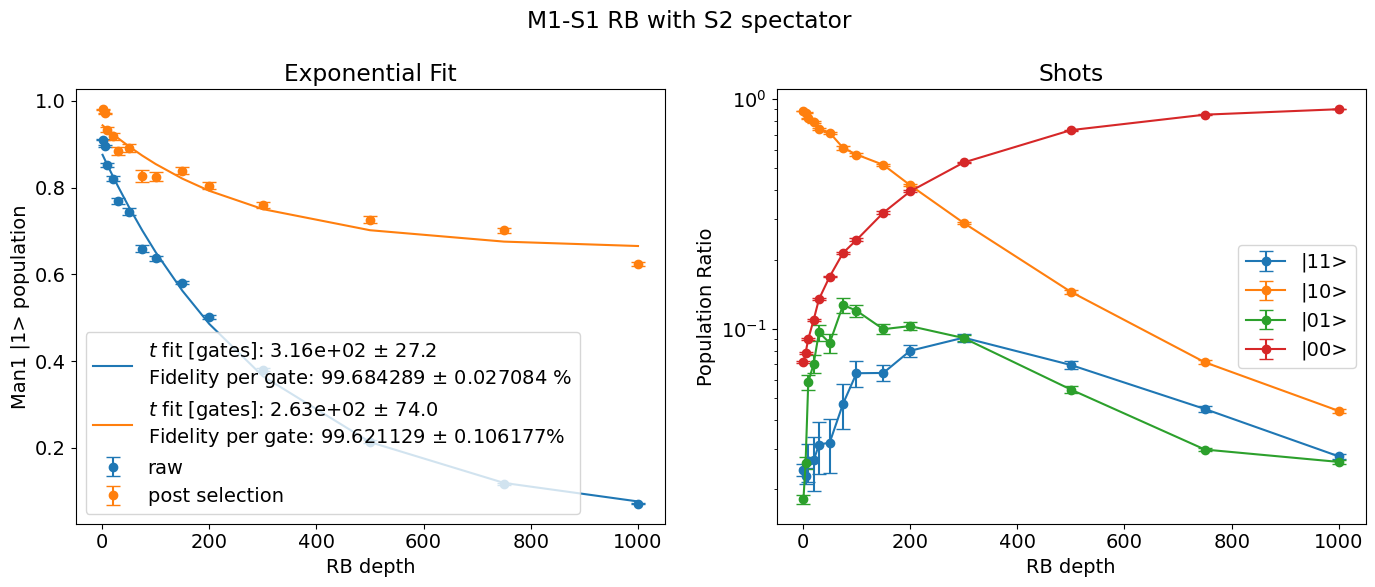

981.0269638266277
978.0280539976363
967.0274952676198
984.0300806897923
1953.0615067018107
1954.061894813829
1960.071292729899
2949.103131156764
2951.1174270481533
2946.118561417301
2960.150619277149
4917.2561854721425
4873.281811333923
9836.58391086878


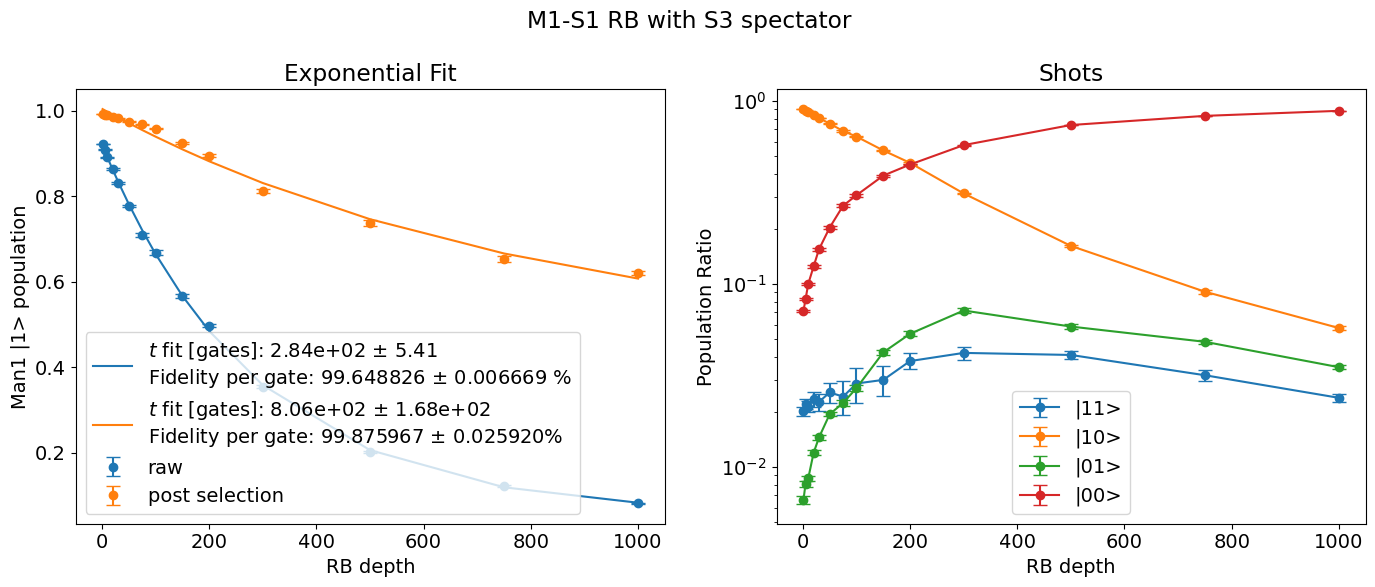

980.0268558124856
974.0272052389224
982.0286974549803
976.0288241327138
1966.0601942973149
1959.0641147844874
1969.066340971773
2956.105704272144
2946.112810418347
2941.12285050411
2952.143975047978
4919.271882645165
4876.282169668803
9841.588696710438


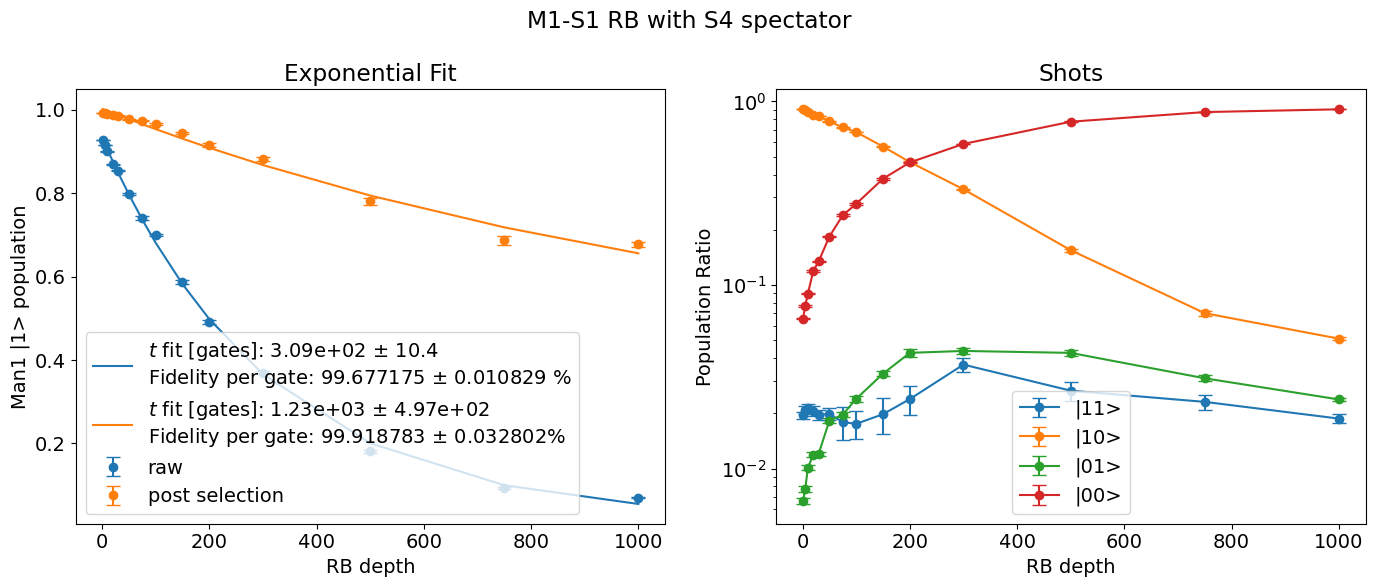

980.0274330516565
980.0268948243981
976.0277703568464
985.028429252918
1976.0595673479281
1960.0625575305596
1958.0663437075125
2951.106109205529
2953.1194946891965
2927.1253071518813
2950.1374105207788
4891.280117743767
4906.285862999619
9803.596354443991


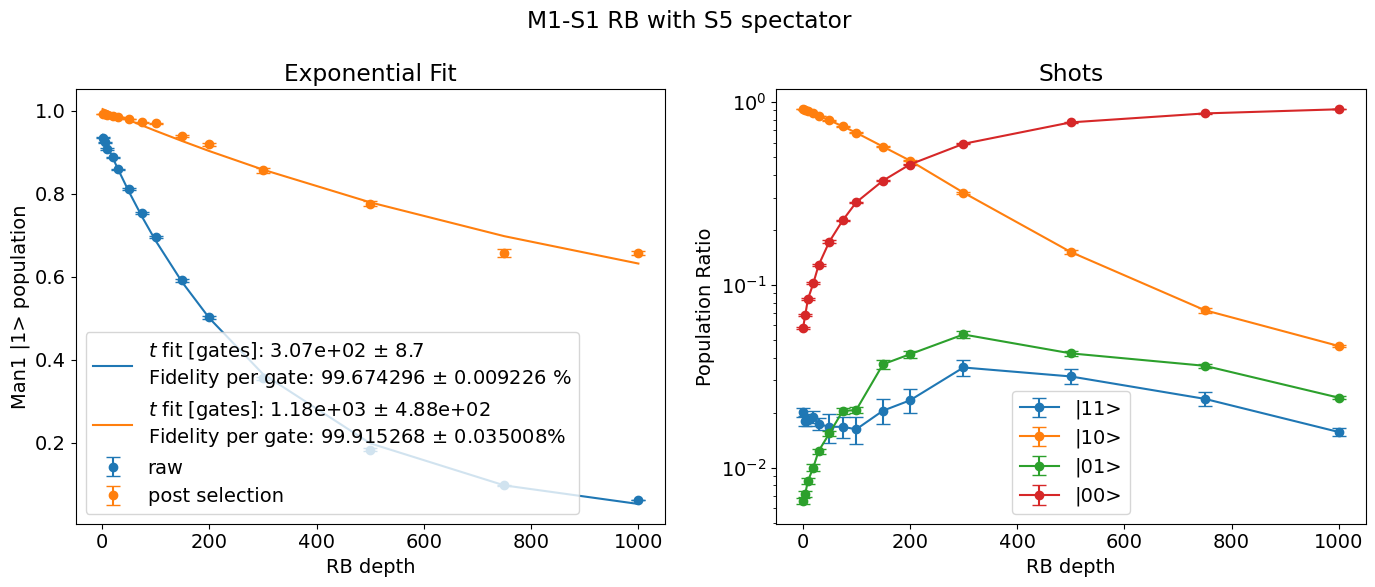

980.0274782063375
953.0270015594929
982.0271080157005
980.028181343796
1972.0584694349532
1949.062784321423
1964.0680730239712
2954.1069306675504
2952.113845563521
2938.1240269764876
2952.1391703658574
4915.265170030264
4905.291301376319
9806.585585333602


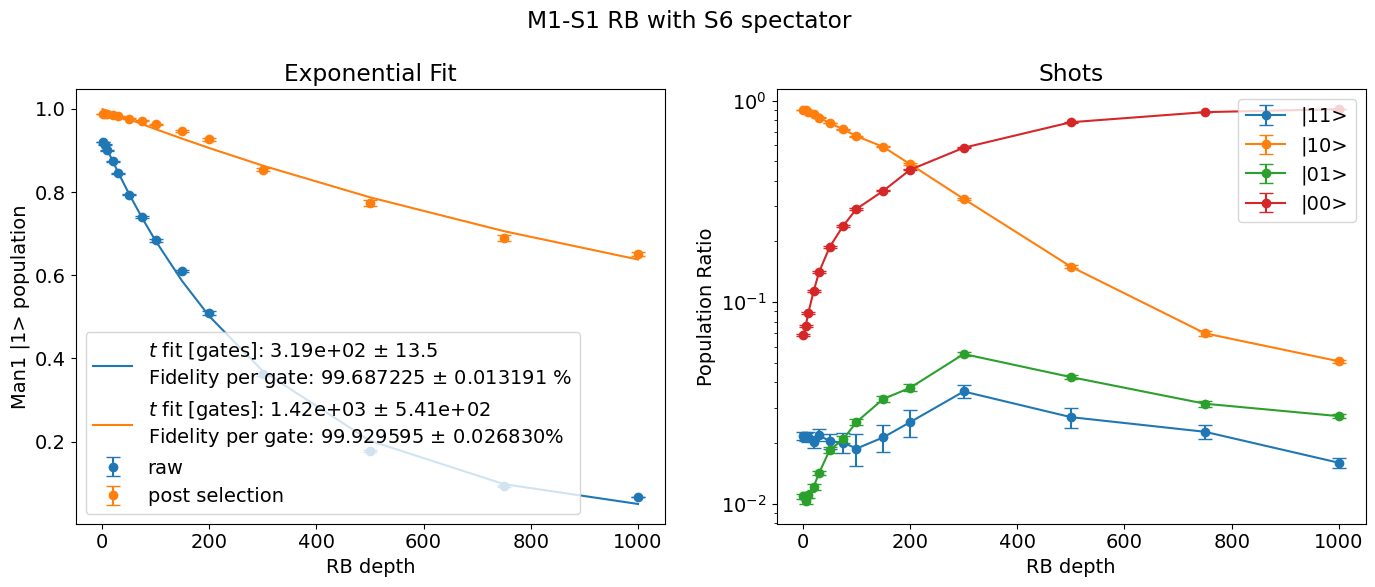

972.0270288211342
979.027413745795
970.0286993131647
987.0302719366447
1962.0602041638604
1967.0625723131698
1966.0678000479313
2910.1044977337374
2941.113745852348
2945.1220907778165
2939.136017383974
4848.279802482183
4898.286534630659
9814.583121653219


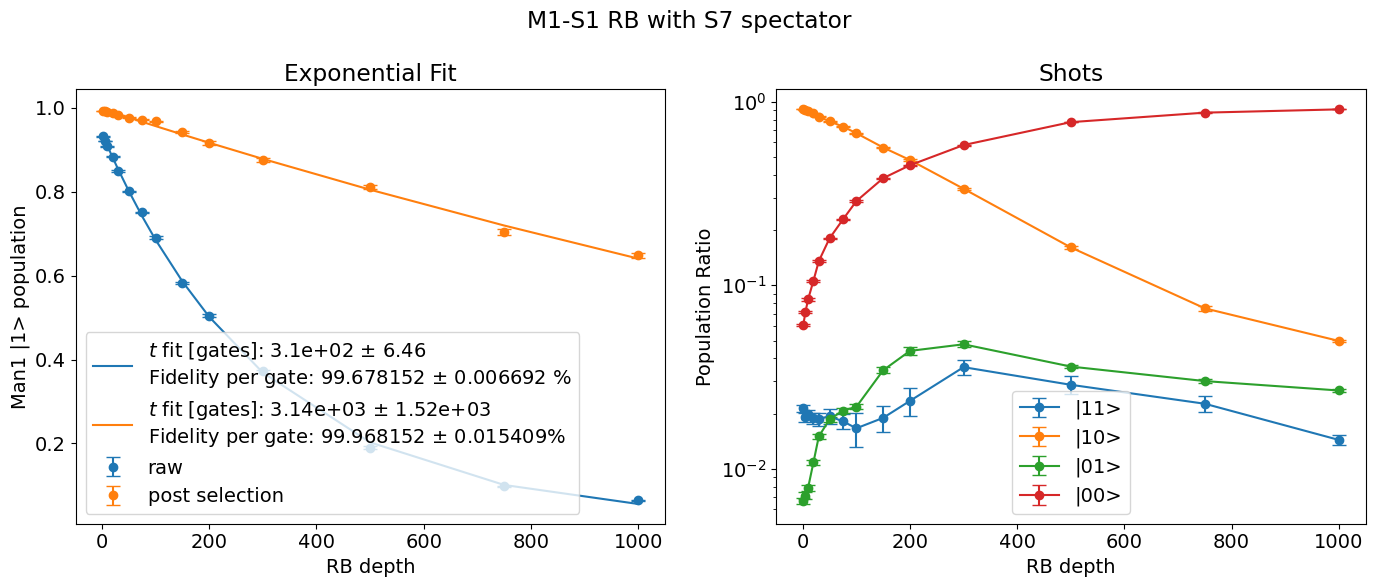

972.0264149256503
979.0257802453775
982.0266062365085
976.0279532480735
1952.057187645502
1963.0594554531165
1947.063562629421
2929.1017524599565
2934.107827642789
2941.115702155048
2946.132419046189
4905.249695955226
4887.273232661537
9778.575673116215


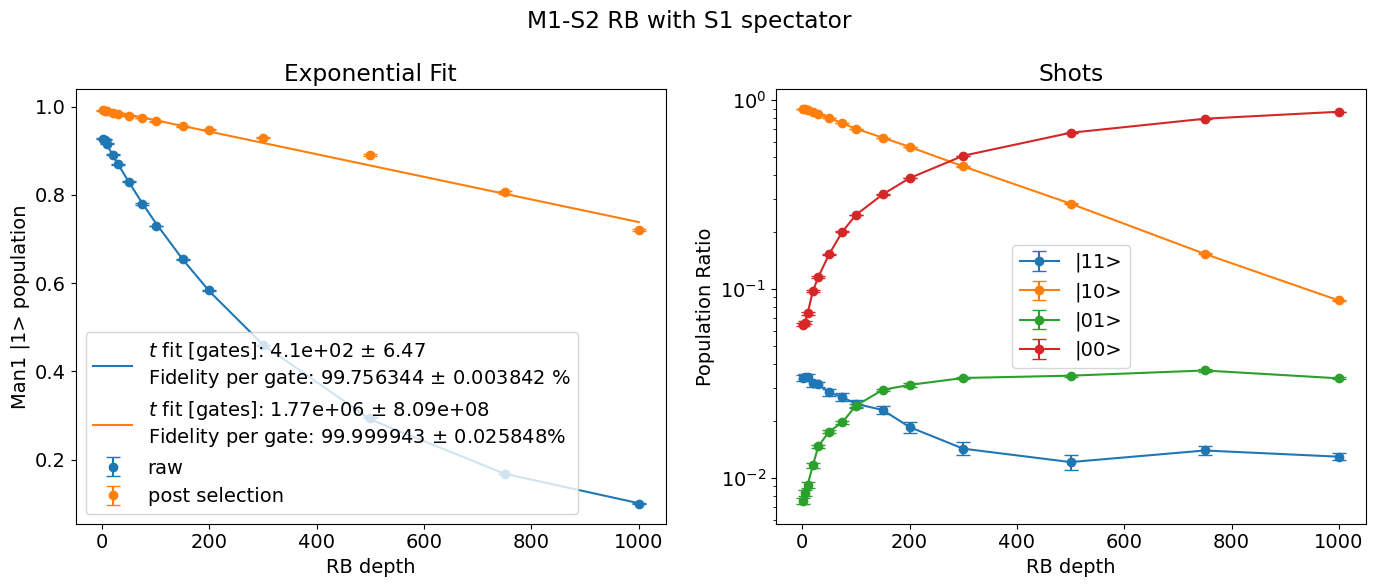

984.0268570992
984.0274963030683
963.0272640230456
986.0280981945059
1966.0556190764635
1963.0605683179656
1946.0640035730437
2936.0949588144113
2953.100960366257
2944.110590602607
2933.1284203430623
4868.239979590811
4898.2723104806955
9778.571794320254


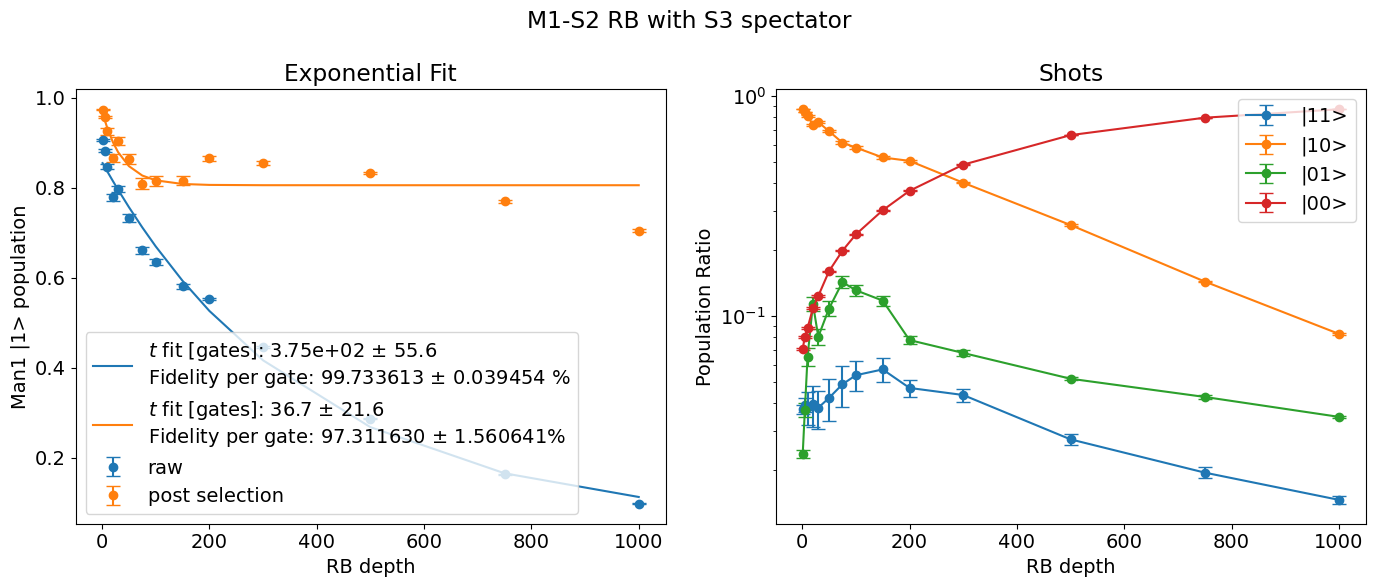

987.0260329835139
978.027036305654
974.02794914531
984.0281750300173
1955.0578455640036
1956.059425552617
1958.0640019555221
2938.1011744293746
2942.1098050408987
2943.1205433810055
2933.1294044140127
4902.249342414332
4876.272176221581
9777.573244259138


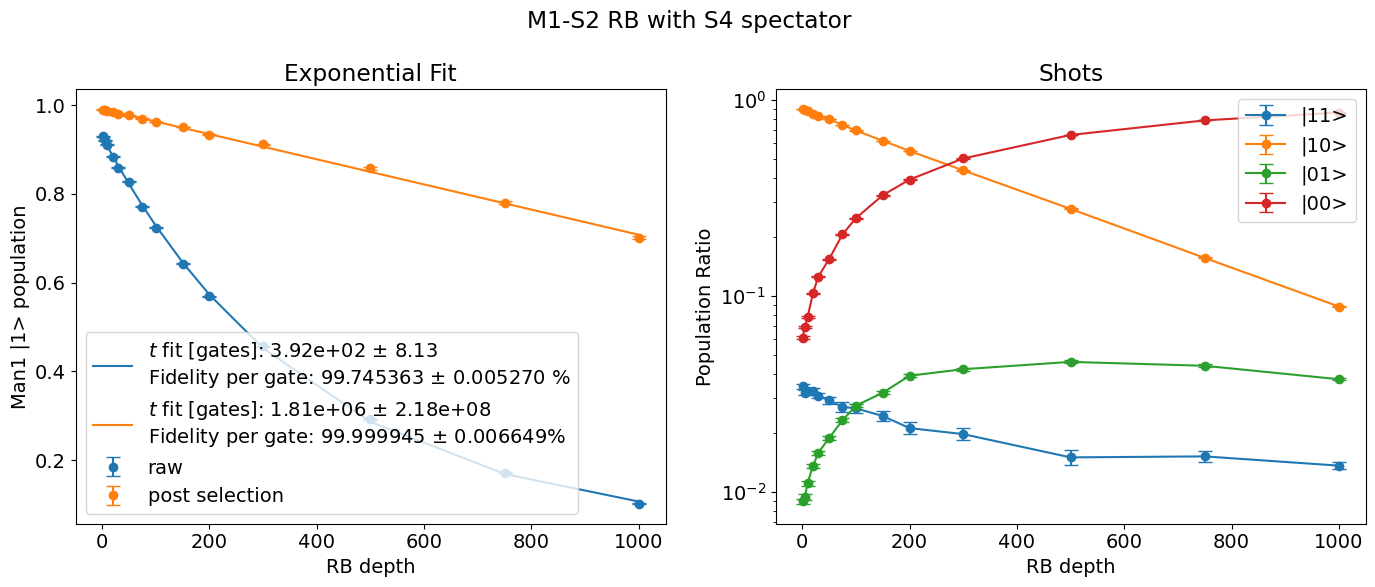

980.0256532252793
976.0270262034787
981.0272044312089
975.0273210618043
1948.055941974998
1957.061450392372
1960.064425822867
2933.0992474999734
2925.1131027567303
2947.11738443366
2929.1336167856216
4842.245898268371
4887.272536281638
9679.570538650696


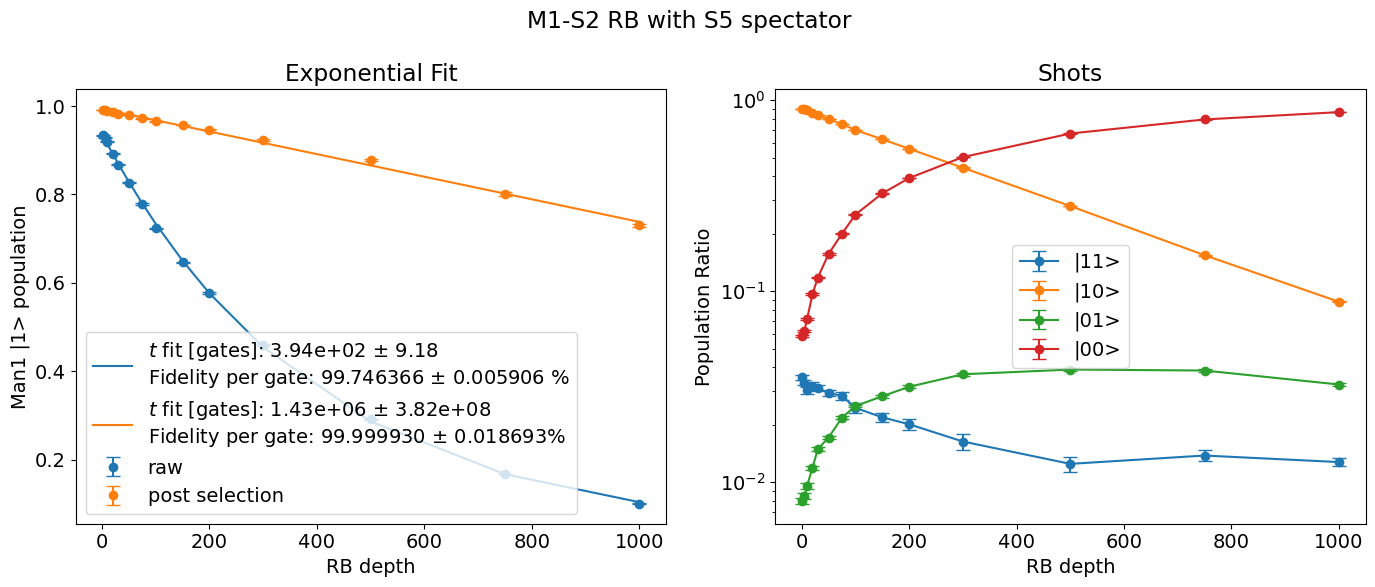

976.0264424312021
978.0268527509538
958.0268251795544
969.0282088850123
1930.056446990404
1939.0591700792804
1933.0644035495566
2917.1004271470147
2876.109174389102
2924.119736155247
2892.1298193941175
4867.253158745473
4855.271323320931
9621.566966196946


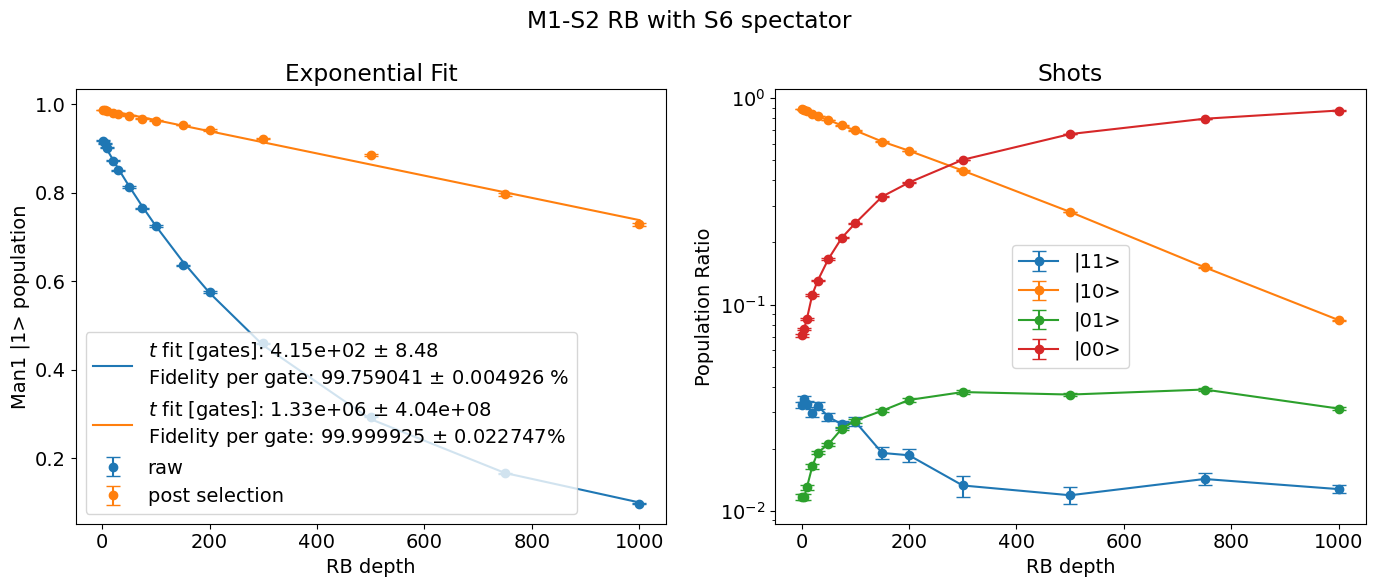

971.0265120046319
958.0262077051483
973.0277668945112
947.0277036806473
1923.0581585939976
1919.0608998502773
1938.06441436813
2907.1001209351944
2894.1081513135523
2883.116683283789
2897.129131669232
4781.242511626001
4818.27219199602
9674.572235819807


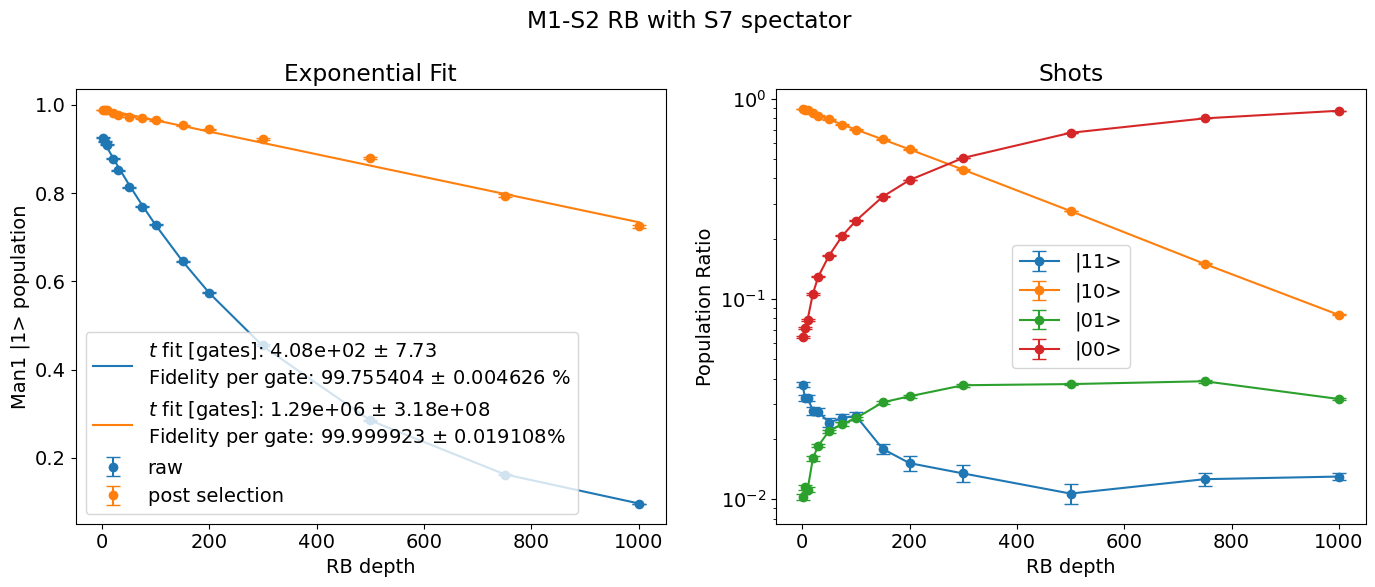

969.0262203342776
956.0268512910434
969.0268091170453
956.0270917522679
1929.0573586335065
1925.0607561291254
1951.0638229046588
2888.101401232784
2909.1148376241363
2888.1196989532436
2890.133203128674
4829.25916864771
4818.278557062602
9720.58699787868


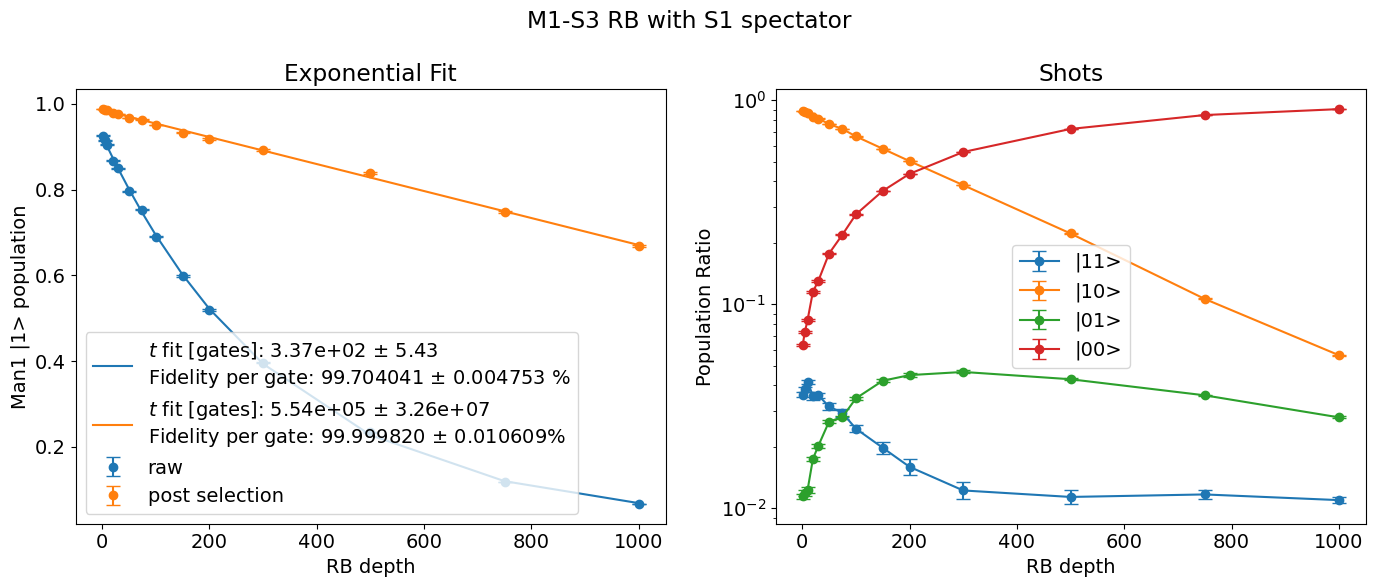

973.0265286011787
966.0272376091534
964.027335510654
967.0283856820574
1953.0574914088359
1932.0605186599341
1921.064866587516
2911.1055773098383
2884.113623841137
2907.1235048771678
2918.136053691335
4867.260118807797
4904.282157997841
9766.588823835229


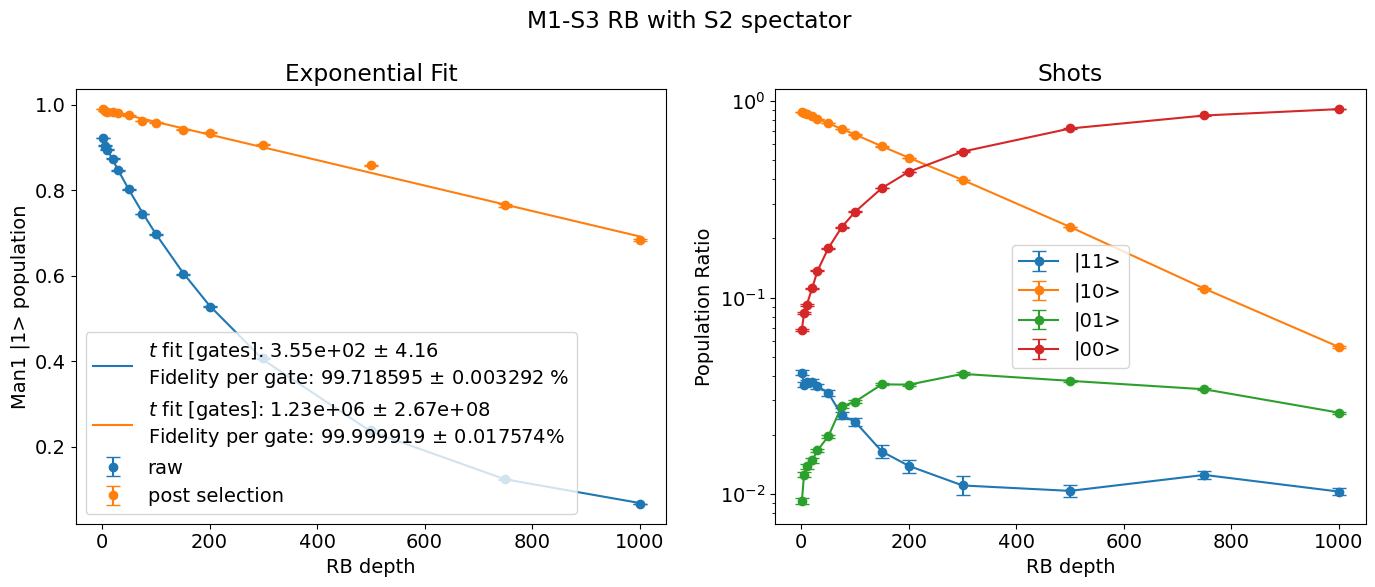

981.0263430077014
979.026836649981
967.0274963350074
966.0279392239976
1960.0586377521072
1961.0605076900667
1951.0635499520495
2952.1007449016015
2942.115368457952
2918.1218802538147
2927.1359394566866
4883.257304337022
4906.283999358252
9811.593438055732


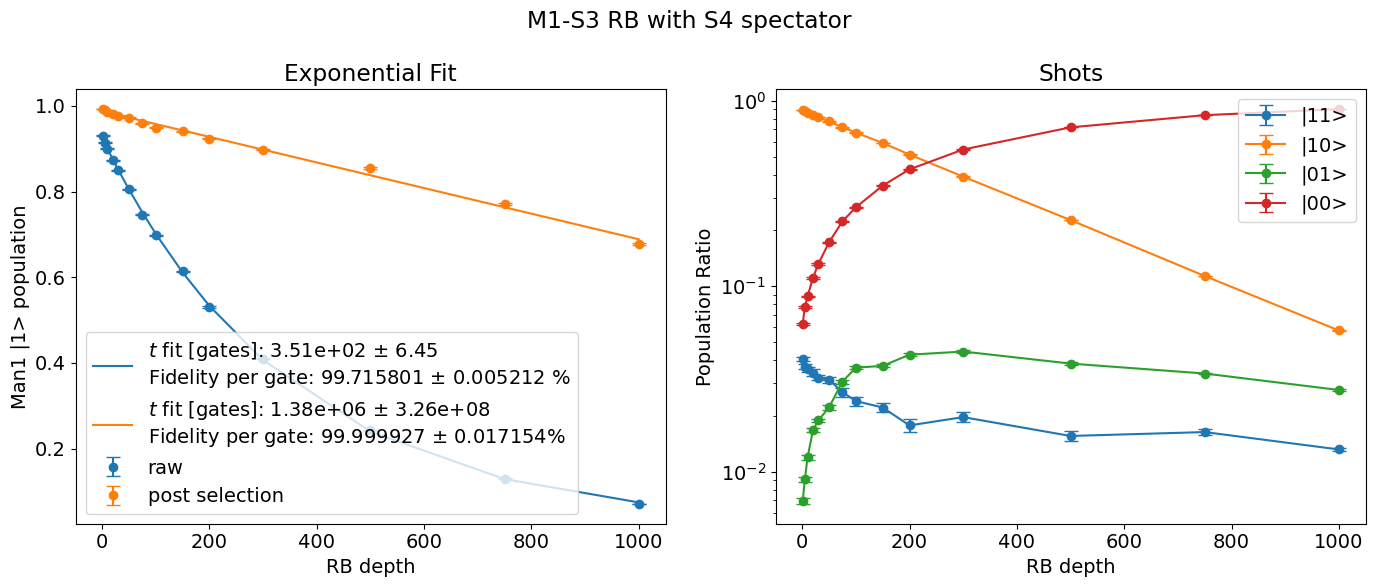

982.026139629749
981.0271987698228
980.0271453976503
983.0282277224134
1971.059019941912
1955.063304647349
1959.064471709022
2930.1052759356685
2924.115435194056
2938.1241421072227
2945.1368401950817
4884.260777673718
4881.285235058782
9774.588389608605


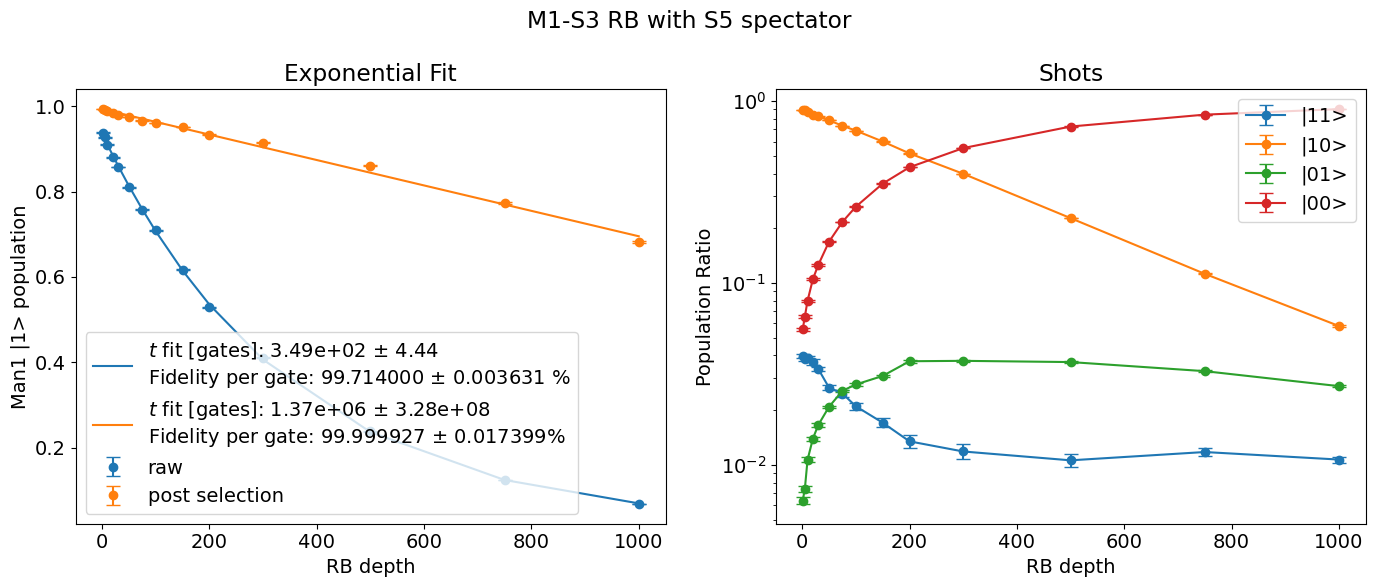

982.0262932956441
977.0265061759604
979.0278805869566
981.0284841830992
1962.057675551383
1962.0620418992596
1946.0634623068172
2914.10267040453
2937.1112158233777
2939.1214617125347
2934.1367831009
4876.259535623368
4929.28500383611
9804.588735916082


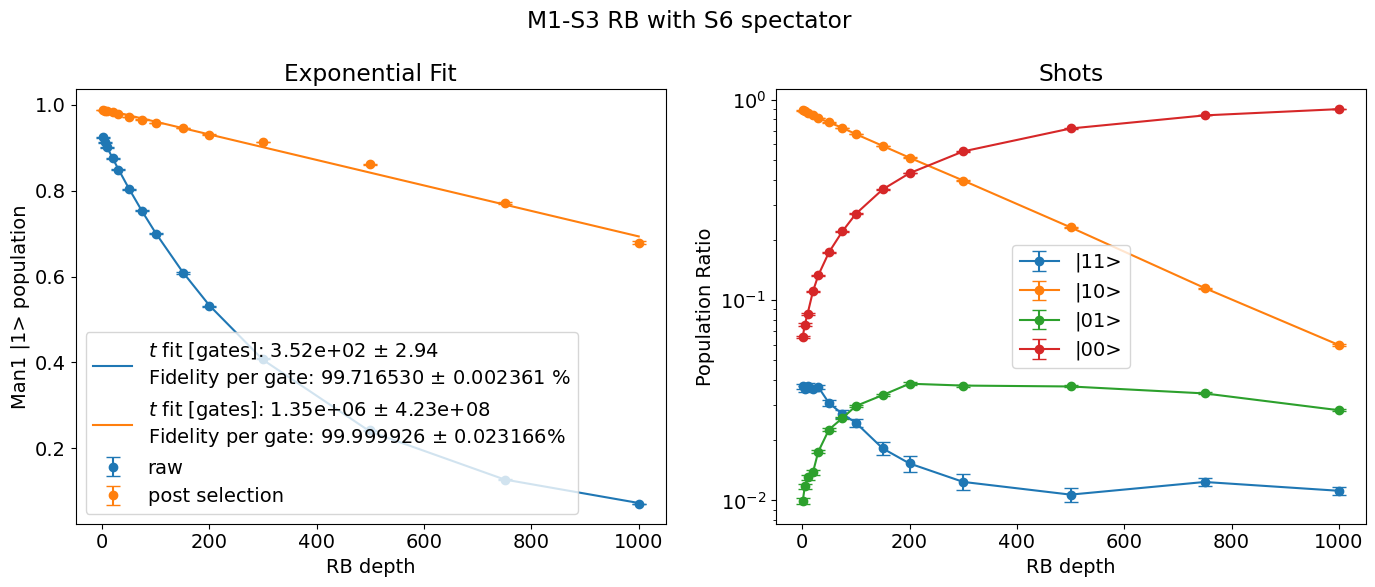

982.0269560806661
977.0261296180051
983.0287708691178
982.0284803802413
983.0260503982411
983.0265173042923
977.0265166521697
979.0280919138941
1951.0569631293156
1962.0611008644232
1959.0661437787035
2939.101395574885


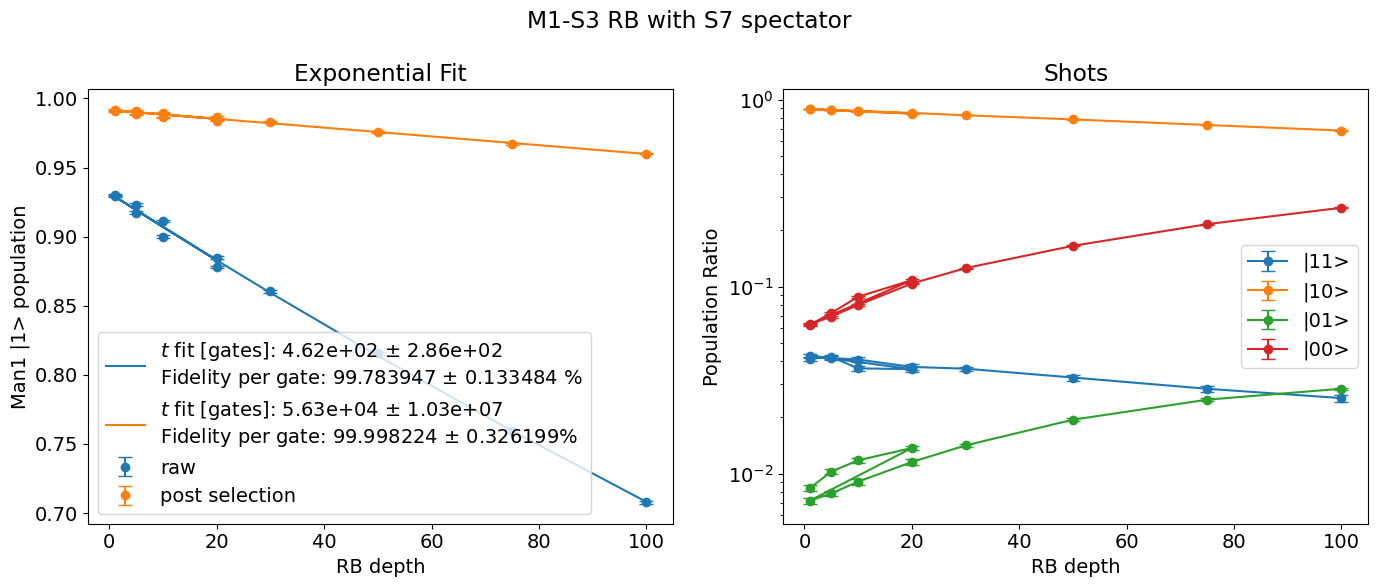

984.0260735823165
979.027146909798
975.0284380770037
975.0300867522516
1969.0630078502604
1947.0684556358035
1963.0768397116797
2940.120602156503
2951.1361145189294
2954.145389556171
2950.1595012361067
4919.292824072733


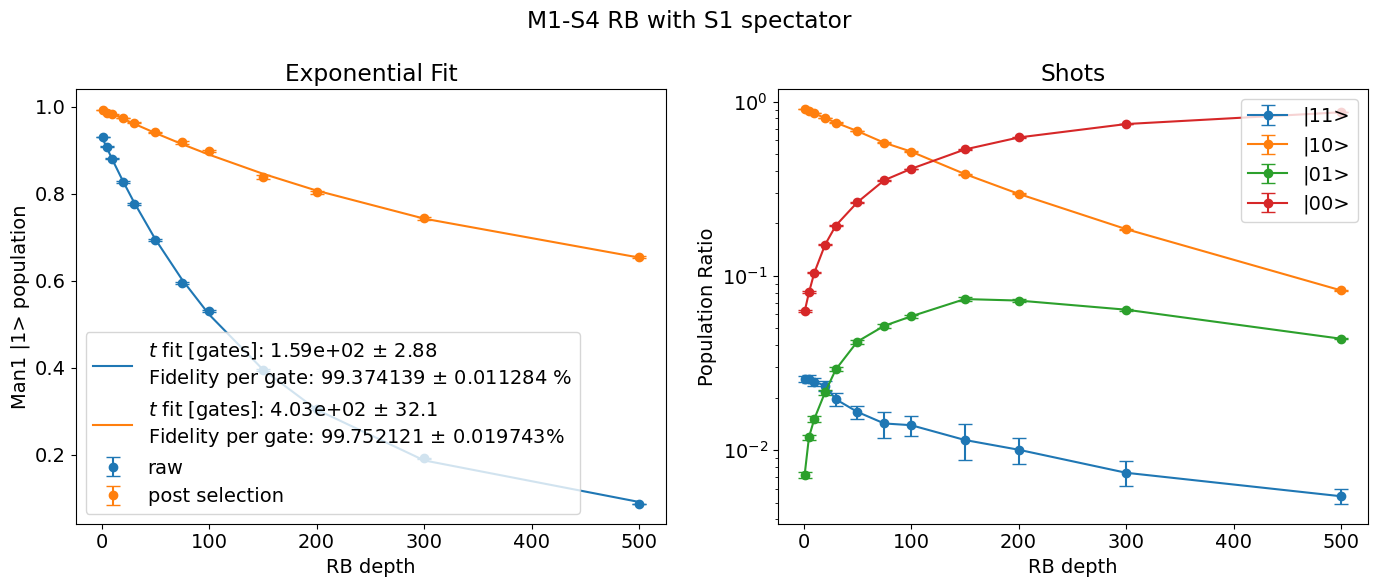

986.0269047555631
984.0274259572036
977.0282175830023
978.0295746533995
1966.0643499304151
1957.0681918437654
1962.07379434659
2956.12401229667
2973.1369597682933
2944.1449710323895
2963.160358524817
4940.290870843085


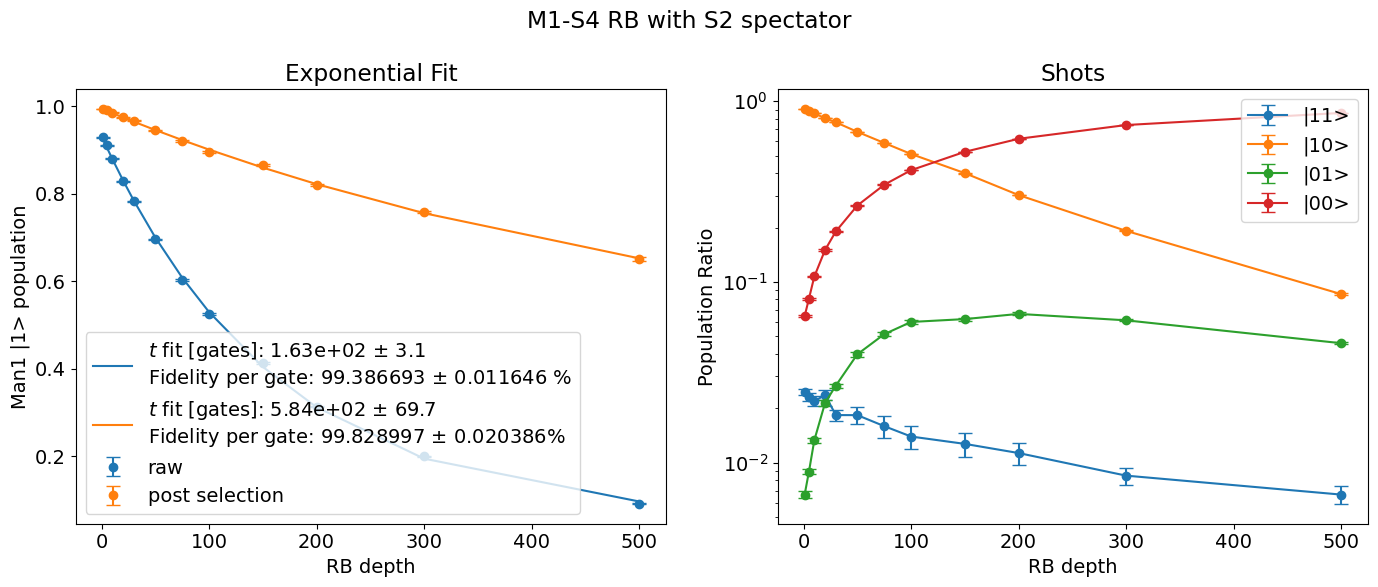

973.0272587381487
980.0285352095244
987.0285624163985
986.0313403819166
1961.0640614218769
1964.069714151038
1973.0761331734893
2942.1231401825266
2951.1335584894487
2949.1459514125554
2939.1579801582843
4911.287964630119


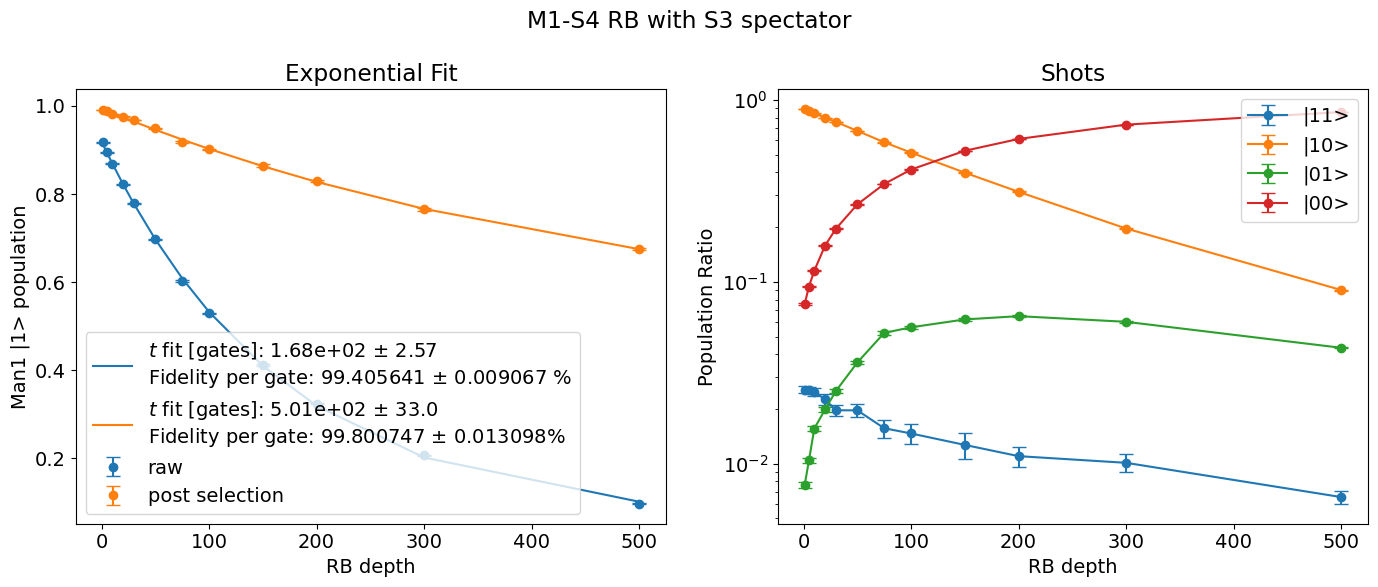

983.0269430510774
983.0280359037473
986.0290842532446
985.0296312676966
1949.0636665639395
1968.0699470841096
1966.0747219972181
2949.123572799559
2954.131341421985
2960.1435147935563
2936.1536753626283
4907.286864340018


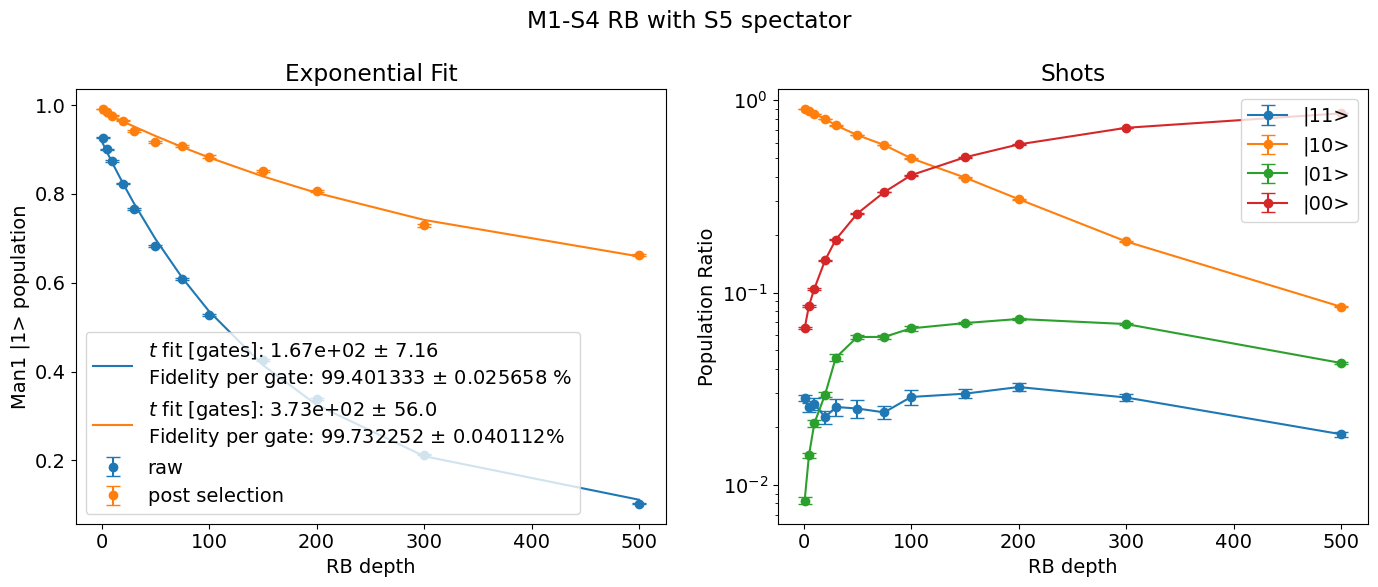

974.026517393496
989.0280179762593
983.0283186565148
985.0313732588018
1969.0647448841855
1963.0688783836808
1953.076157099838
2940.1230112859666
2961.134844468622
2947.145425746562
2935.155693774494
4912.28756385953


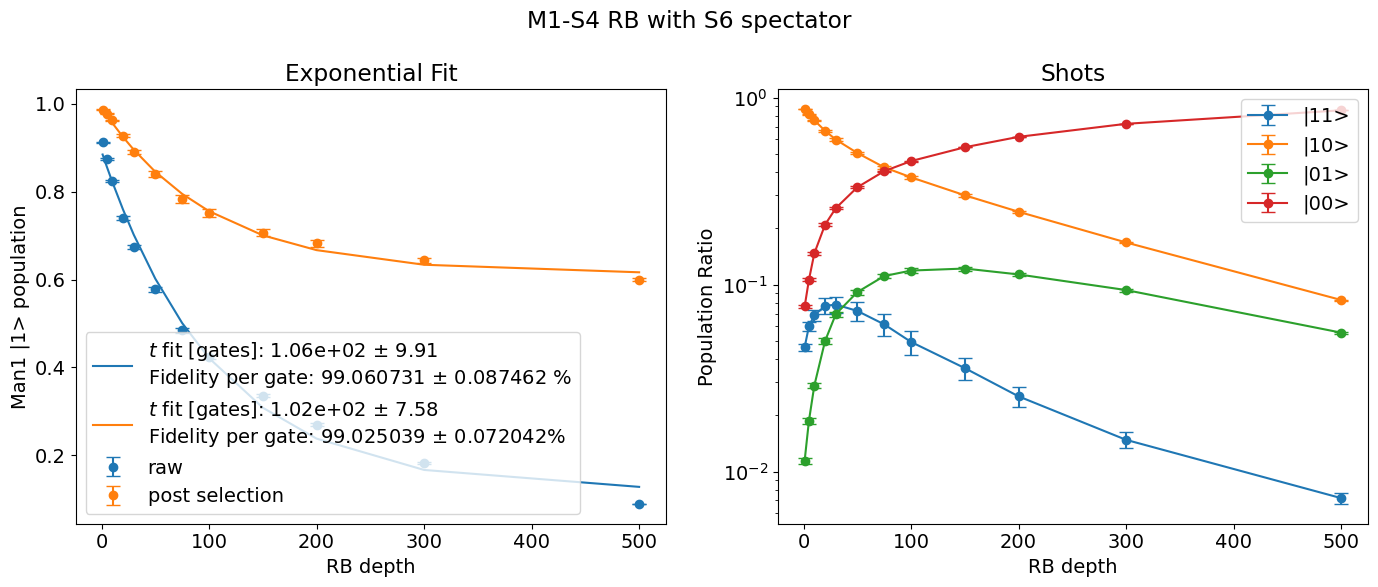

985.0266815537449
981.0289864698291
983.027757888335
967.0292451403022
1970.0617005448457
1966.0691364206323
1973.0764111140643
2956.12160066662
2949.136520871919
2955.1432701071235
2925.1569618615385
4891.290311606017


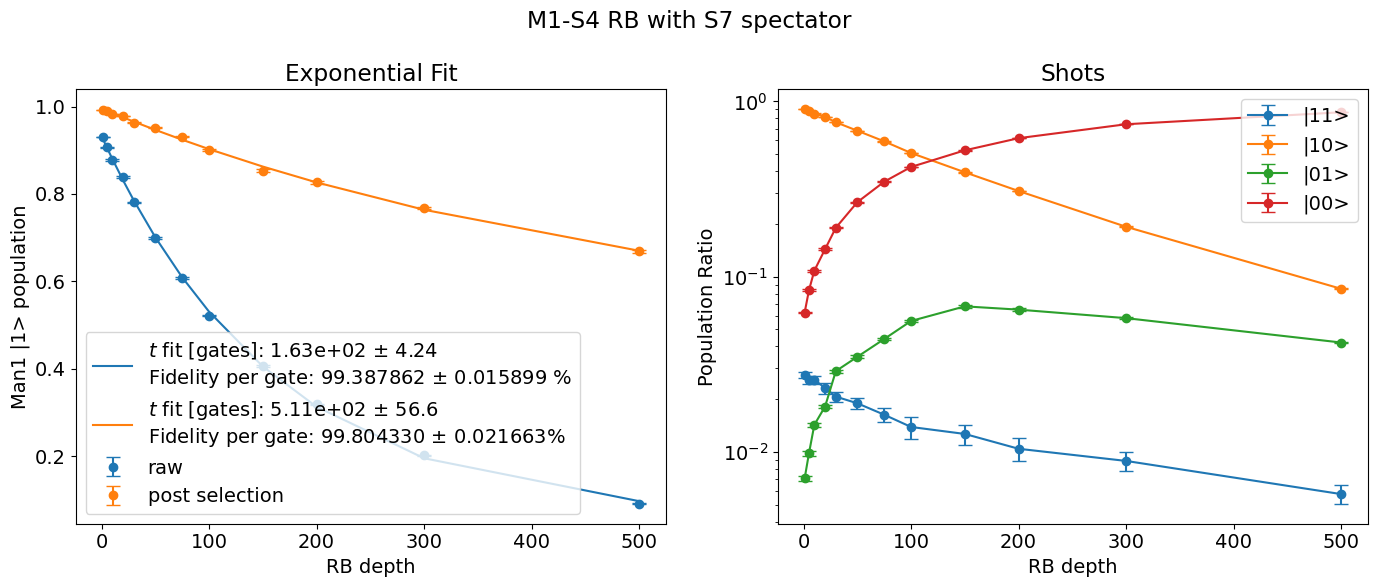

978.027263882758
982.0279253906485
967.0287433998438
975.0310590164172
1974.0631238878393
1964.0721423431246
1970.0806717609394
2934.12702474849
2944.1412684756633
2941.1542020794154
2938.1668317743643
4903.296427052987


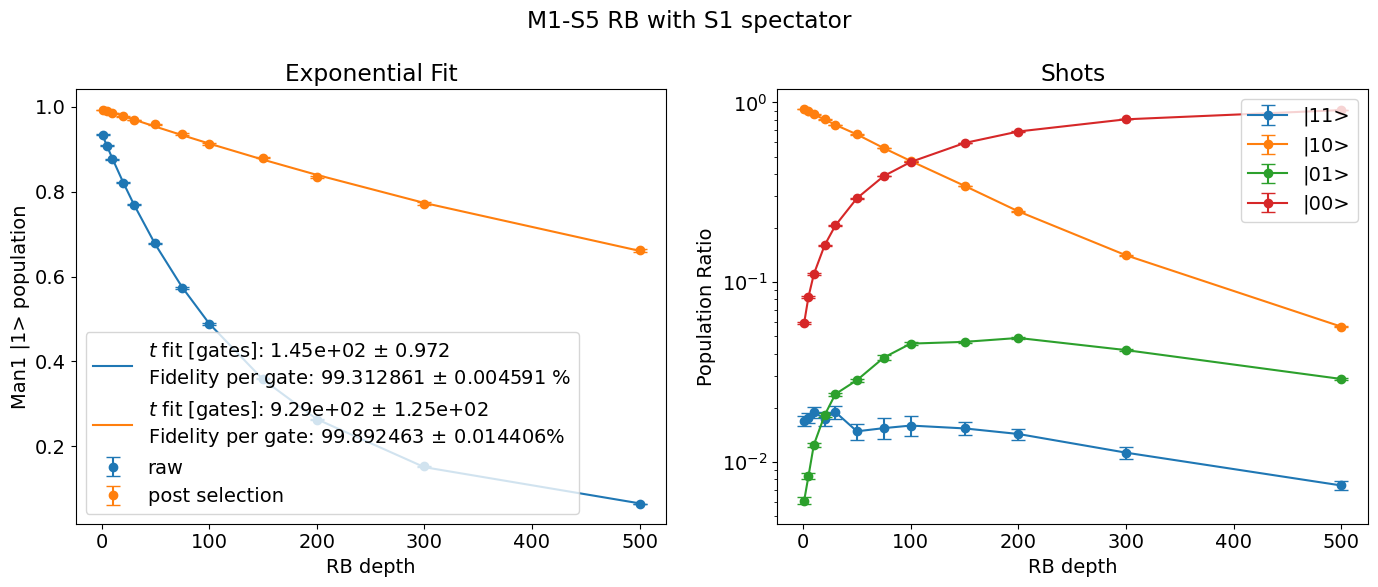

983.0274724806758
984.028557079846
984.0291467866446
982.0313207499936
1958.0656834214471
1963.07357924295
1976.0791677128038
2956.1285494405874
2964.1415047929463
2919.1485439524836
2888.161734537349
4873.293051711261


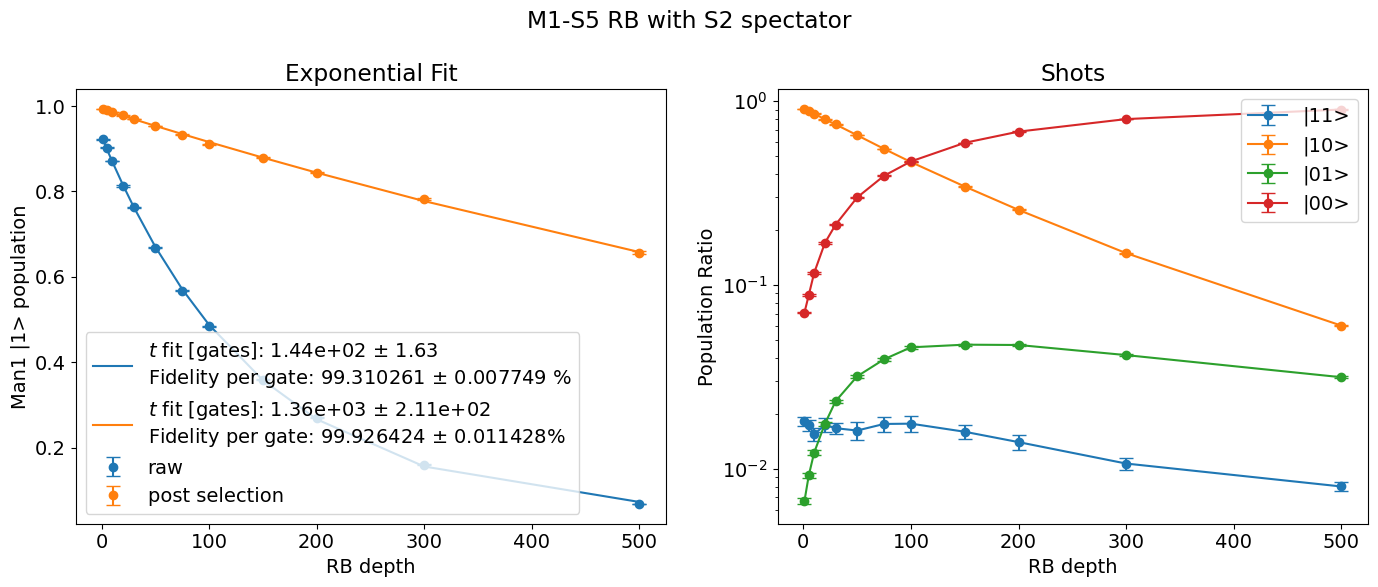

986.027595932932
981.02828730163
965.0286806209618
981.0312133344349
1956.0653496677962
1952.0729374137272
1958.0791066638242
2935.1269598490244
2947.1437171006655
2927.1512605149956
2950.166916802555
4915.297222597304


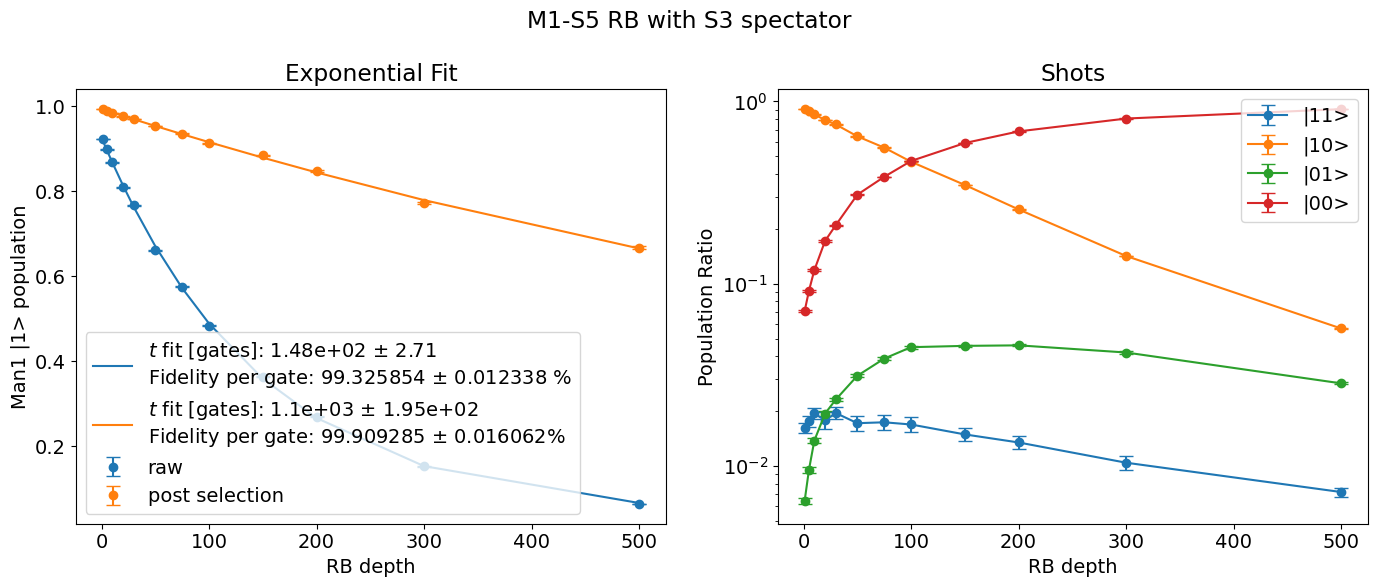

984.0272351274577
980.0277117828532
975.028636754223
978.0313366159506
1965.0677344686894
1980.0721561648118
1959.0771069666662
2955.127629747987
2936.1426854002966
2942.1512258793264
2957.1675644641746
4905.297658391499


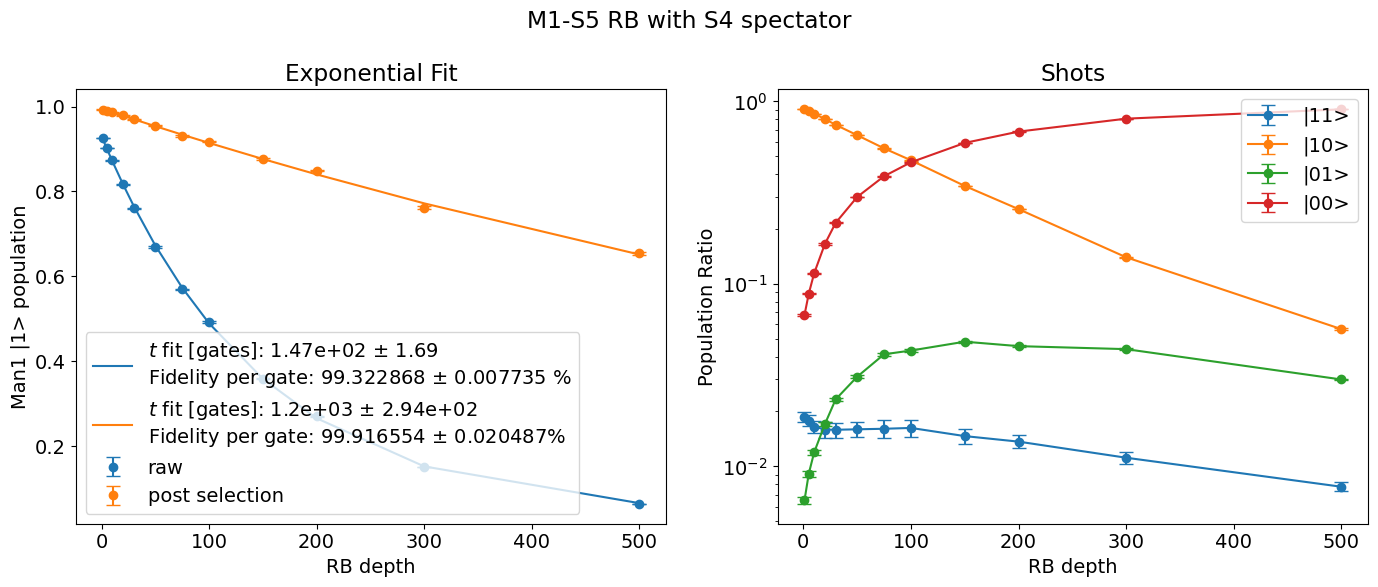

975.0264123885737
978.0280037675745
981.0299951820608
977.0308341105078
1958.0646165406347
1951.071307221208
1965.0798830084013
2945.12904478573
2951.139591654165
2947.1522388644485
2951.1664083275814
4907.296138038752


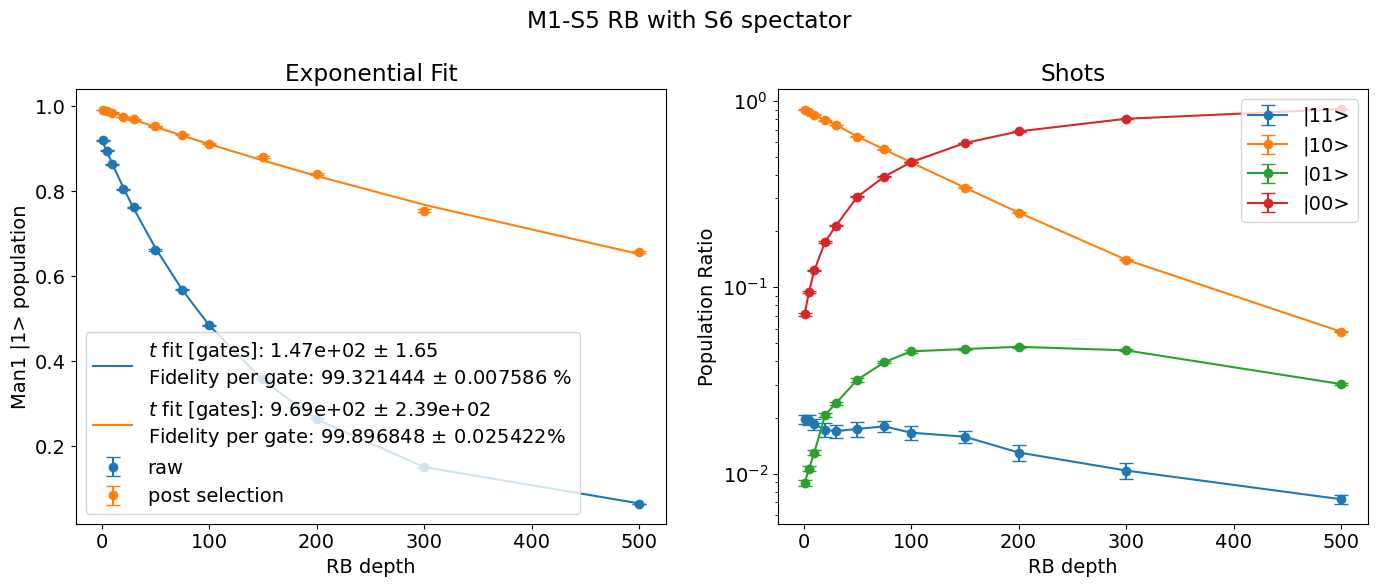

976.0275275923336
977.0284494286572
978.028635167333
983.0312679403962
1970.0679080239543
1958.0729593526632
1960.0783526229786
2937.1265784276598
2952.1431514084306
2938.151840883429
2935.1669825765075
4882.29469964641


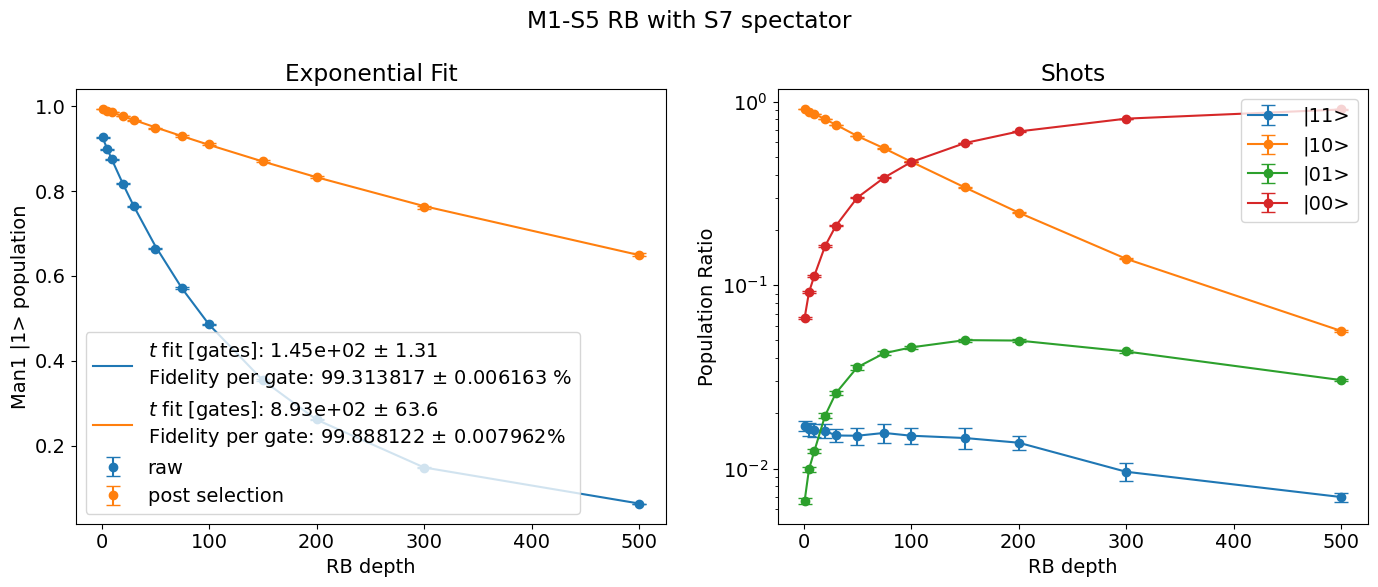

979.0272335879265
978.0269743545346
972.0265772720043
971.029697911257
1952.0595185706798
1965.0644978651976
1964.0718729704374
2913.1087710037723
2908.1202670833454
2938.1301347222043
2923.1416998759073
4906.264036441928


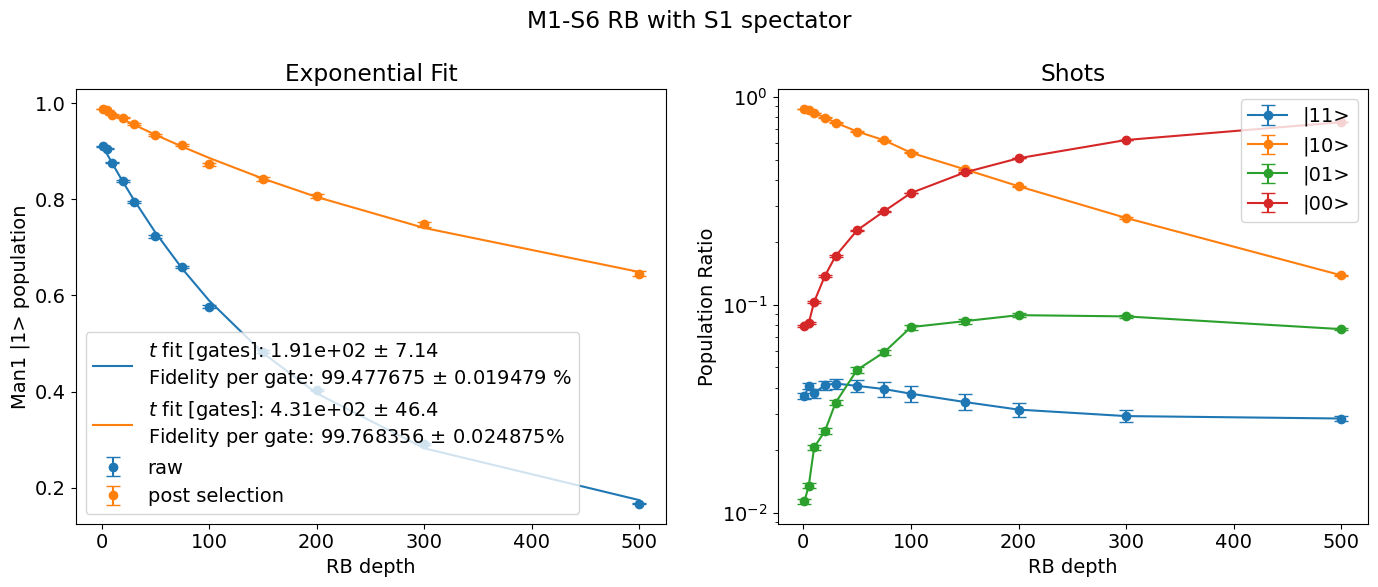

975.028176524634
981.0264586118705
970.0281917166517
975.0286870365962
1952.0607820462478
1965.0663964879589
1957.069573800218
2930.1080689305486
2944.1198345287376
2912.1288951561796
2918.140183536668
4847.257051285603


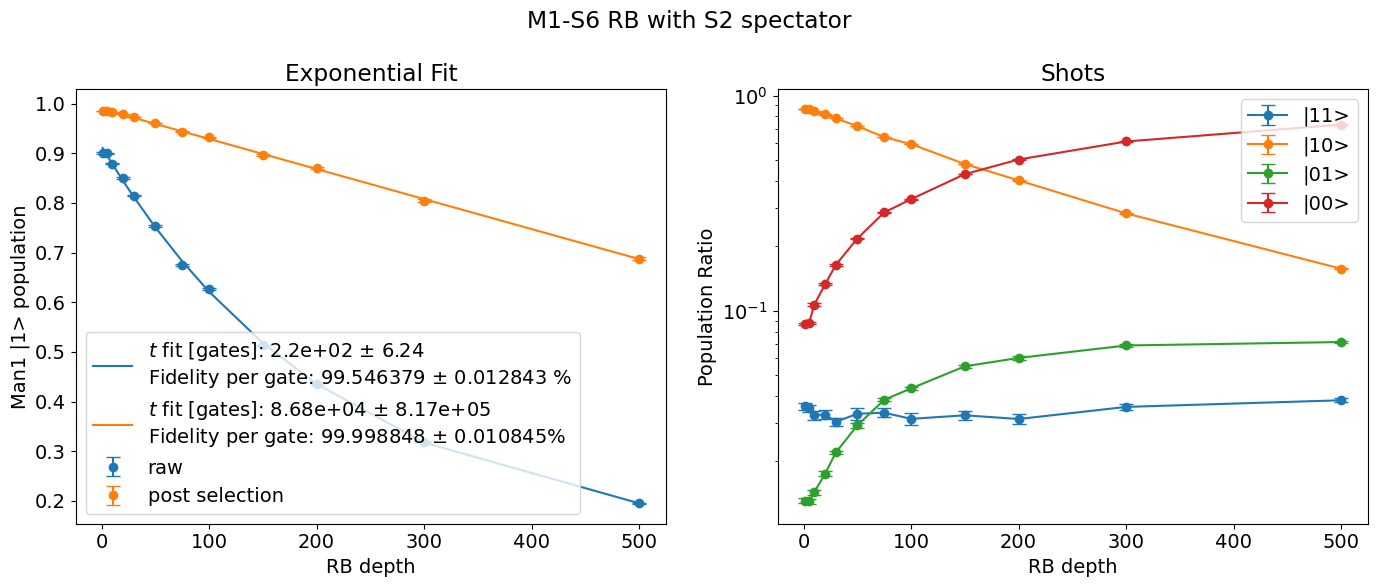

984.0276256756549
980.0281066257572
966.0282929725248
981.0299290795914
1948.0609477260411
1950.0661366713289
1951.0716084797484
2925.112408873158
2925.1213761091913
2903.1299940838867
2899.142506446918
4867.263578622848


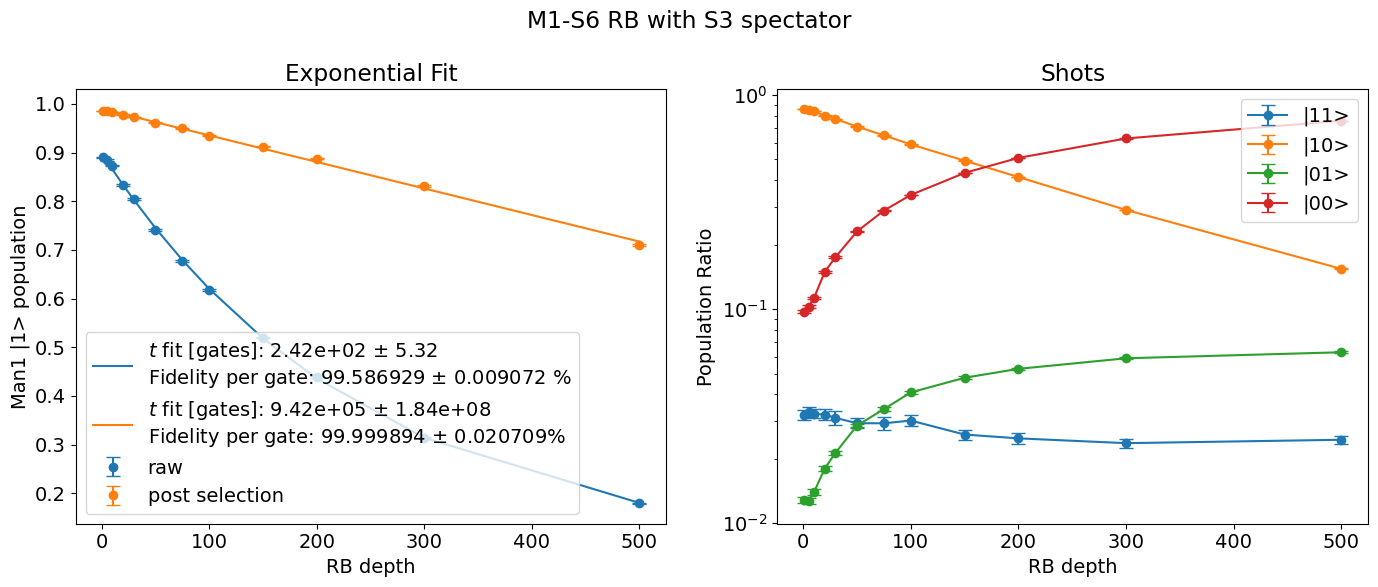

976.0274951396823
964.0273385558824
965.0276403801095
970.0297199854859
1943.0604929406236
1946.0649352178975
1936.0684013183436
2928.1081644502933
2927.122471333764
2912.1292897511034
2926.138459462335
4871.263924496248


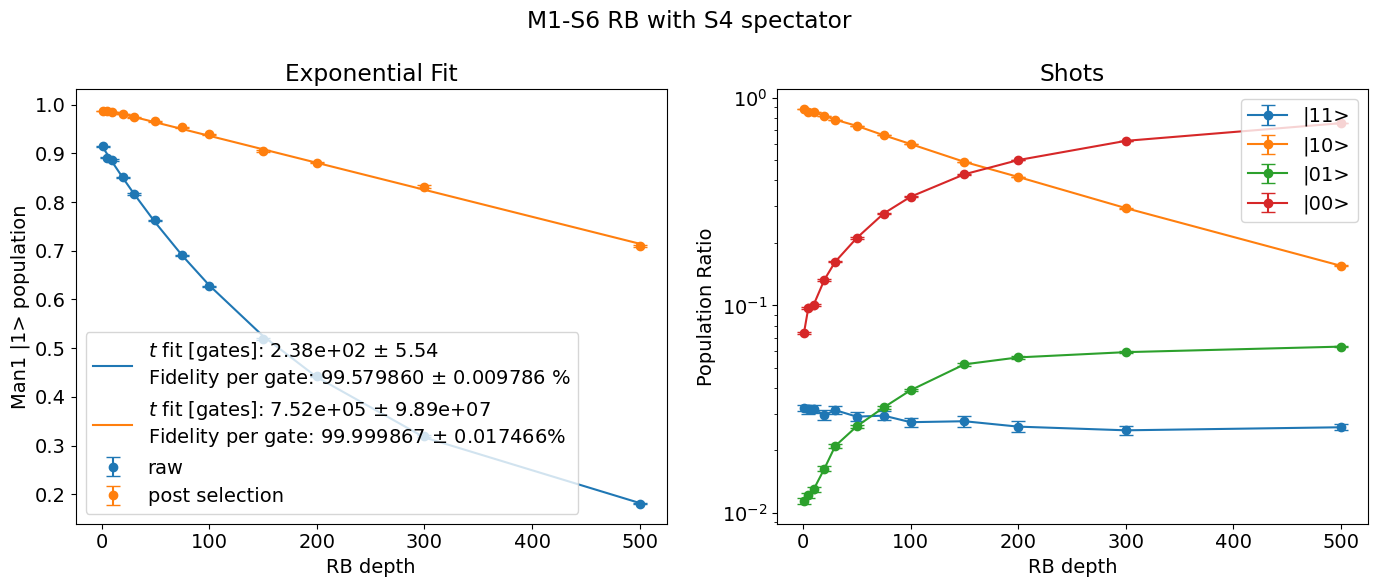

974.0272518251727
971.0266681433275
979.0283539999576
964.0281605509847
1947.0596280277416
1938.0643372944912
1953.0678016884028
2925.1105330200908
2890.122913416506
2896.131613352596
2896.1437889441313
4866.2621708933175


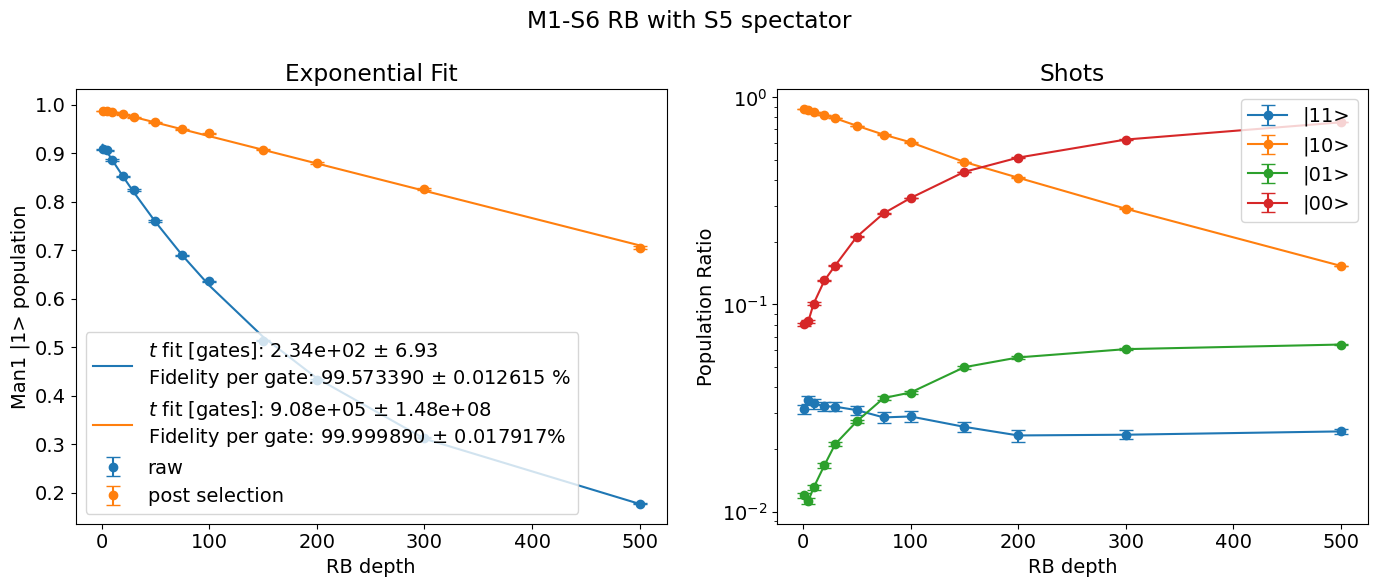

966.0274616334908
980.0289199404003
971.0298687947129
968.028720961434
1944.0593452879375
1957.0635845930153
1963.069018382782
2918.112064244992
2915.120137504259
2930.131060216706
2927.1429272002033
4874.26487388671


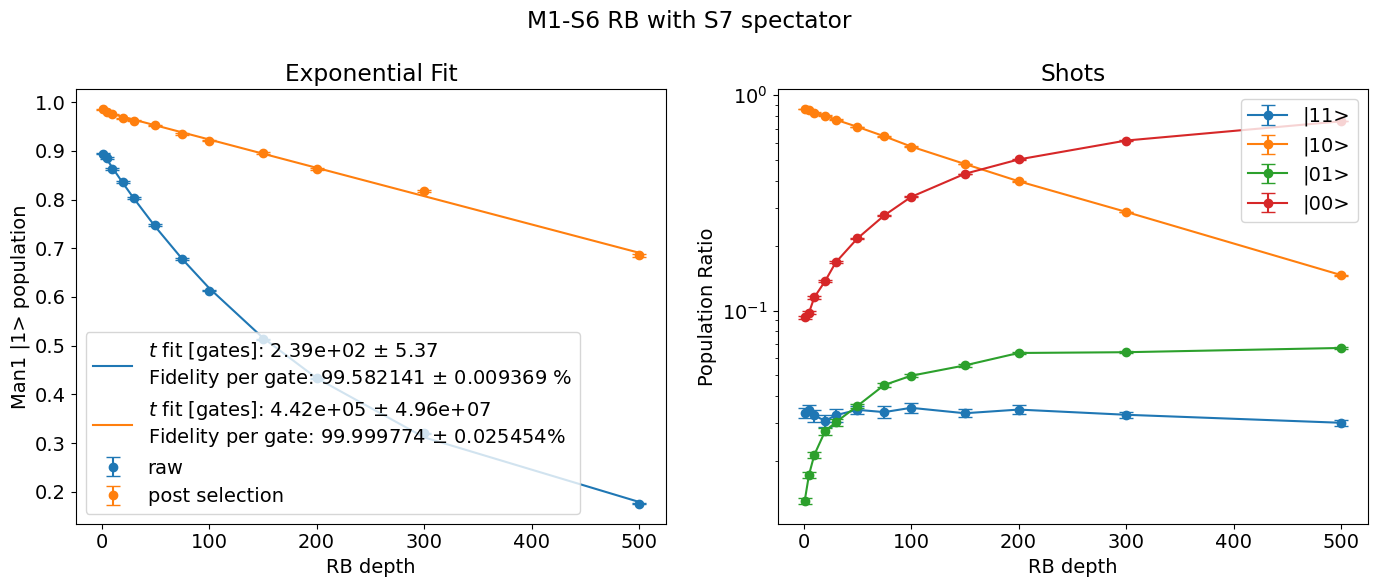

966.0258619126706
973.027373509332
963.0275818697781
974.0303243921834
1953.0646142465853
1950.0656070685877
1947.0723289895702
2939.1170567666077
2932.128472307096
2915.1381649233717
2924.1507862793424
4842.283148274712


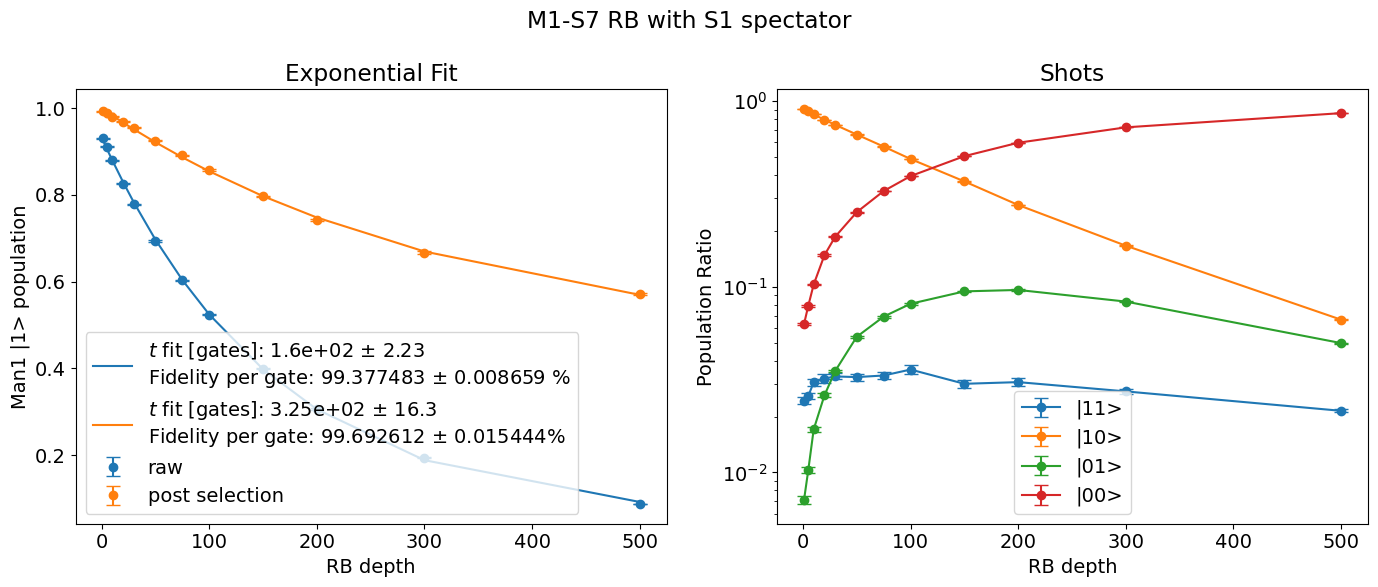

978.0267678947314
980.0272178772906
965.0284219578857
978.0290737856606
1943.0633375150371
1935.0661814812847
1945.075110876147
2909.1191433551567
2903.1296305163632
2918.1403043784703
2930.1566579706523
4896.2864078532975


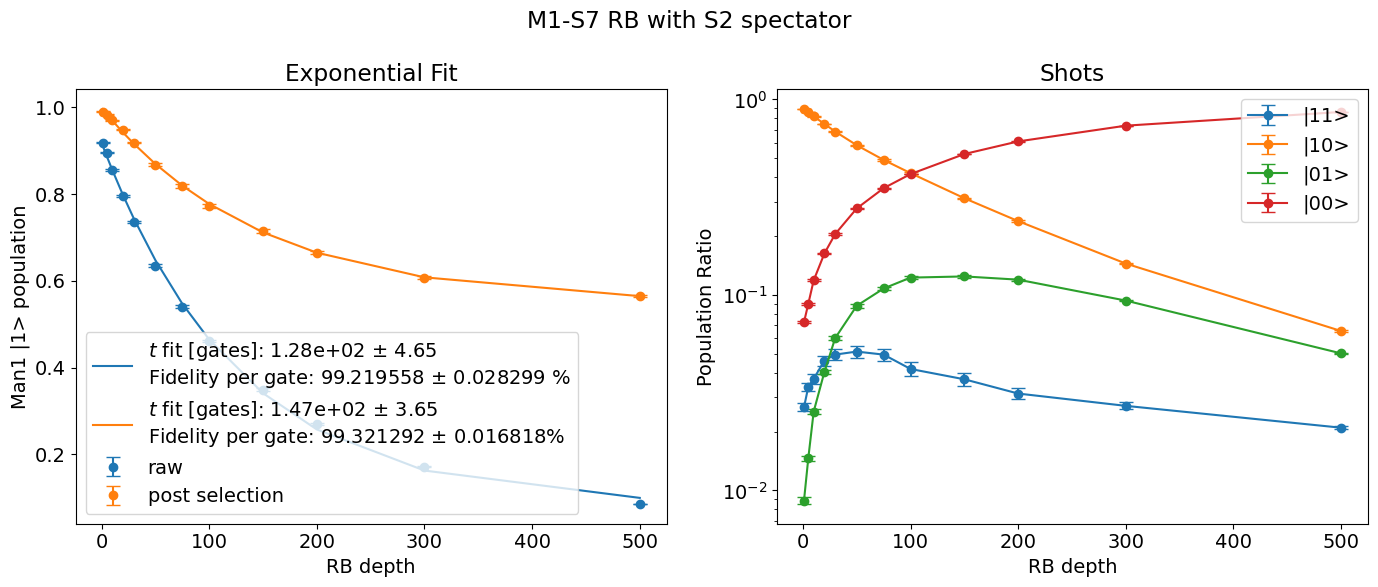

970.0267104892938
970.0276421278871
970.0279548605054
971.029739851197
1950.061094862556
1938.0667152359897
1946.0708039773217
2925.119082952765
2926.130685206388
2914.14046822641
2926.155023456656
4871.283239560718


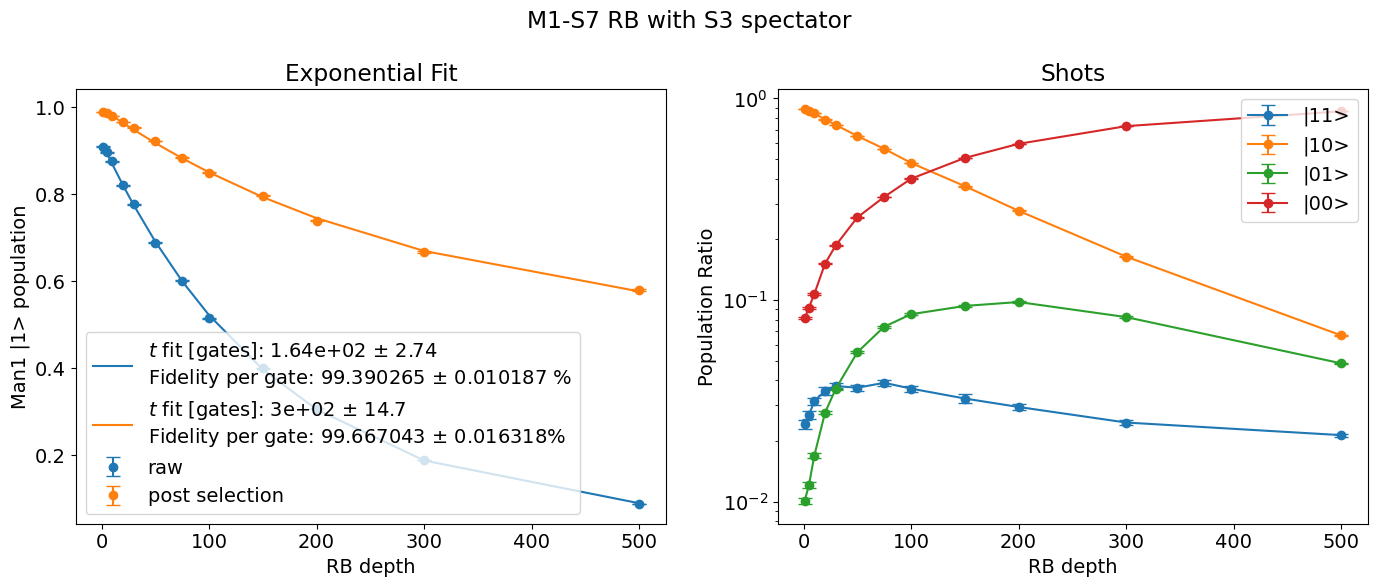

978.0276984920928
972.0273891289227
967.0278797902492
973.0300350094282
1952.063165240588
1956.0659735591064
1959.07251196172
2930.118201964066
2917.127808959155
2942.1405583696733
2927.152428942215
4843.279297290242


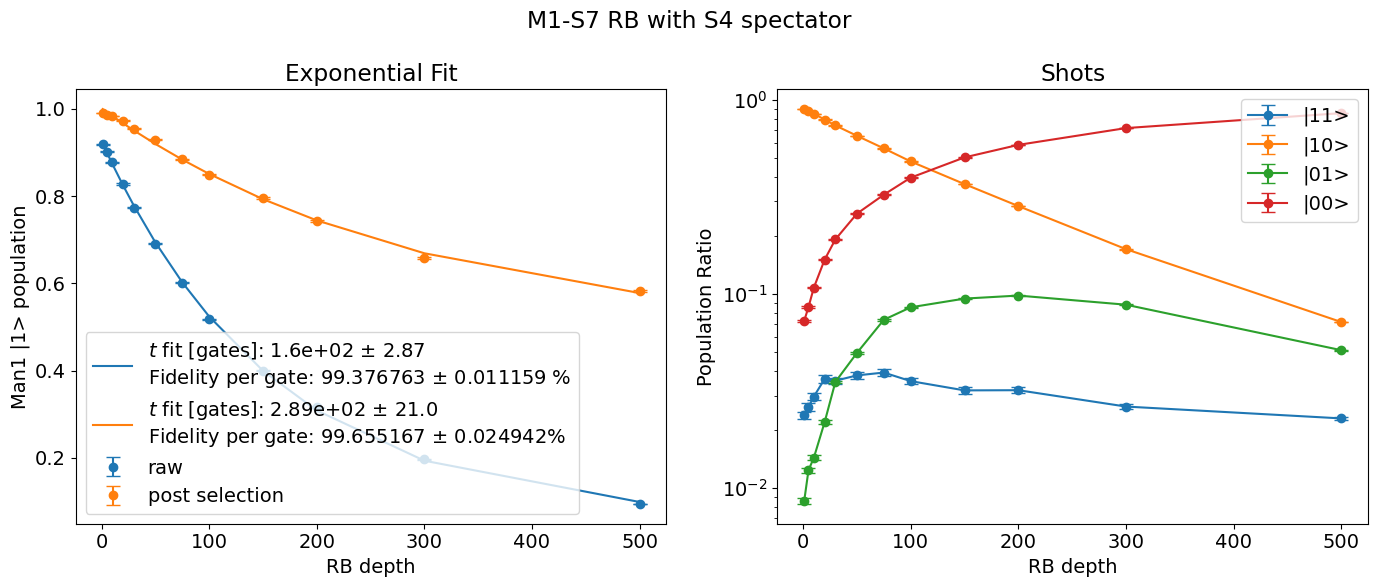

969.0266475775213
978.0273856945848
971.0282240887242
979.0287008511982
1934.0622529234922
1958.0663355879033
1966.072808048321
2931.1167777834785
2920.1303945913414
2930.1402825468404
2929.155110942228
4904.283772018142


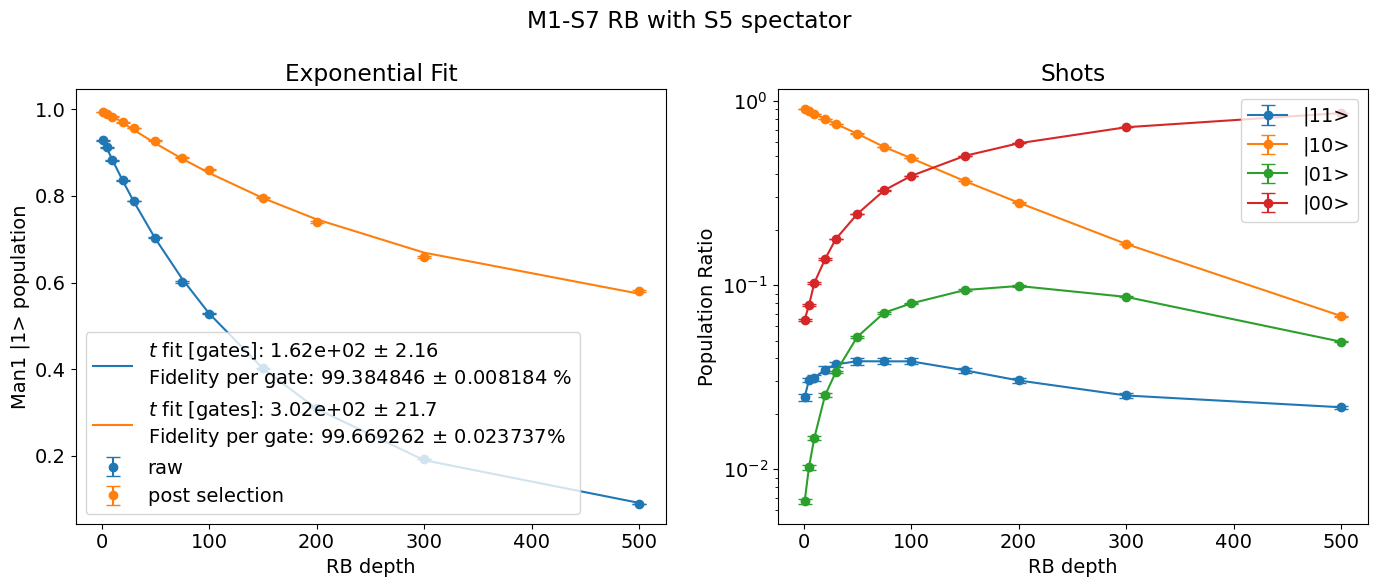

985.0272658597148
982.0279219289272
984.0286453329
984.030089396407
1958.0614004856461
1953.0672279506862
1963.069619004808
2920.1158341232867
2942.1274021165973
2944.1398664540893
2926.153731770832
4916.289504334318


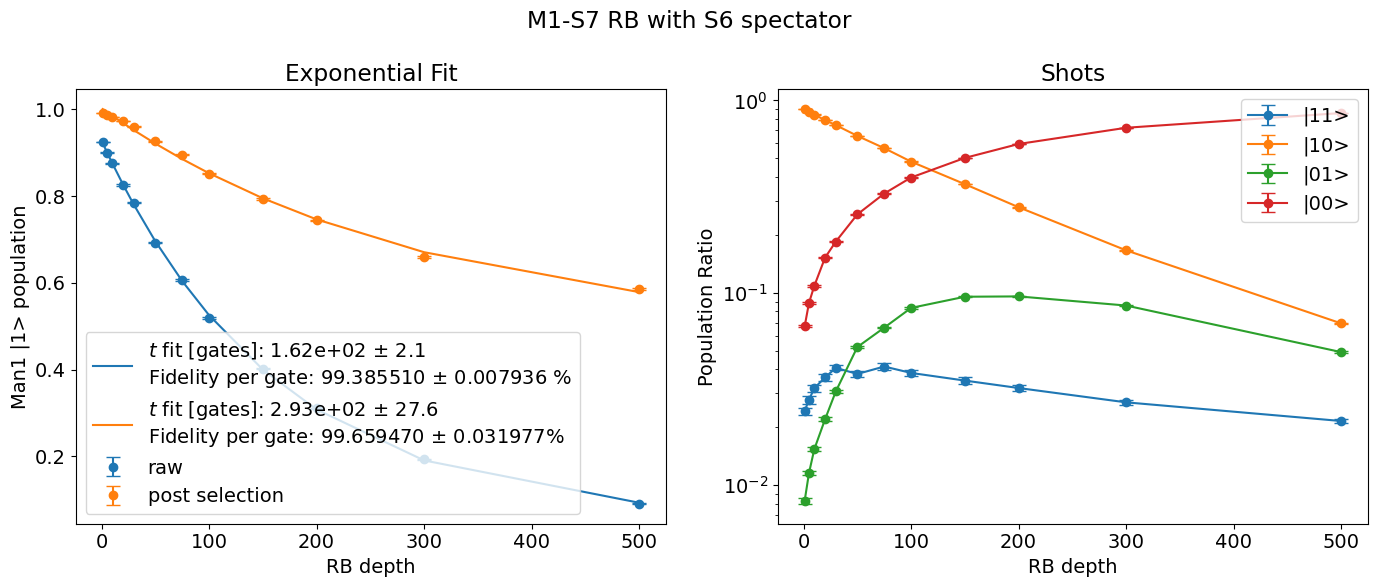

    target  spectator                                          file_list  \
0        1          2     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]   
1        1          3  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...   
2        1          4  [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...   
3        1          5  [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...   
4        1          6  [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...   
5        1          7  [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...   
6        2          1  [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...   
7        2          3  [98, 99, 100, 101, 102, 103, 104, 105, 106, 10...   
8        2          4  [112, 113, 114, 115, 116, 117, 118, 119, 120, ...   
9        2          5  [126, 127, 128, 129, 130, 131, 132, 133, 134, ...   
10       2          6  [140, 141, 142, 143, 144, 145, 146, 147, 148, ...   
11       2          7  [154, 155, 156, 157, 158, 159, 160, 161, 162, ...   
12       3  

In [590]:

# Assuming df is already defined and contains the columns 'target' and 'spectator'
df['fids_list'] = [None] * len(df)
df['fids_post_list'] = [None] * len(df)
df['depth_list'] = [None] * len(df)
# Initialize lists to store the results
fids_list_all = []
fids_post_list_all = []

for jdx, target in enumerate(mode_list):
    target_spec_list = np.copy(mode_list)
    target_spec_list = np.delete(target_spec_list, jdx) #.remove(target)
    for idx, spec in enumerate(target_spec_list):
        # find the element in the DataFrame
        row = df[(df['target'] == target) & (df['spectator'] == spec)].iloc[0]
        # print('row', row)

        file_list = row['file_list']
        title = 'M1-S' + str(target) + ' RB with S' + str(spec) + ' spectator'

    #     # return_args = show_rb(prev_data, expt_path, file_list, name=row['name'], title=title)
    #     # fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

    #     # # Store the results in the lists
    #     # fids_list_all.append(fids_list)
    #     # fids_post_list_all.append(fids_post_list)

        try: 
            return_args = show_rb(prev_data, expt_path, file_list, name=row['name'], title=title)
            (fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list,
             fid, fid_err, fid_post, fid_post_err)= return_args
            # update fids list and fids post list in df 
            df.at[row.name, 'fids_list'] = fids_list
            df.at[row.name, 'fids_post_list'] = fids_post_list
            df.at[row.name, 'depth_list'] = depth_list

            # Store the results in the lists
            # fids_list_all.append(fids_list)
            # fids_post_list_all.append(fids_post_list)
        except FileNotFoundError:
            print('File not found')
            fids_list = None
            fids_post_list = None


# Display the updated DataFrame
print(df)

### Analysis

#### Open Dataframe

In [910]:
folder = os.path.join(parent_path, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters_withSingleSpec.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)
df = pd.read_csv(file_path)

In [911]:
mode_no = 1
# find all the rows with the target mode
df_target = df[df['target'] == mode_no]
# print(df_target) 

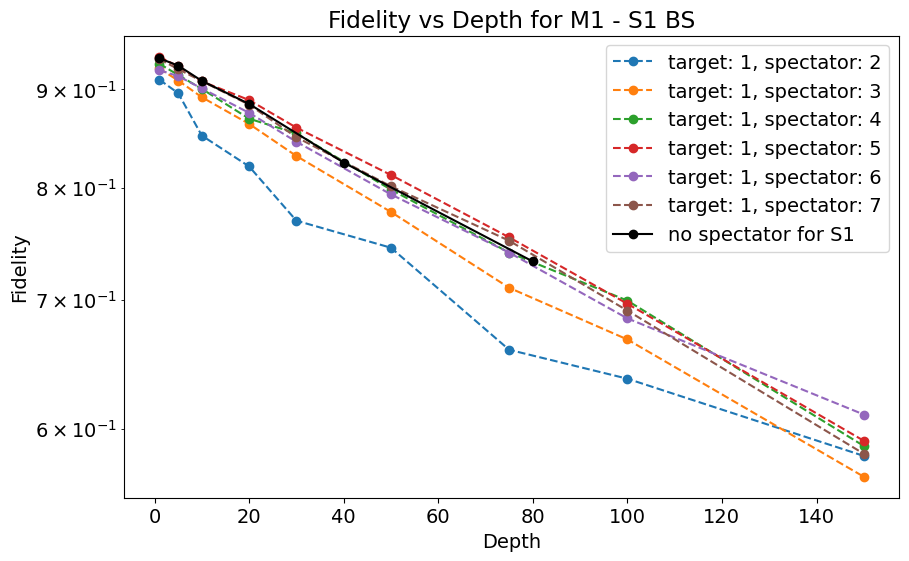

In [914]:
import ast 

end_idx = -5#None
end_idx_bs = -15#None
# df_bs_target = df_bs[df_bs['Mode'] == mode_no]
# plt.plot(ast.literal_eval(df_bs_target['depth_list'][0])[:end_idx_bs], ast.literal_eval(df_bs_target['fids_list'][0])[:end_idx_bs] ,'-o', label = 'no spectator for S' + str(mode_no))
  
  
for idx in range(len(df_target)): 
    depth_list = ast.literal_eval(df_target['depth_list'].iloc[idx])
    plt.plot(depth_list[:end_idx], ast.literal_eval(df_target['fids_list'].iloc[idx])[:end_idx], '--o', label = 'target: ' + str(df_target['target'].iloc[idx]) + ', spectator: ' + str(df_target['spectator'].iloc[idx]))
df_bs_target = df_bs[df_bs['Mode'] == mode_no]
plt.plot(ast.literal_eval(df_bs_target['depth_list'].iloc[0])[:end_idx_bs], ast.literal_eval(df_bs_target['fids_list'].iloc[0])[:end_idx_bs] ,'-o', color = 'black', label = 'no spectator for S' + str(mode_no))
    
plt.yscale('log')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Depth for M1 - S' + str(mode_no) +' BS')
plt.show()

### Saving dataframe

In [591]:
df

target  spectator                                          file_list  \
0        1          2     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]   
1        1          3  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 2...   
2        1          4  [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...   
3        1          5  [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 5...   
4        1          6  [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...   
5        1          7  [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...   
6        2          1  [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...   
7        2          3  [98, 99, 100, 101, 102, 103, 104, 105, 106, 10...   
8        2          4  [112, 113, 114, 115, 116, 117, 118, 119, 120, ...   
9        2          5  [126, 127, 128, 129, 130, 131, 132, 133, 134, ...   
10       2          6  [140, 141, 142, 143, 144, 145, 146, 147, 148, ...   
11       2          7  [154, 155, 156, 157, 158, 159, 160, 161, 162, ...   
12       3          1  [168, 169, 170, 171, 172, 173, 174, 175, 176, ...   
13       3          2  [182, 183, 184, 185, 186, 187, 188, 189, 190, ...   
14       3          4  [196, 197, 198, 199, 200, 201, 202, 203, 204, ...   
15       3          5  [210, 211, 212, 213, 214, 215, 216, 217, 218, ...   
16       3          6  [224, 225, 226, 227, 228, 229, 230, 231, 232, ...   
17       3          7  [250, 251, 252, 253, 254, 255, 256, 257, 258, ...   
18       4          1  [302, 303, 304, 305, 306, 307, 308, 309, 310, ...   
19       4          2  [314, 315, 316, 317, 318, 319, 320, 321, 322, ...   
20       4          3  [326, 327, 328, 329, 330, 331, 332, 333, 334, ...   
21       4          5  [338, 339, 340, 341, 342, 343, 344, 345, 346, ...   
22       4          6  [350, 351, 352, 353, 354, 355, 356, 357, 358, ...   
23       4          7  [362, 363, 364, 365, 366, 367, 368, 369, 370, ...   
24       5          1  [374, 375, 376, 377, 378, 379, 380, 381, 382, ...   
25       5          2  [386, 387, 388, 389, 390, 391, 392, 393, 394, ...   
26       5          3  [398, 399, 400, 401, 402, 403, 404, 405, 406, ...   
27       5          4  [410, 411, 412, 413, 414, 415, 416, 417, 418, ...   
28       5          6  [422, 423, 424, 425, 426, 427, 428, 429, 430, ...   
29       5          7  [434, 435, 436, 437, 438, 439, 440, 441, 442, ...   
30       6          1  [446, 447, 448, 449, 450, 451, 452, 453, 454, ...   
31       6          2  [458, 459, 460, 461, 462, 463, 464, 465, 466, ...   
32       6          3  [470, 471, 472, 473, 474, 475, 476, 477, 478, ...   
33       6          4  [482, 483, 484, 485, 486, 487, 488, 489, 490, ...   
34       6          5  [494, 495, 496, 497, 498, 499, 500, 501, 502, ...   
35       6          7  [506, 507, 508, 509, 510, 511, 512, 513, 514, ...   
36       7          1  [518, 519, 520, 521, 522, 523, 524, 525, 526, ...   
37       7          2  [530, 531, 532, 533, 534, 535, 536, 537, 538, ...   
38       7          3  [542, 543, 544, 545, 546, 547, 548, 549, 550, ...   
39       7          4  [554, 555, 556, 557, 558, 559, 560, 561, 562, ...   
40       7          5  [566, 567, 568, 569, 570, 571, 572, 573, 574, ...   
41       7          6  [578, 579, 580, 581, 582, 583, 584, 585, 586, ...   

                                                 name  \
0   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
1   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
2   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
3   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
4   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
5   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
6   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
7   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
8   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
9   _DualRail_sweep_depth_and_single_spec_and_stor.h5   
10  _DualRail_sweep_depth_and_single_spec_and_stor.h5   
11  _DualRail_sweep_depth_and_single_spec_and_stor.

In [592]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(parent_path, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters_withSingleSpec.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\DualRail_BeamSplitters_withSingleSpec.csv


### Taking account of decaying spectator population

In [639]:
target_mode = 1 
mode_list = [1,2,3,4,5,6,7]
# ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1-S' + str(target_mode)]['h_pi (mus)'].values[0]
# df_bs_target = df_bs[df_bs['Mode'] == target_mode]
# df_bs_target['fid'][0]

0.9966516501097786

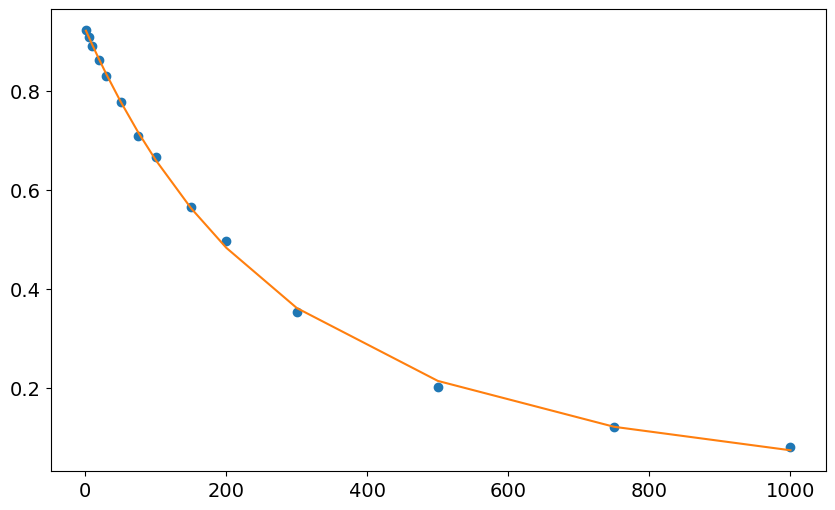

In [587]:
alpha = 1/2 
bs_time = (ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1-S' + str(target_mode)]['h_pi (mus)'].values[0] +0.03) * 4/3
# get fidelity without spectators 
df_bs_target = df_bs[df_bs['Mode'] == target_mode]
F0 = df_bs_target['fid'][0] # original fidelity

# decay constant of all modes 
mode_kappas = 1/np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]) #* 2 * np.pi
specs_decay_during_gate = np.exp(-1 * bs_time * mode_kappas) # This is the A = e^-bs_kappa   



spectators = mode_list.copy().remove(target_mode)
df_target = df[df['target'] == target_mode]

for idx, spectator_no in enumerate(spectators): 
    depth_list = df_target['depth_list'].iloc[idx]
# now we fit 
    spec_decay_during_gate = specs_decay_during_gate[idx] # This is the A = e^-kappa 
    xlist = alpha * np.array([np.sum([spec_decay_during_gate**idx for idx in range(1, depth + 1)]) for depth in depth_list])
    ylist = df['fids_list'][df_idx] # fix indexing here 

    # fit the data 
    p, pcov = fitter.fitexp(xlist, ylist, fitparams=None)
    plt.plot(depth_list, ylist, 'o', label='data')
    plt.plot(depth_list, fitter.expfunc(xlist, *p), label='fit')
    #plt.yscale('log')



In [588]:
eps = 1/p[3]
F1 = F0 * (1 - eps)
print('F1', F1)

F1 0.9898224314653671


#### Taking ratios with original data

In [423]:
orig_fids = np.array([0.933563187108675,
 0.92539176866761,
 0.9087188054244721,
 0.8840371531169321,
 0.8243200041125598,
 0.732525065550077,
 0.656262948628661,
 0.5711454069490541,
 0.5045778560471665,
 0.42591115587216233,
 0.3588287632837851,
 0.2423387017769282,
 0.10600582186827374,
 0.06812440980482957,
 0.03966076721432621,
 0.030040979728466196])
alpha = 1/2
orig_depth_list = np.array([1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000])
for idx, depth in enumerate(depth_list):
    if depth in orig_depth_list: 
        jdx = np.argwhere(orig_depth_list == depth)[0][0]
        print(f'Fidelity at depth {depth} is {orig_fids[jdx]}')

        sum_depths = geometric_sum(1, spec_decay_during_gate, depth)
        eps = np.log(ylist[idx]/orig_fids[jdx]) / sum_depths / alpha
        print('new fidelity', ylist[idx])   
        print('orig fidelity', orig_fids[jdx])
        print(f'eps is {eps}')

    # print(f'Fidelity at depth {depth} is {orig_fids[idx]}')

Fidelity at depth 1 is 0.933563187108675
new fidelity 0.9252296579751743
orig fidelity 0.933563187108675
eps is -0.017933326977976814
Fidelity at depth 5 is 0.92539176866761
new fidelity 0.9149450188503231
orig fidelity 0.92539176866761
eps is -0.004564869396578952
Fidelity at depth 10 is 0.9087188054244721
new fidelity 0.904043673764834
orig fidelity 0.9087188054244721
eps is -0.0010436875673032254
Fidelity at depth 20 is 0.8840371531169321
new fidelity 0.8672759763454091
orig fidelity 0.8840371531169321
eps is -0.0019617149688137764
Fidelity at depth 200 is 0.5045778560471665
new fidelity 0.5192029330119216
orig fidelity 0.5045778560471665
eps is 0.0003657351127493666
Fidelity at depth 300 is 0.3588287632837851
new fidelity 0.3959085519919792
orig fidelity 0.3588287632837851
eps is 0.0009421546098638951
Fidelity at depth 1000 is 0.06812440980482957
new fidelity 0.06726371478293203
orig fidelity 0.06812440980482957
eps is -7.11886258403805e-05


In [408]:
orig_depth_list

array([   1,    5,   10,   20,   40,   80,  120,  160,  200,  250,  300,
        400,  700, 1000, 1500, 2000])

In [409]:
depth_list

[1, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300, 500, 750, 1000]

#### Taking ratios with adjacent modes

In [529]:
def geometric_sum(a, r, n):
    """
    Calculate the sum of the first n terms of a geometric series.

    Parameters:
    a (float): The first term of the series.
    r (float): The common ratio of the series.
    n (int): The number of terms to sum.

    Returns:
    float: The sum of the first n terms of the geometric series.
    """
    if r == 1:
        return a * n
    else:
        return a * (1 - r**n) / (1 - r)

In [656]:
# taking log of adjacent 
end_idx = None
ylist = df['fids_list'][df_idx][:end_idx] # fix indexing here
n = len(ylist)
log_list = np.zeros(n-1)
new_ratios = np.zeros(n-1)

def find_param_of_BS_during_spectator(target_mode_no, spectator_no): 
    ''' jj '''
    alpha = 1/2 
    bs_time = (ds_stor_man_swap.df[ds_stor_man_swap.df['stor_name'] == 'M1-S' + str(target_mode)]['h_pi (mus)'].values[0] +0.03) * 4/3
    # get fidelity without spectators 
    df_bs_target = df_bs[df_bs['Mode'] == target_mode]
    F0 = df_bs_target['fid'][0] # original fidelity

    # decay constant of all modes 
    mode_kappas = 1/np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]) #* 2 * np.pi
    specs_decay_during_gate = np.exp(-1 * bs_time * mode_kappas) # This is the A = e^-bs_kappa   

    spectators = np.delete([1,2,3,4,5,6,7], target_mode -1)
    print('spectators', spectators)
    df_target = df[df['target'] == target_mode]

    # fid idx of spectator mode 
    jdx = 0
    for idx, spectator_no_list in enumerate(spectators):
        if spectator_no_list == spectator_no:
            jdx = idx
            break
    
    depth_list = df_target['depth_list'].iloc[jdx]
    # now we fit 
    spec_decay_during_gate = specs_decay_during_gate[jdx] # This is the A = e^-kappa 
    xlist = alpha * np.array([np.sum([spec_decay_during_gate**idx for idx in range(1, depth + 1)]) for depth in depth_list])
    ylist = df_target['fids_list'].iloc[jdx] # fix indexing here 
    return F0, spec_decay_during_gate, ylist, depth_list, alpha

def get_bs_ratio(target_mode): 
    '''
    get ratio of fidelity between adjacent gate depths 
    '''
    df_bs_target = df_bs[df_bs['Mode'] == target_mode]
    depth_list = ast.literal_eval(df_bs_target['depth_list'].iloc[0])
    fids_list = ast.literal_eval(df_bs_target['fids_list'].iloc[0])
    new_ratios = np.zeros(len(fids_list)-1)
    for idx in range(len(fids_list)-1): 
        new_ratios[idx] = fids_list[idx+1]/fids_list[idx]
    return new_ratios, depth_list


def get_fidelity_in_presence_of_spectator(F0, spec_decay_during_gate, ylist, depth_list, alpha):
    '''
    F0: fidelity without spectators
    spec_decay_during_gate: decay constant of the spectator  during the bs_gate gate
    ylist: fidelity with spectators
    depth_list: list of depths
    alpha: how much 1s in initial state 
    '''
    new_ratios = np.zeros(n-1)
    log_list = np.zeros(n-1)
    old_ratios = np.zeros(n-1)

    for i in range(n-1):
        # compute sum A^i where A ^ -k
        min_depth = depth_list[i] 
        max_depth = depth_list[i+1]
        # print('min_depth', min_depth)
        # print('max_depth', max_depth)
        
        # sum_depths = np.sum([spec_decay_during_gate**idx for idx in range(min_depth+1, max_depth + 1)]) 
        sum_depths = geometric_sum(1, spec_decay_during_gate, max_depth)- geometric_sum(1, spec_decay_during_gate, min_depth)
        # print('sum_depths', sum_depths)
        # print('------------------------------')
        # print('new ratio',ylist[i+1]/ylist[i] )
        new_ratios[i] = ylist[i+1]/ylist[i]
        # print('old ratio', F0**(max_depth-min_depth))
        old_ratios[i] = F0**(max_depth-min_depth)
        # print(ylist[i+1]/ylist[i] / (F0**(max_depth-min_depth)))
        log_list[i] = min(np.log(ylist[i+1]/ylist[i] / (F0**(max_depth-min_depth))), 0) * 1/(alpha * sum_depths)
    # if log_list[i] == 0:
    #     #ignore data point 
    #     log_list[i] = None # np.nan
    return log_list, new_ratios, old_ratios
    
    
# plt.plot(depth_list[1:end_idx], log_list, 'o', label='data')
# # plt.yscale('log')
# plt.ylabel('epsilon')

In [655]:
listy = [1,2,3,4,5,6,7]
listy = np.delete(listy, 0)
listy

array([2, 3, 4, 5, 6, 7])

spectators [2 3 4 5 6 7]


Text(0.5, 0, 'depth')

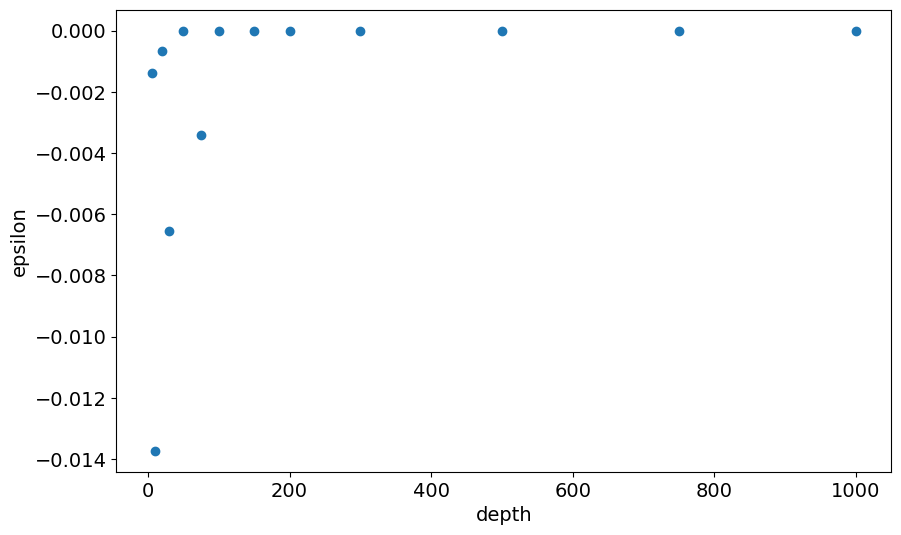

In [666]:
target_mode = 1
spectator_mode = 2
F0, spec_decay_during_gate, ylist, depth_list, alpha = find_param_of_BS_during_spectator(target_mode, spectator_mode)
log_list, new_ratios, old_ratios = get_fidelity_in_presence_of_spectator(F0, spec_decay_during_gate, ylist, depth_list, alpha)
plt.plot(depth_list[1:], log_list, 'o', label='log_list ')
plt.ylabel('epsilon')
plt.xlabel('depth')

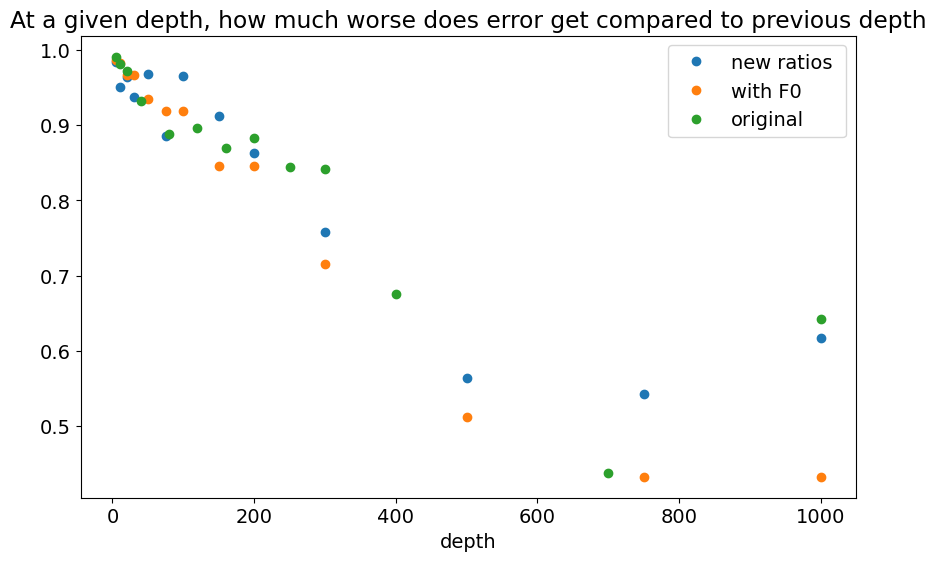

In [669]:
plt.plot(depth_list[1:], new_ratios, 'o', label='new ratios ')
plt.plot(depth_list[1:], old_ratios, 'o', label='with F0 ')
bs_ratios, bs_depth_list = get_bs_ratio(1)
bs_end_idx = -7
plt.plot(bs_depth_list[1:bs_end_idx], bs_ratios[:bs_end_idx], 'o', label='original')
plt.legend()
#xlabel 
#ylabel
plt.xlabel('depth')
plt.title('At a given depth, how much worse does error get compared to previous depth')
plt.show()

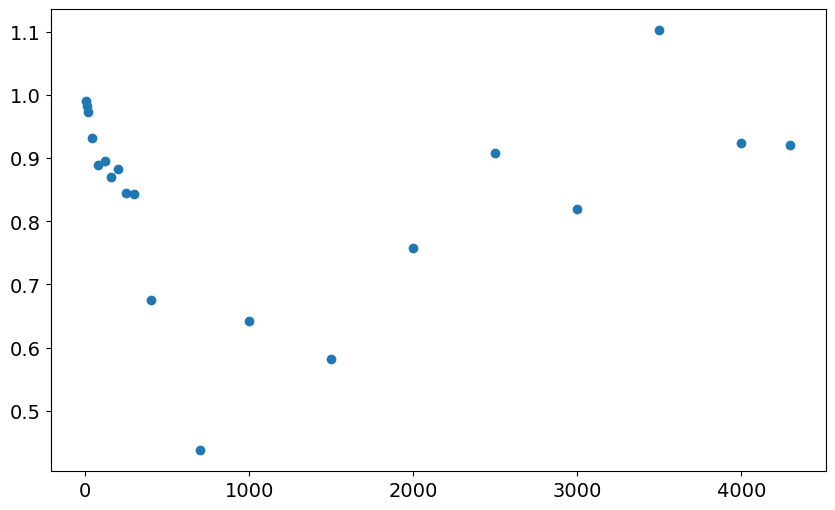

In [641]:
s = [2,3,4]
np.argwhere(s, 2)


TypeError: argwhere() takes 1 positional argument but 2 were given

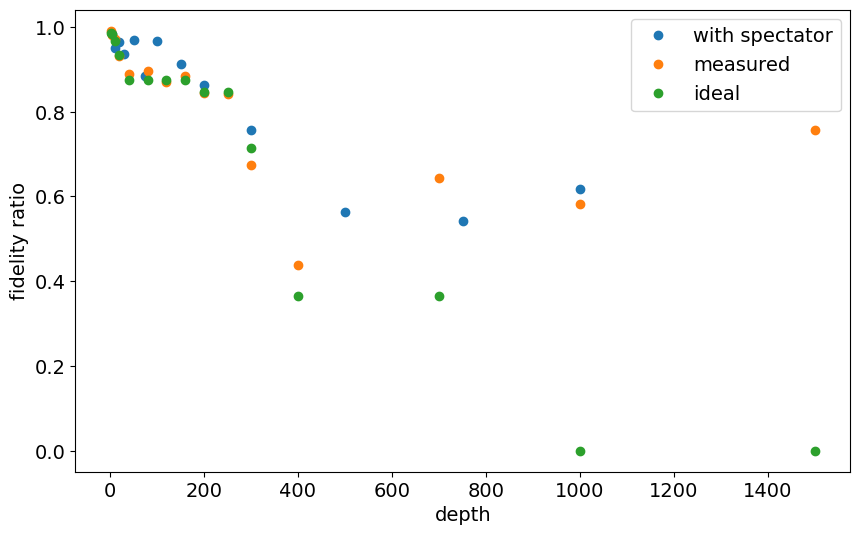

In [537]:
plt.plot(depth_list[1:end_idx], new_ratios, 'o', label='with spectator')

orig_fids_list = [0.933563187108675,
 0.92539176866761,
 0.9087188054244721,
 0.8840371531169321,
 0.8243200041125598,
 0.732525065550077,
 0.656262948628661,
 0.5711454069490541,
 0.5045778560471665,
 0.42591115587216233,
 0.3588287632837851,
 0.2423387017769282,
 0.10600582186827374,
 0.06812440980482957,
 0.03966076721432621,
 0.030040979728466196] 
orig_depth_list = [1, 5, 10, 20, 40, 80, 120, 160, 200, 250, 300, 400, 700, 1000, 1500, 2000]
ratios = np.zeros(len(orig_fids_list) -1 )
for idx, fid  in enumerate(orig_fids_list[:-1]):
    depth1 = orig_depth_list[idx]
    depth2 = orig_depth_list[idx+1]
    ratios[idx] = (orig_fids_list[idx+1] / orig_fids_list[idx])

fid = 0.99665
ideal_ratios = np.zeros(len(orig_fids_list) -1)
for idx,  __ in enumerate(fids_list[:-1]):
    depth1 = orig_depth_list[idx]
    depth2 = orig_depth_list[idx+1]
    ideal_ratios[idx] = fid ** (depth2 - depth1)
ideal_ratios
plt.plot(orig_depth_list[:-1],  ratios, 'o', label = 'measured')
plt.plot(orig_depth_list[:-1],  ideal_ratios, 'o', label = 'ideal')
plt.xlabel('depth')
plt.ylabel('fidelity ratio')
plt.legend()

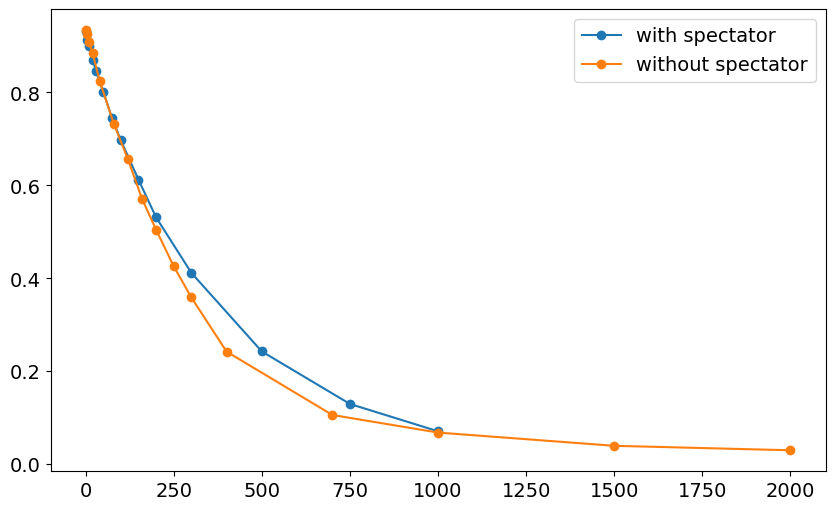

In [540]:
plt.plot(depth_list, fids_list, '-o', label='with spectator')
plt.plot(orig_depth_list, orig_fids_list, '-o', label='without spectator')
plt.legend()

In [515]:
log_list

array([-0.0013792 , -0.01359764, -0.00065438, -0.00632172,  0.        ,
       -0.0031361 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [516]:
eps = np.mean(log_list)
F1_err = np.std(np.abs(log_list)) * F0
F1 = F0 * (1 +eps)
print(f'{F1*1e2} +/- {F1_err*1e2}')#, F1, F1_err)

99.4726538135862 +/- 0.3796191340147321


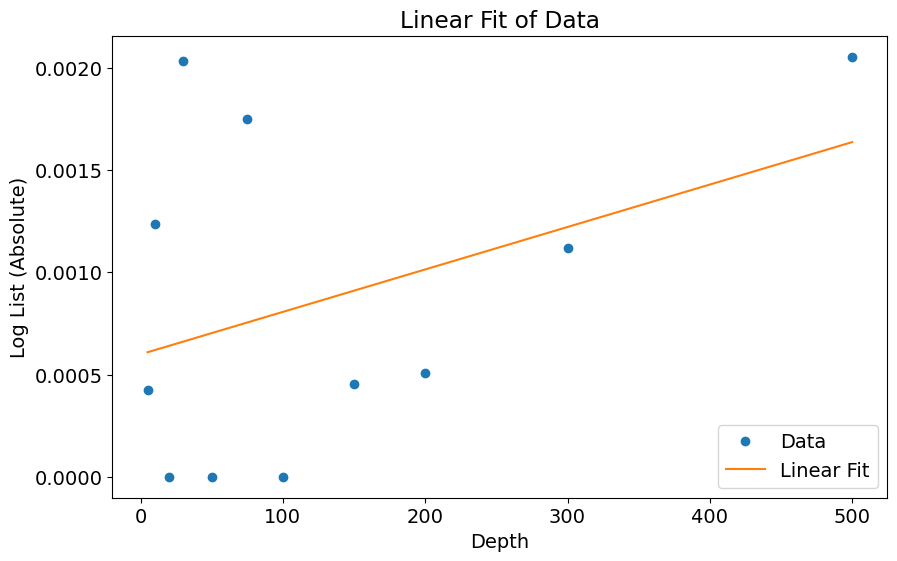

Fitting parameters (slope, intercept): [2.07697142e-06 5.98809480e-04]
Standard errors of the parameters: [1.61818847e-06 3.16967480e-04]


In [450]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the linear function
def linear_func(x, a, b):
    return a * x + b


# Prepare data for fitting
reg_y = np.array(np.abs(log_list))
reg_x = np.array(depth_list[1:end_idx])

# Perform linear fitting using curve_fit
popt, pcov = curve_fit(linear_func, reg_x, reg_y)
fit_y = linear_func(reg_x, *popt)

# Calculate the standard errors of the fit parameters
perr = np.sqrt(np.diag(pcov))

# Plot the data and the fit
plt.plot(reg_x, reg_y, 'o', label='Data')
plt.plot(reg_x, fit_y, '-', label='Linear Fit')
plt.xlabel('Depth')
plt.ylabel('Log List (Absolute)')
plt.legend()
plt.title('Linear Fit of Data')
plt.show()

# Print the fitting parameters and their errors
print("Fitting parameters (slope, intercept):", popt)
print("Standard errors of the parameters:", perr)

In [352]:
eps = popt[1]
F1 = F0 * (1 - eps)
F1_err = F0 * perr[1]
print(f'{F1*1e2} +/- {F1_err*1e2}')#, F1, F1_err)

98.97593076037099 +/- 0.13133427616735266


In [343]:
p

array([-1.94038600e-05,  7.76009262e-03])

In [339]:
eps = np.mean(np.abs(log_list))
F1_err = np.std(np.abs(log_list)) * F0
F1 = F0 * (1 - eps)
print(f'{F1*1e2} +/- {F1_err*1e2}')#, F1, F1_err)

99.22930989278312 +/- 0.4067412960959434


#### Delteing 0 and 1 data

978.0274603738901
976.0276039763436
985.0276436933043
986.0283274826324
1970.0582565853633
1962.059729867562
1958.0619937786846
2935.103168887862
2917.108931483359
2913.106007862274
2943.1296855207465
4904.246497786693
4897.283835484123
9793.587145911699


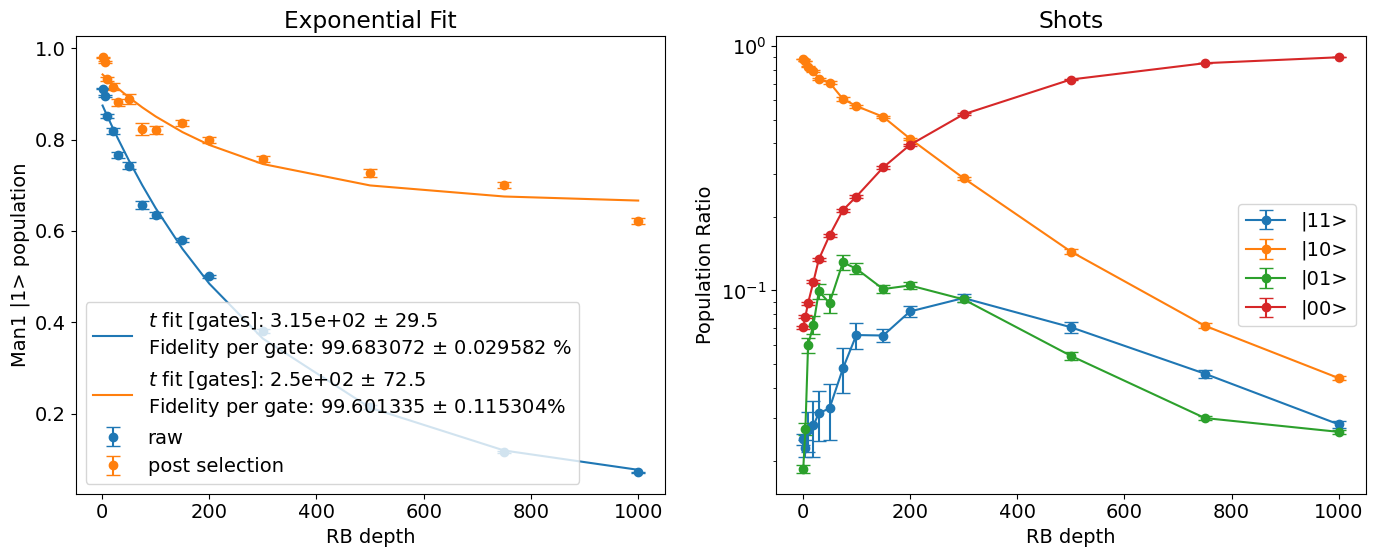

In [280]:
# df_idx = 0
file_list = df['file_list'][df_idx]
try: 
    return_args = show_rb(prev_data, expt_path, file_list, name=df['name'][df_idx], title='', dual_rail_spec=True, skip_spec_state_idx=[0,1])
    fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args
    # update fids list and fids post list in df 
    # df.at[row.name, 'fids_list'] = fids_list
    # df.at[row.name, 'fids_post_list'] = fids_post_list

    # Store the results in the lists
    # fids_list_all.append(fids_list)
    # fids_post_list_all.append(fids_post_list)
except FileNotFoundError:
    print('File not found')
    fids_list = None
    fids_post_list = None

In [281]:
ylist = fids_list

0.992218079173286
0.9635926717941233
0.9861857542860767
0.9602133955830323
1.0187252246812235
0.9403399300481712
1.0296704989012795
1.035013779539122
0.97851091934093
0.9786410726161453


ValueError: x and y must have same first dimension, but have shapes (14,) and (10,)

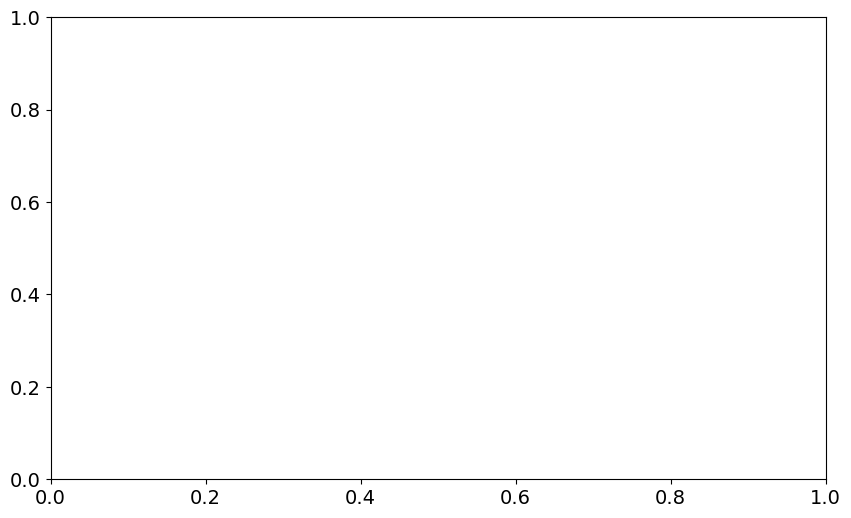

In [334]:
# taking log of adjacent 
end_idx = -3
ylist = fids_list[:end_idx] # fix indexing here
n = len(ylist)
log_list = np.zeros(n-1)
alpha = 1/2

for i in range(n-1):
    # compute sum A^i where A ^ -k
    min_depth = depth_list[i] 
    max_depth = depth_list[i+1]
    # print('min_depth', min_depth)
    # print('max_depth', max_depth)
    
    # sum_depths = np.sum([spec_decay_during_gate**idx for idx in range(min_depth+1, max_depth + 1)]) 
    sum_depths = geometric_sum(1, spec_decay_during_gate, max_depth)- geometric_sum(1, spec_decay_during_gate, min_depth)
    # print('sum_depths', sum_depths)
    print(ylist[i+1]/ylist[i] / (F0**(max_depth-min_depth)))
    log_list[i] = np.log(ylist[i+1]/ylist[i] / (F0**(max_depth-min_depth))) * 1/(alpha * sum_depths)
    
plt.plot(depth_list, np.abs(log_list), 'o', label='data')
plt.yscale('log')
plt.ylabel('epsilon')

In [287]:
eps = np.mean(np.abs(log_list))
F1_err = np.std(np.abs(log_list)) * F0
F1 = F0 * (1 - eps)
print(f'{F1*1e2} +/- {F1_err*1e2}')#, F1, F1_err)

99.26771804065005 +/- 0.3442700246130339


In [170]:
ylist

[0.9222854589478902,
 0.909096866749857,
 0.8911702155054483,
 0.8632367903779726,
 0.8307794385450943,
 0.7771063660009275,
 0.7098875721489712,
 0.6674092188489446,
 0.5665773488359892,
 0.4968374360781341,
 0.3544178685218927,
 0.2024364223751546,
 0.12251060768491917,
 0.08134914426433809]

In [167]:
fitter.expfunc(xlist, *p)

array([0.92226657, 0.57482039, 0.57482038, 0.57482038, 0.57482038,
       0.57482038, 0.57482038, 0.57482038, 0.57482038, 0.57482038,
       0.57482038, 0.57482038, 0.57482038, 0.57482038])

In [166]:
len(depth_list)

14

In [165]:
len(xlist)

14

In [156]:
alpha * [np.sum([spec_decay_during_gate**idx for idx in range(1, depth + 1)]) for depth in depth_list]

TypeError: can't multiply sequence by non-int of type 'float'

In [155]:
alpha

0.5

In [147]:
depth = 1
np.sum([spec_decay_during_gate**idx for idx in range(1, depth + 1)])

0.012503274574487522

#### Isolating by spectator states

In [462]:

def find_true_fidelity(ylist, depth_list, spec_decay_during_gate, alpha, end_idx = -2): 
    '''Analysis for extracting dual rail fidelity in presence of spectator'''
    print('ylist', ylist)
    
    ylist = ylist[:end_idx] 
    # n = len(ylist)
    log_list = np.zeros(n-1)
    for i in range(n-1):
        # compute sum A^i where A ^ -k
        min_depth = depth_list[i] 
        max_depth = depth_list[i+1]
        # print('min_depth', min_depth)
        # print('max_depth', max_depth)
        
        # sum_depths = np.sum([spec_decay_during_gate**idx for idx in range(min_depth+1, max_depth + 1)]) 
        sum_depths = geometric_sum(1, spec_decay_during_gate, max_depth)- geometric_sum(1, spec_decay_during_gate, min_depth)
        # print('sum_depths', sum_depths)
        print(ylist[i+1]/ylist[i] / (F0**(max_depth-min_depth)))
        log_list[i] = max(np.log(ylist[i+1]/ylist[i] / (F0**(max_depth-min_depth))), 0) * 1/(alpha * sum_depths)
    
    eps = np.mean(np.abs(log_list))
    F1_err = np.std(np.abs(log_list)) * F0
    F1 = F0 * (1 - eps)
    print(f'{F1*1e2} +/- {F1_err*1e2}')#, F1, F1_err)
    return log_list, F1, F1_err

In [477]:
alpha = 1/2 
bs_time = (0.666955+0.03) * 4/3 #(0.488 +0.03) * 4/3
F0 = 0.9970 #0.99665 # original fidelity
mode_kappas = 1/np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]) #* 2 * np.pi
specs_decay_during_gate = np.exp(-1 * bs_time * mode_kappas)
depth_list = [1, 5, 10, 20, 30,
                 50, 75, 100, 150, 200,
                 300, 500, 750, 1000]

idx = 3
df_idx = 14
# now we fit 
spec_decay_during_gate = specs_decay_during_gate[idx]#s3

978.0261896404843
975.027116059726
983.0280676406142
973.0281576509547
1948.0567297342766
1960.0594632350867
1959.0664873764695
2926.1006846157647
2941.112719675575
2921.122576837255
2945.1366957433397
4882.256386977497
4877.281162770735
9828.593919791805


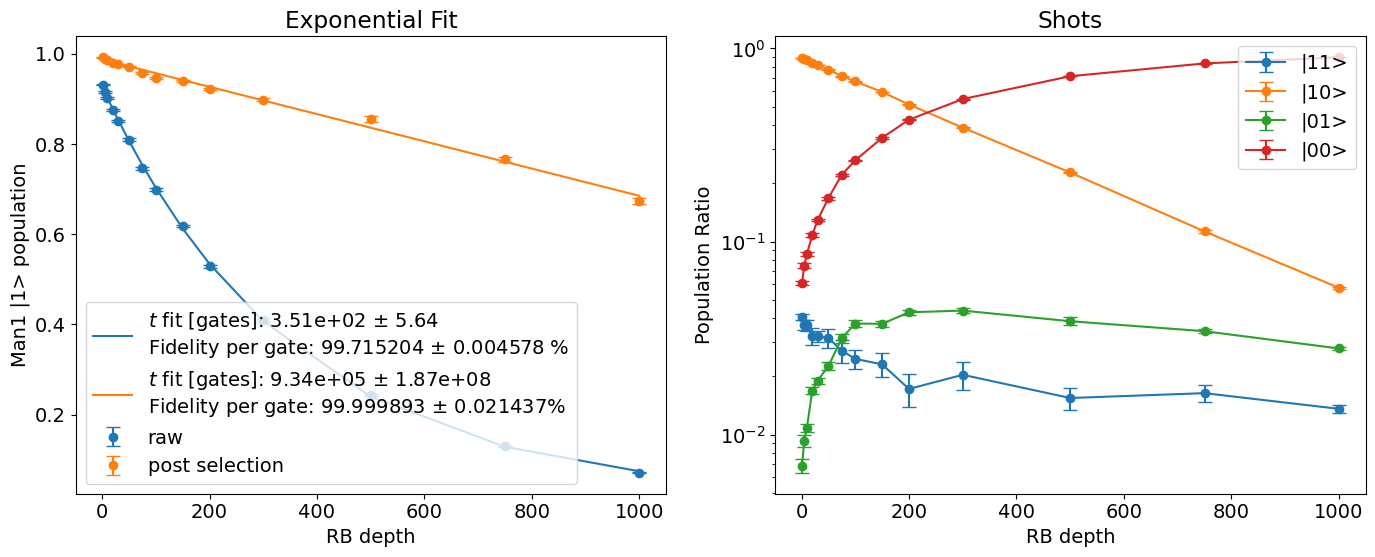

967.0257419855275
981.0263469120712
962.0277123254418
984.0280554178553
1952.0586141398446
1948.0613266134405
1962.0650905245657
2925.100938822363
2950.1138861032705
2939.120495678553
2932.1348205192976
4899.259607326037
4893.280704311699
9840.598127869665


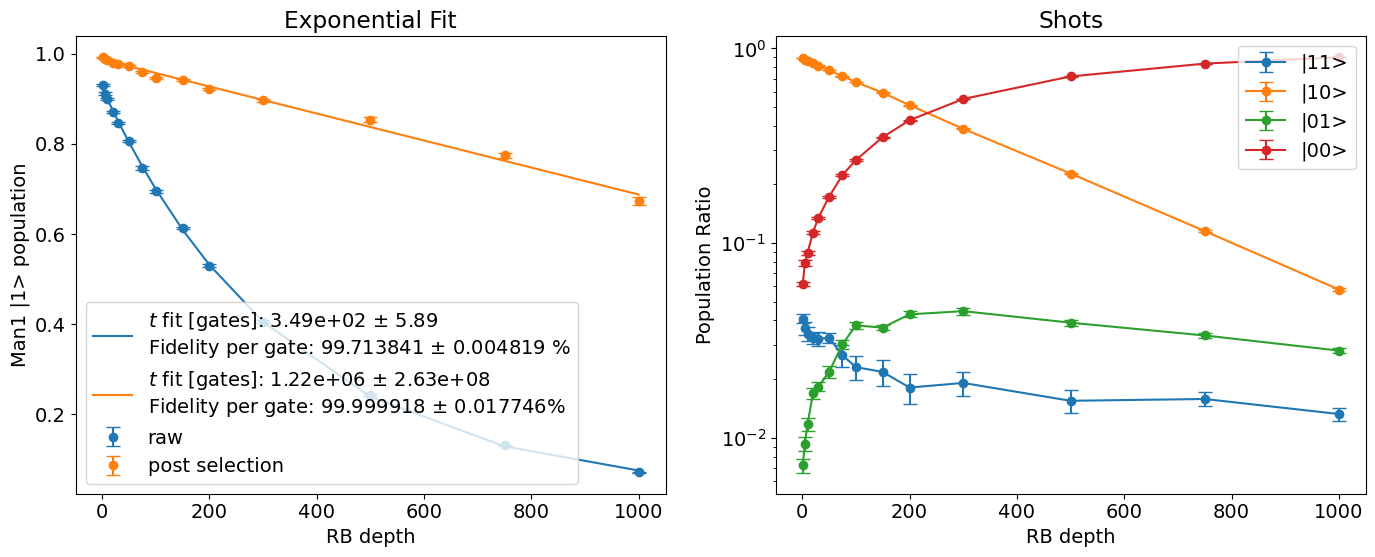

977.0253799204527
981.0261171876139
969.0273610614097
974.0273358745653
1967.058280397618
1966.0637446630785
1960.0639386540265
2943.1032430897385
2922.112454607601
2951.1254234343824
2939.136648648324
4891.257882557489
4888.281367027493
9808.593228459042


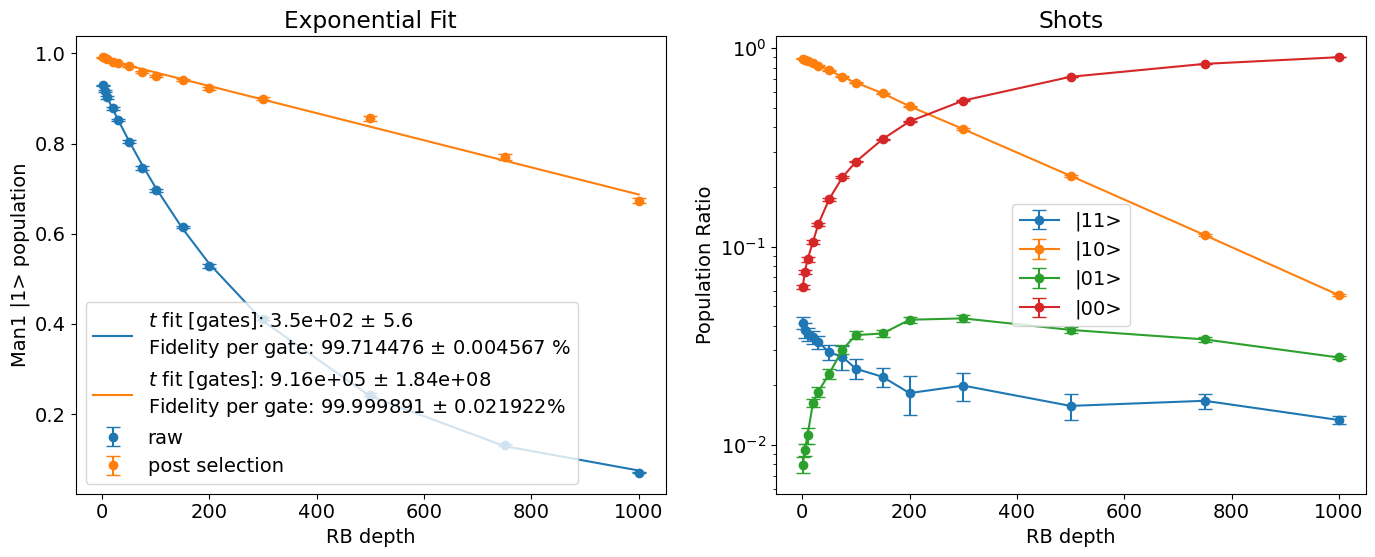

981.0263430077014
979.026836649981
967.0274963350074
966.0279392239976
1960.0586377521072
1961.0605076900667
1951.0635499520495
2952.1007449016015
2942.115368457952
2918.1218802538147
2927.1359394566866
4883.257304337022
4906.283999358252
9811.593438055732


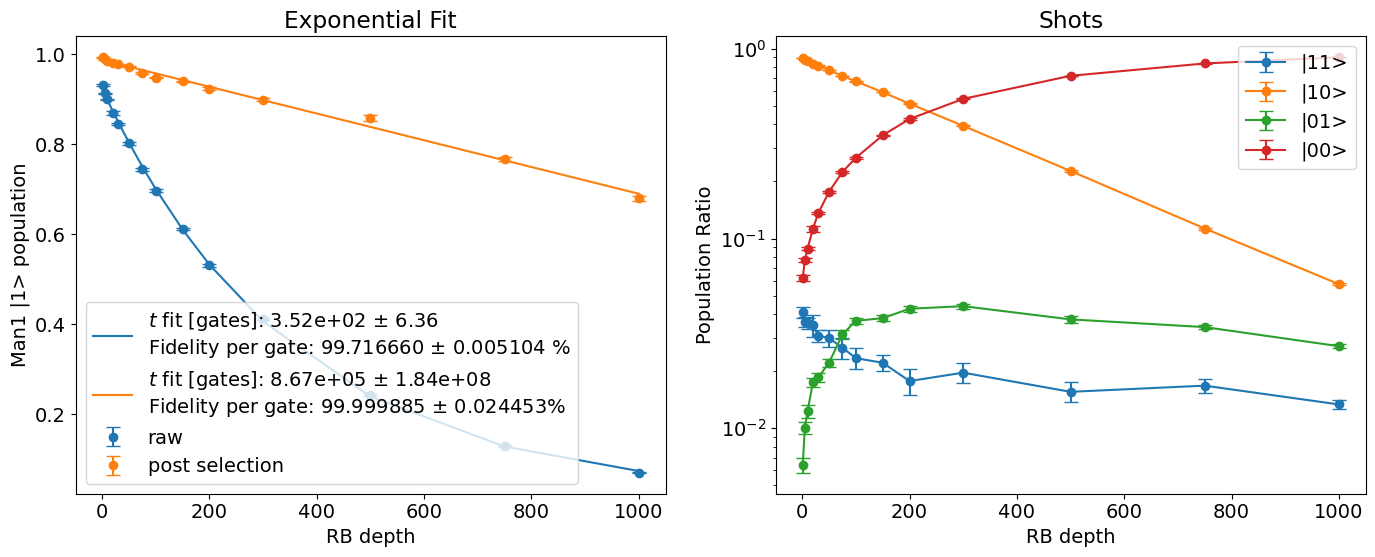

In [478]:
fid_lists = []
# df_idx = 0
file_list = df['file_list'][df_idx]
states = [2,3,4,5]
state_list = [0,1,2,3,4,5]
for spec_state in states: 
    new_state_list = state_list.copy()
    new_state_list.remove(spec_state)

    return_args = show_rb(prev_data, expt_path, file_list, name=df['name'][df_idx], title='',
                           dual_rail_spec=True, skip_spec_state_idx=new_state_list)
    fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args
    fid_lists.append(fids_list)
    

In [479]:
F1s = []
F1_errs = []

for idx, fid_list in enumerate(fid_lists): 
    print(f'Fidelity for spectator state {states[idx]}')
    log_list, F1, F1_err = find_true_fidelity(fid_list, depth_list, spec_decay_during_gate, alpha)
    F1s.append(F1)
    F1_errs.append(F1_err)
print('---------------------------------')
print(' mean F1s', np.mean(F1s) * 1e2)
print('mean F1_errs', np.sqrt(np.sum(np.array(F1_errs)**2)) / len(F1_errs) * 1e2)

    

Fidelity for spectator state 2
ylist [0.9322007630484419, 0.9156827976929565, 0.9031331462760575, 0.8752520578859656, 0.8518198003411266, 0.8095634695171473, 0.7464905938315379, 0.6991808779969486, 0.6181643899936562, 0.529398566772618, 0.40939645384714984, 0.2432716805147475, 0.1291633266173209, 0.0711528148100231]
0.9941569847718456
1.0012232700714598
0.9986878714691345
1.0029124145483372
1.0092528995933636
0.9940185268435583
1.009685791100681
1.0274401327848555
0.9952240495204793
1.0443485886134367
1.0837168260643828
99.63616123135982 +/- 0.05559107625879742
Fidelity for spectator state 3
ylist [0.9312126088365357, 0.9117861479183368, 0.8992464829664618, 0.8698955382998038, 0.8471830093625154, 0.8055843455253375, 0.7462493952589468, 0.6953466063190171, 0.6134910994095865, 0.5293797688390429, 0.4053781822957904, 0.24311450668222348, 0.13103978401499006, 0.07092731571532107]
0.9909768495956396
1.0011749306398146
0.9968659735748723
1.0035951427987189
1.0097889519122252
0.99860564371330

In [472]:
np.sqrt(np.sum(np.array(F1_errs)**2))/4

0.0004508651577719046

### Test Code 

In [89]:
import numpy as np
import pandas as pd

depth_list = [1, 5, 50, 100]

target_spec_list = [2,3,4,5,6,7]

file_list_start_no = 0
curr_file_no = file_list_start_no
name = '_SingleBeamSplitterRBPostSelection_sweep_depth_and_single_spec.h5'

# Initialize an empty list to store the data
data = []

for idx, targ_spec in enumerate(target_spec_list):

    
    file_list = np.arange(curr_file_no, curr_file_no + len(depth_list))
    curr_file_no = curr_file_no + len(depth_list) #* prepulse_vars_list[idx]
    
    # Append the data to the list
    data.append({
        'target_spec': targ_spec,
        'file_list': file_list.tolist(),  # Convert numpy array to list
        'name': name
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   target_spec         file_list  \
0            2      [0, 1, 2, 3]   
1            3      [4, 5, 6, 7]   
2            4    [8, 9, 10, 11]   
3            5  [12, 13, 14, 15]   
4            6  [16, 17, 18, 19]   
5            7  [20, 21, 22, 23]   

                                                name  
0  _SingleBeamSplitterRBPostSelection_sweep_depth...  
1  _SingleBeamSplitterRBPostSelection_sweep_depth...  
2  _SingleBeamSplitterRBPostSelection_sweep_depth...  
3  _SingleBeamSplitterRBPostSelection_sweep_depth...  
4  _SingleBeamSplitterRBPostSelection_sweep_depth...  
5  _SingleBeamSplitterRBPostSelection_sweep_depth...  


In [136]:

# Assuming df is already defined and contains the columns 'num_occupied_smodes', 'prepulse_vars', and 'file_list'

# Initialize lists to store the results
fids_list_all = []
fids_post_list_all = []

for idx, row in df.iterrows():
    print('idx', idx)
    # print('row', row)
    # print('num_occupied_smodes', row['num_occupied_smodes'])
    # print('prepulse_vars', row['prepulse_vars'])
    # print('file_list', row['file_list'])
    # print('file_list[0]', row['file_list'][0])

    file_list = row['file_list']
    spec = row['target_spec']
    title = 'M1-S1 RB with S' + str(spec) + ' spectator'

    # return_args = show_rb(prev_data, expt_path, file_list, name=row['name'], title=title)
    # fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

    # # Store the results in the lists
    # fids_list_all.append(fids_list)
    # fids_post_list_all.append(fids_post_list)

    try: 
        return_args = show_rb(prev_data, expt_path, file_list, name=row['name'], title=title)
        fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

        # Store the results in the lists
        fids_list_all.append(fids_list)
        fids_post_list_all.append(fids_post_list)
    except FileNotFoundError:
        print('File not found')
        fids_list_all.append([])
        fids_post_list_all.append([])

# Add the results to the DataFrame
df['fids_list'] = fids_list_all
df['fids_post_list'] = fids_post_list_all

# Display the updated DataFrame
print(df)

idx 0


KeyError: 'target_spec'

In [98]:
df

target_spec         file_list  \
0            2      [0, 1, 2, 3]   
1            3      [4, 5, 6, 7]   
2            4    [8, 9, 10, 11]   
3            5  [12, 13, 14, 15]   
4            6  [16, 17, 18, 19]   
5            7  [20, 21, 22, 23]   

                                                name  \
0  _SingleBeamSplitterRBPostSelection_sweep_depth...   
1  _SingleBeamSplitterRBPostSelection_sweep_depth...   
2  _SingleBeamSplitterRBPostSelection_sweep_depth...   
3  _SingleBeamSplitterRBPostSelection_sweep_depth...   
4  _SingleBeamSplitterRBPostSelection_sweep_depth...   
5  _SingleBeamSplitterRBPostSelection_sweep_depth...   

                                           fids_list  \
0  [0.9185776579183247, 0.8934754935387778, 0.714...   
1  [0.9169002658378405, 0.9038421537066219, 0.749...   
2  [0.922617593286261, 0.9099011180263896, 0.7963...   
3  [0.9363313572015832, 0.9281638405327376, 0.813...   
4                                                 []   
5                                                 []   

                                      fids_post_list  
0  [0.9825338626560982, 0.9651255807669955, 0.847...  
1  [0.9912572638374086, 0.990184525795975, 0.9736...  
2  [0.9921926077902951, 0.9899063644097545, 0.979...  
3  [0.9940383543334405, 0.9929771376351111, 0.981...  
4                                                 []  
5                                                 []

In [99]:
z = [np.array(_) for _ in df['fids_list'].values.flatten()]
z

[array([0.91857766, 0.89347549, 0.71483978, 0.60127782]),
 array([0.91690027, 0.90384215, 0.74958744, 0.65648133]),
 array([0.92261759, 0.90990112, 0.79632767, 0.69447075]),
 array([0.93633136, 0.92816384, 0.8134639 , 0.70094283]),
 array([], dtype=float64),
 array([], dtype=float64)]

## M1-S1 in presence of spectators

In [40]:
import numpy as np
import pandas as pd

depth_list = [1, 5, 10, 20, 30, 40,
              50, 75, 100, 150,
              200, 300, 500, 1000]

num_occupied_smodes_list = [1, 2, 3, 4, 5, 6]
prepulse_vars_list = [5, 5, 5, 5, 5, 1]

file_list_start_no = 3
curr_file_no = file_list_start_no

# Initialize an empty list to store the data
data = []

for idx, num_occupied_smodes in enumerate(num_occupied_smodes_list):
    print('num_occupied_smodes', num_occupied_smodes)
    print('prepulse_vars', prepulse_vars_list[idx])
    
    file_list = np.arange(curr_file_no, curr_file_no + len(depth_list))
    curr_file_no = curr_file_no + len(depth_list) #* prepulse_vars_list[idx]
    
    # Append the data to the list
    data.append({
        'num_occupied_smodes': num_occupied_smodes,
        'prepulse_vars': prepulse_vars_list[idx],
        'file_list': file_list.tolist()  # Convert numpy array to list
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
        

num_occupied_smodes 1
prepulse_vars 5
num_occupied_smodes 2
prepulse_vars 5
num_occupied_smodes 3
prepulse_vars 5
num_occupied_smodes 4
prepulse_vars 5
num_occupied_smodes 5
prepulse_vars 5
num_occupied_smodes 6
prepulse_vars 1
   num_occupied_smodes  prepulse_vars  \
0                    1              5   
1                    2              5   
2                    3              5   
3                    4              5   
4                    5              5   
5                    6              1   

                                           file_list  
0  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  
1  [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2...  
2  [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...  
3  [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...  
4  [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7...  
5  [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8...  


idx 0
972.027779143426
979.028115777132
985.0280772614071
973.028237353329
1964.059240739814
1957.0606572448432
2918.0936155899954
2938.0983215396827
2928.101544898143
2934.1254939465953
4901.206601270442
4888.240426859904
4902.2613770168455
9764.593982988885


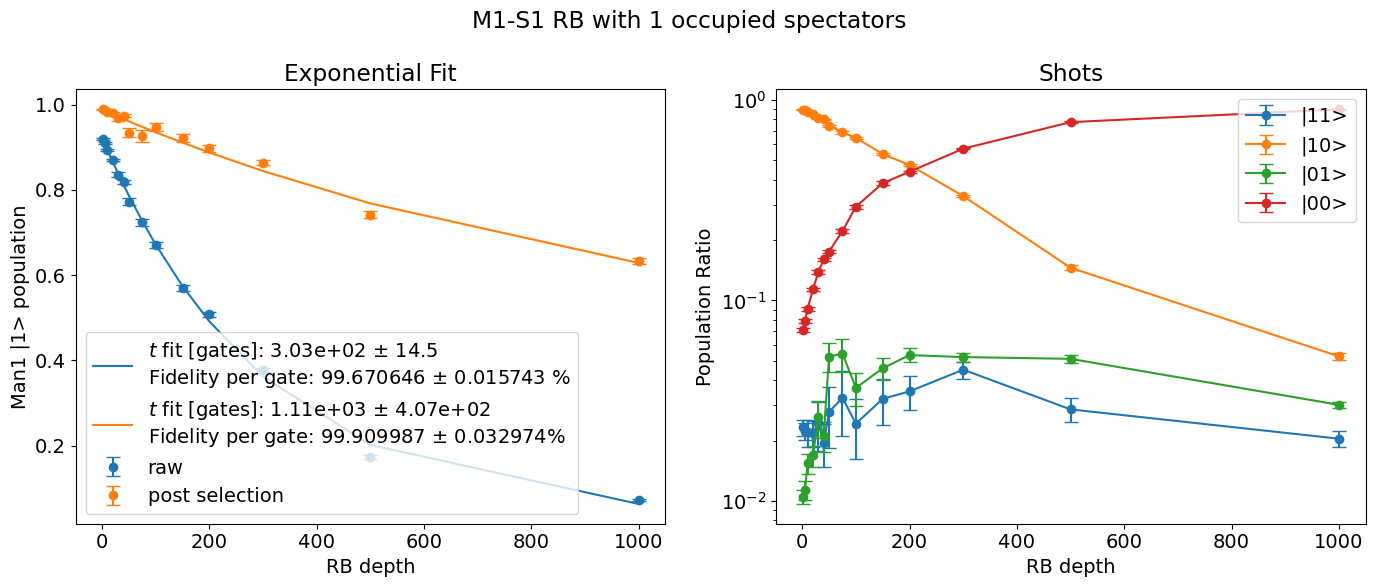

idx 1
969.0269986324234
968.0279901338357
978.0294145454445
976.0294081132367
1952.0580731369212
1958.0627595621515
2940.0953899402625
2919.09721890349
2942.095260104908
2927.109725113631
4888.210730995861
4914.233693852625
4876.2765376708485
9774.585772526192


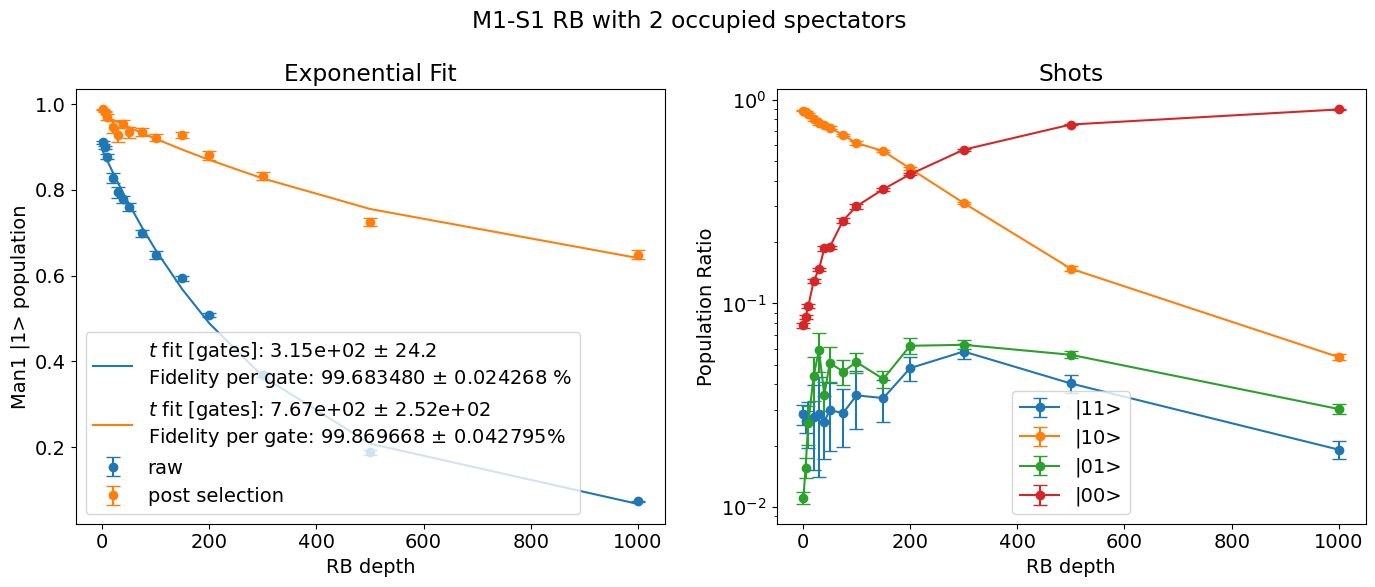

idx 2
978.0274263201571
971.0292451513825
981.0288762277545
983.0291183937791
1953.058353699433
1925.0614777462008
2906.093362021371
2911.111063540682
2926.097806933537
2862.112940626257
4871.200738857212
4888.1992298104615
4893.254400040039
9675.573123886104


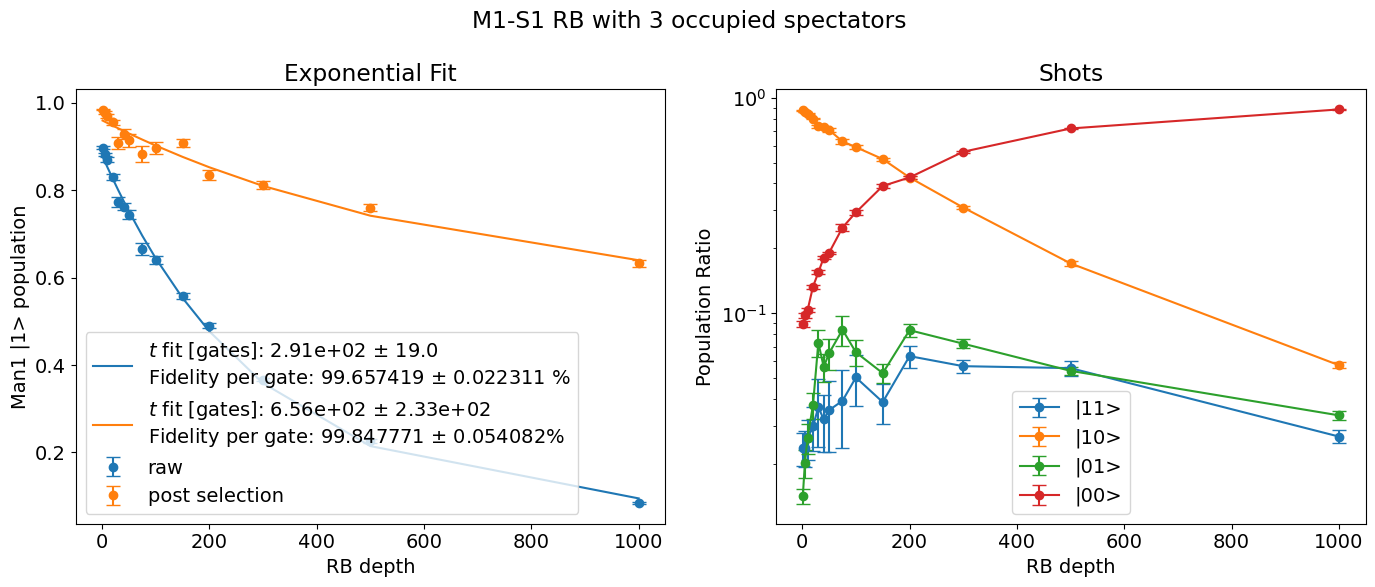

idx 3
945.0263998101843
971.0287462181208
984.0278196155188
982.0298253602513
1952.061705147739
1945.0637954089598
2918.095879931322
2932.1004644572913
2915.0950463788004
2929.103192924383
4862.210875835621
4890.228136326137
4870.264444957467
9814.574218269989


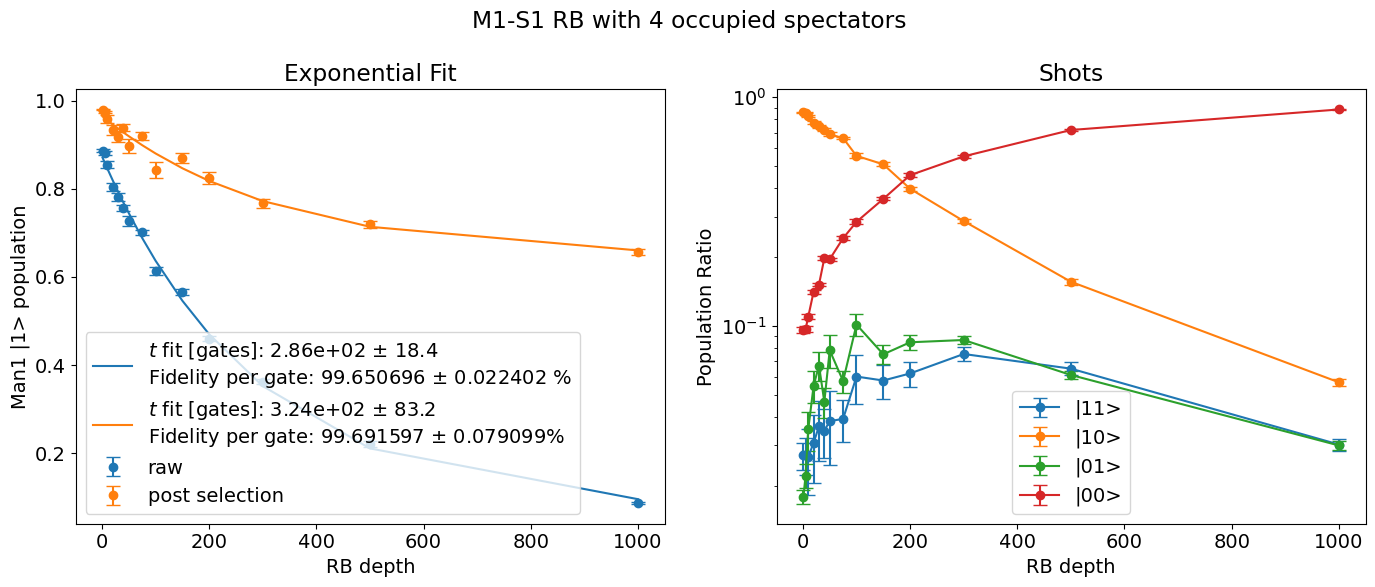

idx 4
981.0283267823469
973.0288129139509
971.0286840713327
977.0301769994498
1965.0630947517107
1960.0609348851096
2939.099490552427
2922.1059513214614
2939.1008195689847
2952.111491926589
4857.18974300617
4867.204265630733
4936.233486358086
9829.556565436436


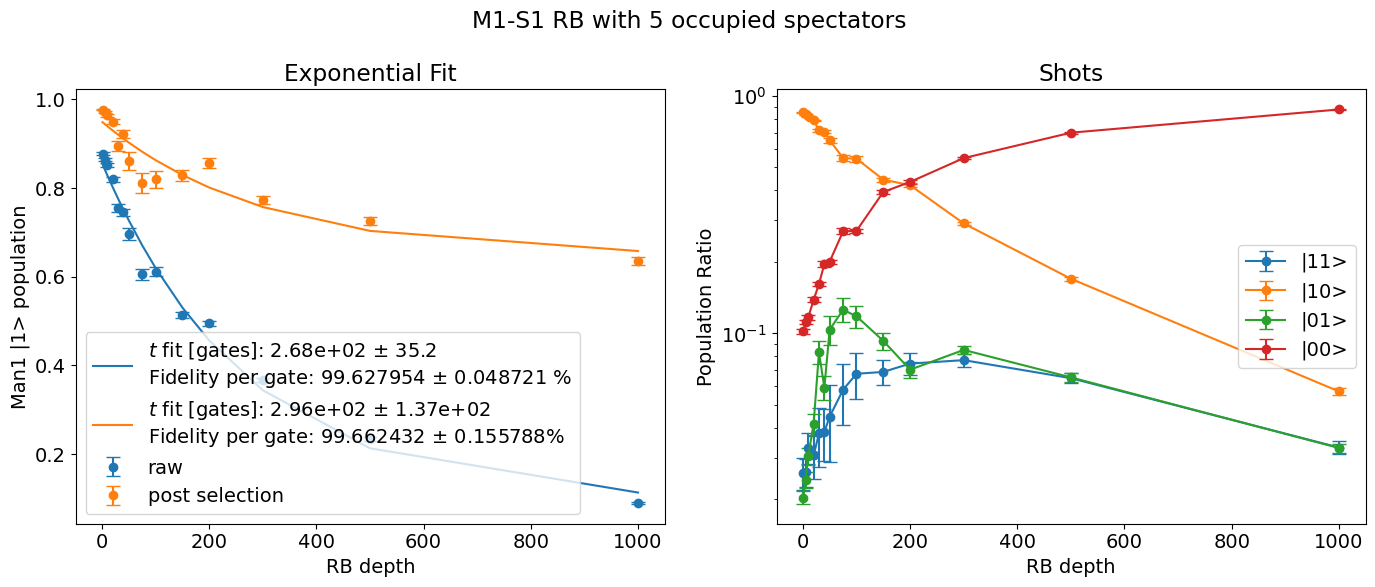

idx 5
970.0267451803439
978.0284315842457
979.0291170981166
977.028966851484
1959.0607199849915
1959.0605221040237
2938.099134684814
2944.104353368791
2943.105251148424
2927.100751530582
4897.188028421098
4907.21012341128
4902.243753108198
9805.59039864798


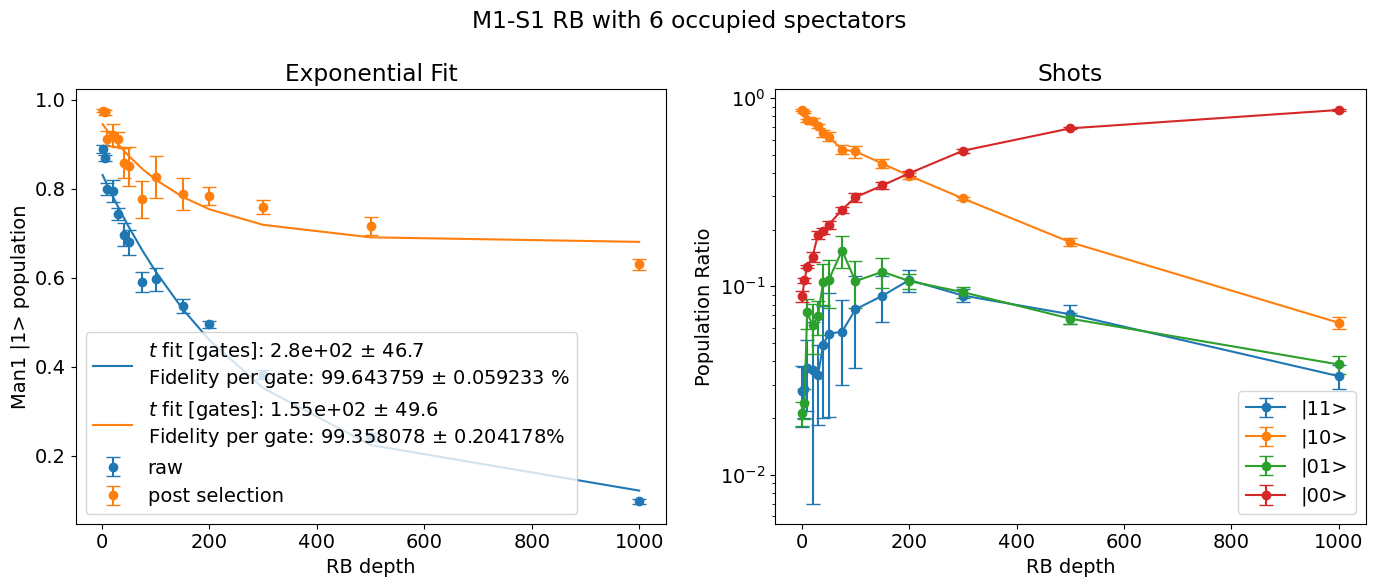

   num_occupied_smodes  prepulse_vars  \
0                    1              5   
1                    2              5   
2                    3              5   
3                    4              5   
4                    5              5   
5                    6              1   

                                           file_list  \
0  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]   
1  [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2...   
2  [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...   
3  [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...   
4  [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7...   
5  [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8...   

                                           fids_list  \
0  [0.9186765473092655, 0.9097015918189583, 0.893...   
1  [0.9108040579149775, 0.8988858978778735, 0.877...   
2  [0.8966278116297766, 0.8818154446169892, 0.869...   
3  [0.8862653274172184, 0.8811587682982251, 0.854...   
4  [0.8777671927203654, 0.8641671124063

In [44]:


# Assuming df is already defined and contains the columns 'num_occupied_smodes', 'prepulse_vars', and 'file_list'

# Initialize lists to store the results
fids_list_all = []
fids_post_list_all = []

for idx, row in df.iterrows():
    print('idx', idx)
    # print('row', row)
    # print('num_occupied_smodes', row['num_occupied_smodes'])
    # print('prepulse_vars', row['prepulse_vars'])
    # print('file_list', row['file_list'])
    # print('file_list[0]', row['file_list'][0])

    file_list = row['file_list']
    num_occupied_smodes = row['num_occupied_smodes']
    title = 'M1-S1 RB with ' + str(num_occupied_smodes) + ' occupied spectators'

    return_args = show_rb(prev_data, expt_path, file_list, name='_SingleBeamSplitterRBPostSelection_sweep_depth_and_ram.h5', title=title)
    fids_list, fids_post_list, gg_list, ge_list, eg_list, ee_list, gg_list_err, ge_list_err, eg_list_err, ee_list_err, xlist, depth_list, ebars_list, ebars_post_list = return_args

    # Store the results in the lists
    fids_list_all.append(fids_list)
    fids_post_list_all.append(fids_post_list)

# Add the results to the DataFrame
df['fids_list'] = fids_list_all
df['fids_post_list'] = fids_post_list_all

# Display the updated DataFrame
print(df)

100


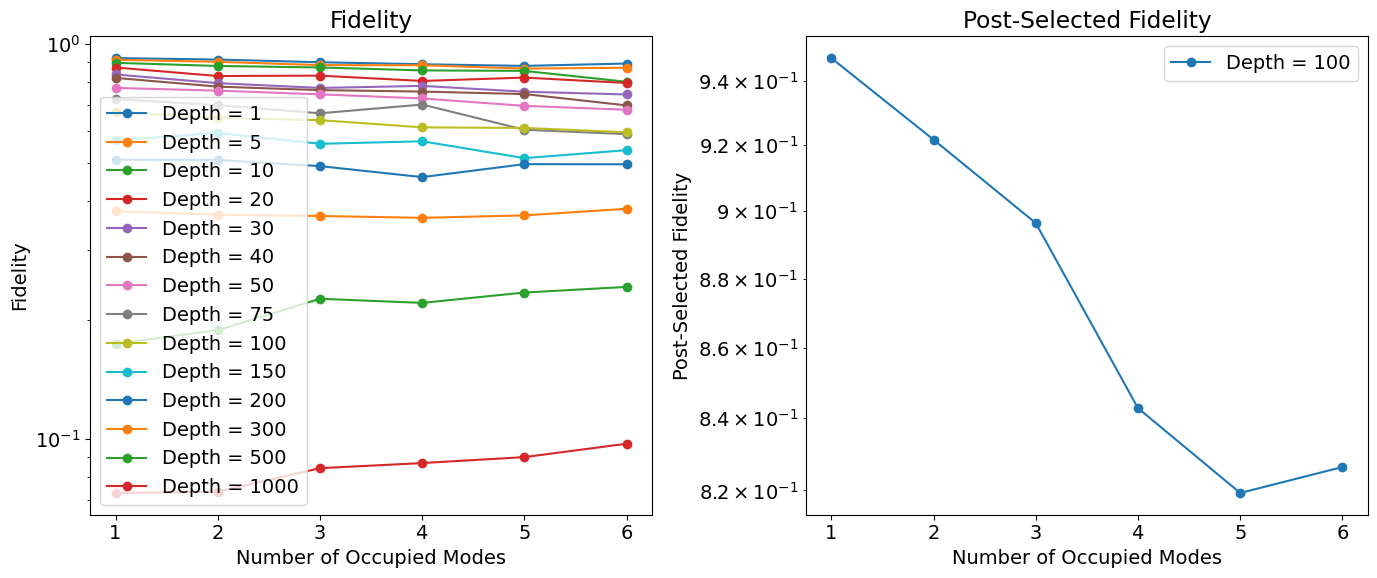

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming xlist, ylist, zlist, and zlist_post are already defined
xlist = df['num_occupied_smodes'].values.flatten()
ylist = depth_list

zlist = df['fids_list'].values.flatten()
zlist = [np.array(z) for z in zlist]

zlist_post = df['fids_post_list'].values.flatten()
zlist_post = [np.array(z) for z in zlist_post]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot zlist on the first subplot
for idx, y in enumerate(ylist):
    ax1.plot(xlist, np.transpose(zlist)[idx], '-o', label='Depth = ' + str(y))
ax1.set_yscale('log')
ax1.set_title('Fidelity')
ax1.set_xlabel('Number of Occupied Modes')
ax1.set_ylabel('Fidelity')
ax1.legend()

# Plot zlist_post on the second subplot
# for idx, y in enumerate(ylist):
idx = 8
y = ylist[idx]
print(y)
ax2.plot(xlist, np.transpose(zlist_post)[idx], '-o', label='Depth = ' + str(y))
ax2.set_yscale('log')
ax2.set_title('Post-Selected Fidelity')
ax2.set_xlabel('Number of Occupied Modes')
ax2.set_ylabel('Post-Selected Fidelity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [64]:
np.transpose(zlist_post)[-1]

array([0.63368124, 0.6493245 , 0.63275949, 0.65680275, 0.63558263,
       0.63041211])

In [ ]:
np.transpose(zlist_post)[idx]

In [57]:
zlist = [np.array(z) for z in zlist]
zlist


[array([0.91867655, 0.90970159, 0.89362811, 0.86962572, 0.83511727,
        0.81854463, 0.77219664, 0.72362027, 0.66991259, 0.56959888,
        0.50828926, 0.37660831, 0.17417443, 0.07303488]),
 array([0.91080406, 0.8988859 , 0.8774773 , 0.82750508, 0.79395678,
        0.7780189 , 0.76011194, 0.69855048, 0.64869431, 0.59382084,
        0.50769293, 0.36899739, 0.18842649, 0.07356136]),
 array([0.89662781, 0.88181544, 0.86986871, 0.82947469, 0.77203326,
        0.7623011 , 0.74378403, 0.6660898 , 0.6400477 , 0.55774876,
        0.48974376, 0.36633003, 0.22622392, 0.08438471]),
 array([0.88626533, 0.88115877, 0.85499249, 0.80419629, 0.78136586,
        0.75583903, 0.72628299, 0.70096893, 0.61376302, 0.5659464 ,
        0.45941702, 0.36249904, 0.22087876, 0.08692413]),
 array([0.87776719, 0.86416711, 0.85272171, 0.82002921, 0.75530654,
        0.74503159, 0.69556105, 0.60529036, 0.61164755, 0.51305964,
        0.49542052, 0.36760239, 0.23460625, 0.09000066]),
 array([0.8899731 , 0.86850888

# Target state in presence of spectator beamsplitters

## Ramsey Code Analysis

In [31]:
temp_data, attrs = prev_data(expt_path, '00005_SingleBeamSplitterRB_ramsey.h5')

In [60]:
data = temp_data['Idata'] # shape = (num_vars, num_depths, 4, shots)
#data = #np.transpose(data, (1, 0, 2, 3)) # shape = (num_depths, num_vars, shots, 4)
rb_times = np.array(attrs['config']['expt']['rb_timess']) #np.transpose(attrs['config']['expt']['rb_timess']) # shape = (num_depths, num vars)
bs_gate_nums = np.array(attrs['config']['expt']['bs_gate_numss']) #np.transpose(attrs['config']['expt']['bs_gate_numss']) # shape = (num_depths,num vars)

# filter data 
analysis = MM_DualRail_Analysis()

num_depths = len(data)
filtered_datas = []
new_bs_gate_nums = []
new_rb_times = []
for idx in range(data.shape[0]):  # for each depth 
    for jdx in range(data.shape[1]): # for each variation 
        raw_data = data[idx, jdx]
        filtered_data, _ = analysis.filter_data_BS(raw_data[2], raw_data[3], None, temp_data['thresholds'],post_selection = False)
        filtered_datas.append(np.mean(filtered_data))
        new_bs_gate_nums.append(bs_gate_nums[idx, jdx])
        new_rb_times.append(rb_times[idx, jdx])


bs_nums_for_plot, fids_for_plot, rb_times_for_plot, wait_freq = analysis.reorganize_var_data_for_ramsey(filtered_datas, new_bs_gate_nums, new_rb_times,
                                                                                                         attrs, len_threshold=3)


len of df_bs_num 7
len of df_bs_num 4
len of df_bs_num 4
len of df_bs_num 4
len of df_bs_num 4
len of df_bs_num 4
len of df_bs_num 5
len of df_bs_num 4
len of df_bs_num 4


In [59]:
df = analysis.reorganize_var_data_for_ramsey(filtered_datas, new_bs_gate_nums, new_rb_times, attrs, True)
df


bs_gate_nums   avg_idata   rb_times
0               4 -247.992424   2.261808
1               7 -303.156966   3.958164
2              17 -298.127055   9.612684
3              25 -144.862525  14.136300
4              29 -235.116387  16.398108
..            ...         ...        ...
195           104 -261.150901  58.807007
196           112 -290.261435  63.330623
197           116 -302.772105  65.592431
198           135 -294.092042  76.336019
199           137 -239.795068  77.466923

[200 rows x 3 columns]

In [57]:
bs_nums_range = np.arange(df['bs_gate_nums'].min(), df['bs_gate_nums'].max() + 1, 1)
bs_nums_range

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139])

In [50]:
data.shape[1]

20

In [46]:
np.shape(bs_gate_nums)

(20, 10)

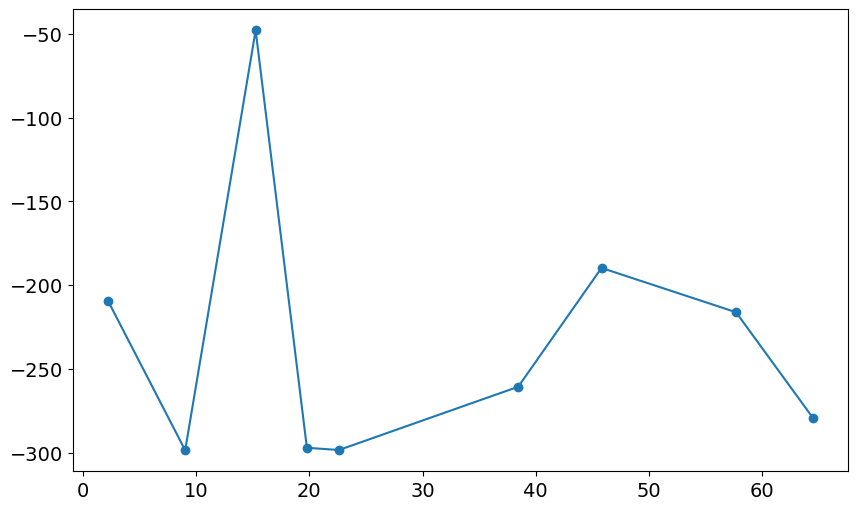

In [61]:
plt.plot(rb_times_for_plot, fids_for_plot, '-o')

In [33]:
np.shape(attrs['config']['expt']['bs_gate_numss'])

(10, 20)

In [32]:
temp_data['Idata'].shape

(10, 20, 4, 500)

## S1 in presence of M1-S2

### Single RB

In [748]:
temp_data, attrs = prev_data(expt_path, '00020_SingleBeamSplitterRB_check_target.h5')
temp_data, attrs = prev_data(expt_path, '00066_SingleBeamSplitterRB_check_target_sweep_depth.h5')
analysis = MM_DualRail_Analysis()
avg_idata, bs_gate_nums, rb_times = analysis.filter_data_for_si_wrt_spec_BS(temp_data, attrs)



In [749]:
attrs['config']['expt']

{'pre_sweep_pulse': [['qubit', 'ge', 'hpi', 0],
  ['qubit', 'ef_new', 'pi', 0],
  ['man', 'M1', 'pi', 0],
  ['storage', 'M1-S1', 'pi', 0]],
 'post_sweep_pulse': [['storage', 'M1-S1', 'pi', 0],
  ['man', 'M1', 'pi', 0],
  ['qubit', 'ef_new', 'pi', 0],
  ['qubit', 'ge', 'hpi', 40.712543636175724]],
 'wait_freq': 0.1,
 'prepulse': True,
 'postpulse': True,
 'rb_time': 'None',
 'bs_gate_num': 'None',
 'qubits': [0],
 'singleshot_reps': 5000,
 'span': 1000,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'threshold': -39.769721213292996,
 'readout_per_round': 4,
 'rb_active_reset': True,
 'rb_man_reset': True,
 'rb_storage_reset': True,
 'rb_reps': 19,
 'gates_per_wait': 100000,
 'rounds': 1,
 'variations': 20,
 'rb_depth': 1,
 'IRB_gate_no': -1,
 'bs_repeat': 1,
 'sync': False,
 'setup': False,
 'bs_para': [520.925, 5000, 0.565451994946885, 0.005],
 'reps': 19,
 'qubit': 0,
 'pulse_e': True,
 'pulse_f': False,
 'rb_times': [2.26180797978754,
  2.26180797978754,
  1.1309

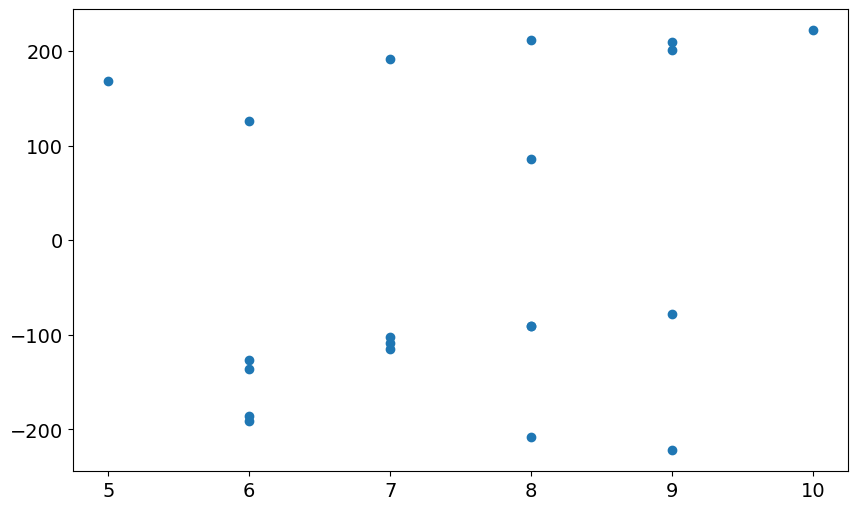

In [714]:
plt.plot(bs_gate_nums, avg_idata, 'o')

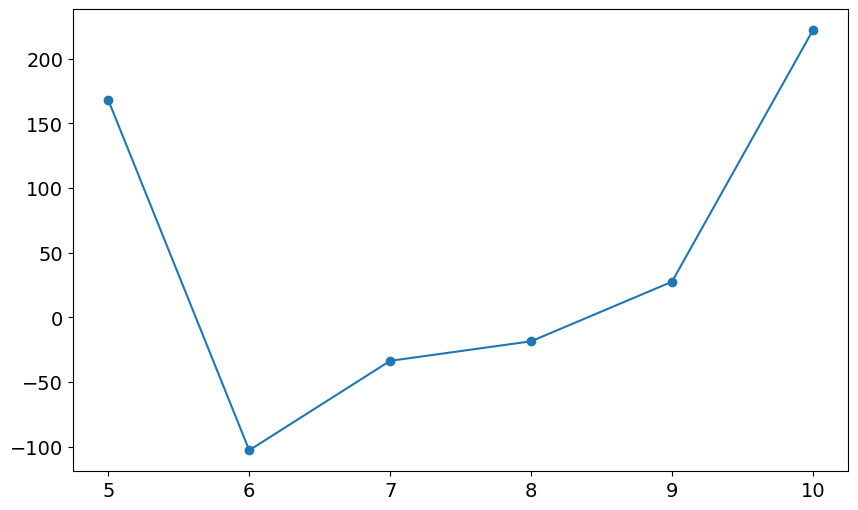

In [726]:
data = {'bs_gate_nums': bs_gate_nums, 'avg_idata': avg_idata, 'rb_times': rb_times}
df = pd.DataFrame(data)


bs_nums_range = np.arange(df['bs_gate_nums'].min(), df['bs_gate_nums'].max() + 1, 1)
bs_nums_for_plot = [] # List to store the BS gate numbers that have a fidelity
fids_for_plot = []

for idx, bs_gate_num in enumerate(bs_nums_range): 
    df_bs_num = df[df['bs_gate_nums'] == bs_gate_num]
    if len(df_bs_num) > 0:
        # plt.plot(df_bs_num['rb_times'], df_bs_num['avg_idata'], '-o', label='BS gate ' + str(bs_gate_num))
        fids_for_plot.append(np.average(df_bs_num['avg_idata'].values))
        bs_nums_for_plot.append(bs_gate_num)
    # print(f'Average idata for BS gate {bs_gate_num} is {avg_idata[idx]}')

plt.plot(bs_nums_for_plot, fids_for_plot, '-o')

In [724]:
df['bs_gate_nums'].max()

10

### Ramsey Plot 

In [309]:
file_list = np.arange(9, 20)
name = '_SingleBeamSplitterRB_stor_ramsey_spec.h5'
analysis = MM_DualRail_Analysis()
wrong_times, wrong_bs_gate_nums, wrong_fids, depth_list = analysis.extract_ramsey_seq_check_target(prev_data, expt_path, file_list, name, wrong_way = True)
bs_nums_for_plot, fids_for_plot, rb_times_for_plot, wait_freq = analysis.extract_ramsey_seq_check_target(prev_data,expt_path,
                                                                                               file_list, name)



[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1452719]
[-36.1

Fit frequency from I [MHz]: 0.031673913913174194 +/- 6.35359620071792e-05
T2 Ramsey from fit I [us]: 158.35204850396315


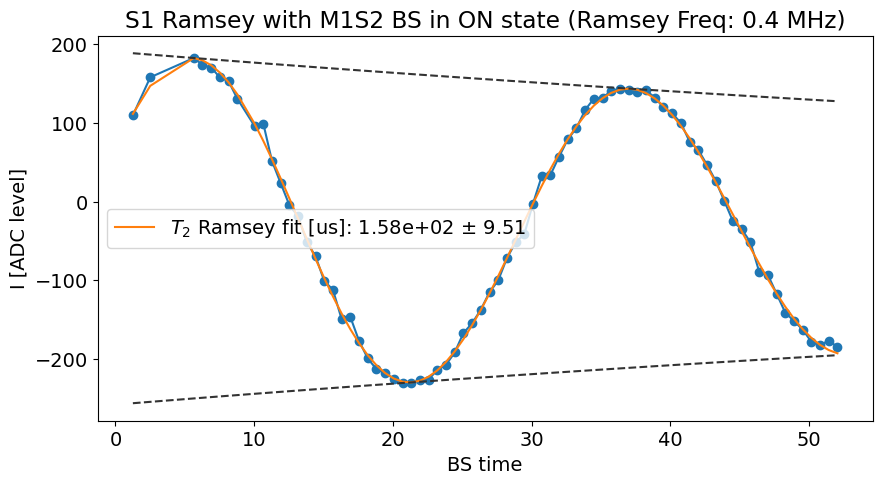

In [310]:
end_idx = None
plot = analysis.Ramsey_display(rb_times_for_plot[:end_idx], fids_for_plot[:end_idx], fit=True, fitparams=[500, 0.01, None, None, None, None], 
                                ramsey_freq=wait_freq, title='S1 Ramsey with M1S2 BS in ON state')
plt.xlabel('BS time')
plt.show()

In [300]:
# file_list = np.arange(25, 54, 1) # ------ S2
# file_list = np.arange(60, 89, 1) # ------ S3
file_list = np.arange(322, 330, 1) # ------ S4

name = '_SingleBeamSplitterRB_check_target_sweep_depth.h5'
analysis = MM_DualRail_Analysis()
wrong_times, wrong_bs_gate_nums, wrong_fids, depth_list = analysis.extract_ramsey_seq_check_target(prev_data, expt_path, file_list, name, wrong_way = True)
bs_nums_for_plot, fids_for_plot, rb_times_for_plot, wait_freq = analysis.extract_ramsey_seq_check_target(prev_data,expt_path,
                                                                                               file_list, name)


[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441514]
[-49.91441

Fit frequency from I [MHz]: 0.1 +/- inf
T2 Ramsey from fit I [us]: 38.75518693926481


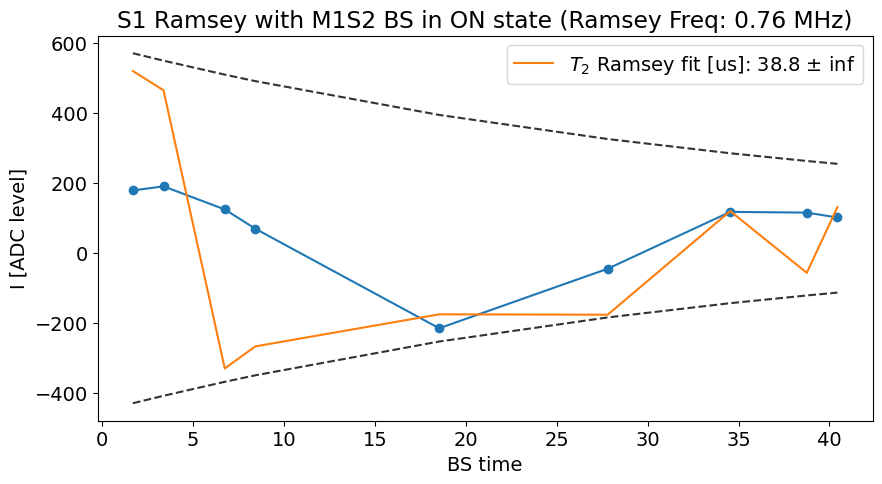

In [301]:
end_idx = None
plot = analysis.Ramsey_display(rb_times_for_plot[:end_idx], fids_for_plot[:end_idx], fit=True, fitparams=[500, 0.1, None, None, None, None], 
                                ramsey_freq=wait_freq, title='S1 Ramsey with M1S2 BS in ON state')
plt.xlabel('BS time')
plt.show()


Fit frequency from I [MHz]: 0.029429113491235653 +/- 0.0008840419054442238
T2 Ramsey from fit I [us]: 72.33693826027091


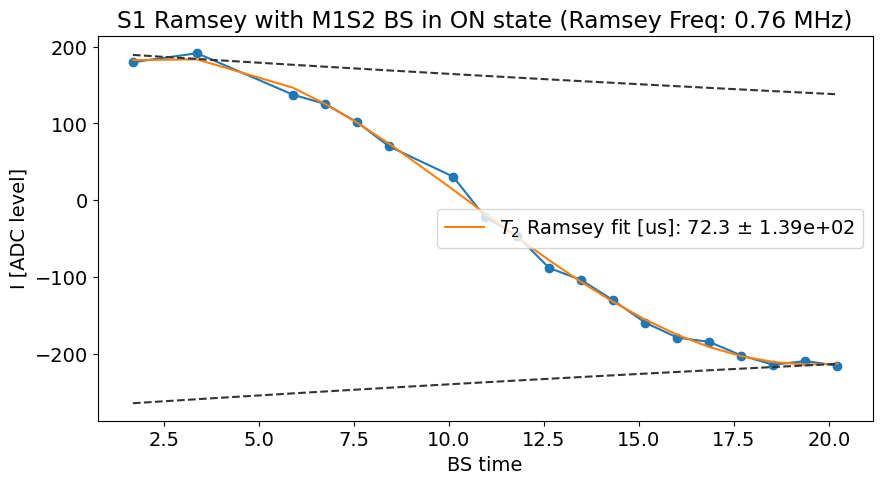

In [293]:
end_idx = None
plot = analysis.Ramsey_display(rb_times_for_plot[:end_idx], fids_for_plot[:end_idx], fit=True, fitparams=[500, 0.1, None, None, None, None], 
                                ramsey_freq=wait_freq, title='S1 Ramsey with M1S2 BS in ON state')
plt.xlabel('BS time')
plt.show()

In [268]:
wait_freqs = [[0, 0.67, 0.3, 0.4, 0.36, 1.24, 0.74], 
         [1, 0,0.03, 0.13, 0.1, 0.825, 0.76]]

Fit frequency from I [MHz]: 0.5217846453391861 +/- inf
T2 Ramsey from fit I [us]: 74618082.26390839


c:\Users\26049\.conda\envs\slab\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 0, 'BS time')

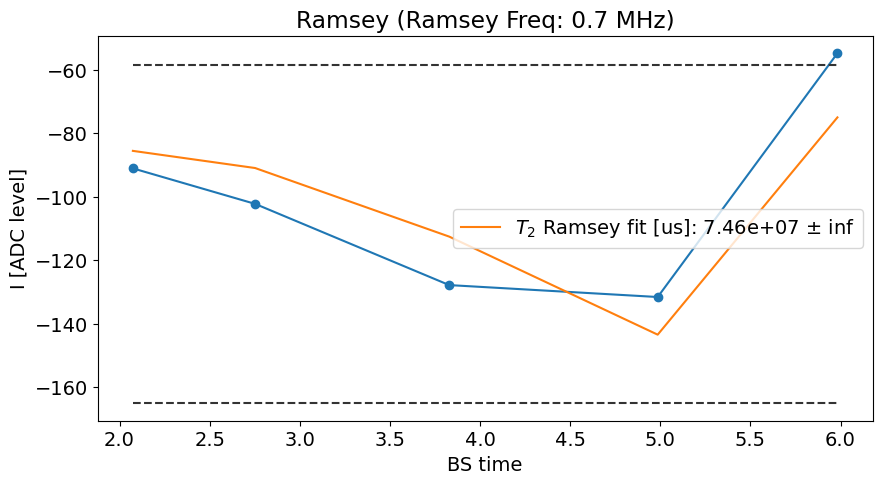

In [163]:
end_idx = None
plot = analysis.Ramsey_display(wrong_times[:end_idx], wrong_fids[:end_idx], fit=True, fitparams=None, #[600, 0.01, None, None, None, None], 
                                ramsey_freq=wait_freq)
plt.xlabel('BS time')

In [70]:

# file_list = np.arange(97, 117, 1)
# file_list = np.arange(116, 133, 1)
file_list = np.arange(173, 235, 1) # ------
# file_list = np.arange(236, 246, 1)
# file_list = np.arange(246, 270, 1)
# file_list = np.arange(275, 291, 1)
file_list = np.arange(293, 373, 1) #---- current one in on state
# file_list = np.arange(133, 147, 1)
name = '_SingleBeamSplitterRB_check_target_sweep_depth.h5'
analysis = MM_DualRail_Analysis()
wrong_times, wrong_bs_gate_nums, wrong_fids, depth_list = analysis.extract_ramsey_seq_check_target(prev_data, expt_path, file_list, name, wrong_way = True)
bs_nums_for_plot, fids_for_plot, rb_times_for_plot, wait_freq = analysis.extract_ramsey_seq_check_target(prev_data,expt_path,
                                                                                               file_list, name)



# plt.plot(depth_list, means, 'o')

FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFoundError
FileNotFou

UnboundLocalError: local variable 'attrs' referenced before assignment

Fit frequency from I [MHz]: 0.02971455223251825 +/- 5.544386199675016e-05
T2 Ramsey from fit I [us]: 140.44001930080807


Text(0.5, 0, 'BS time')

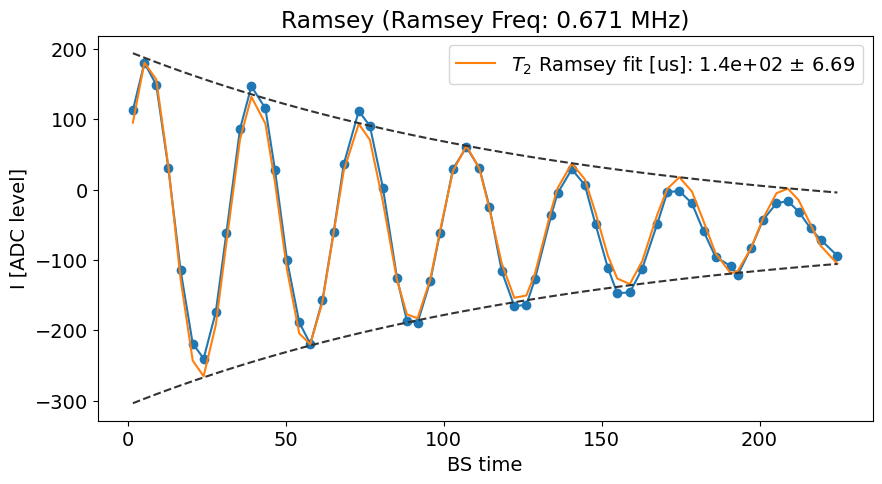

In [932]:
# plt.plot(depth_list, wrong_fids, '-o')
end_idx = -20
plot = analysis.Ramsey_display(wrong_times[:end_idx], wrong_fids[:end_idx], fit=True, fitparams=None, #[600, 0.01, None, None, None, None], 
                                ramsey_freq=wait_freq)
plt.xlabel('BS time')

Fit frequency from I [MHz]: 0.029771547509860566 +/- 1.7532601120628393e-05
T2 Ramsey from fit I [us]: 174.88170572548478


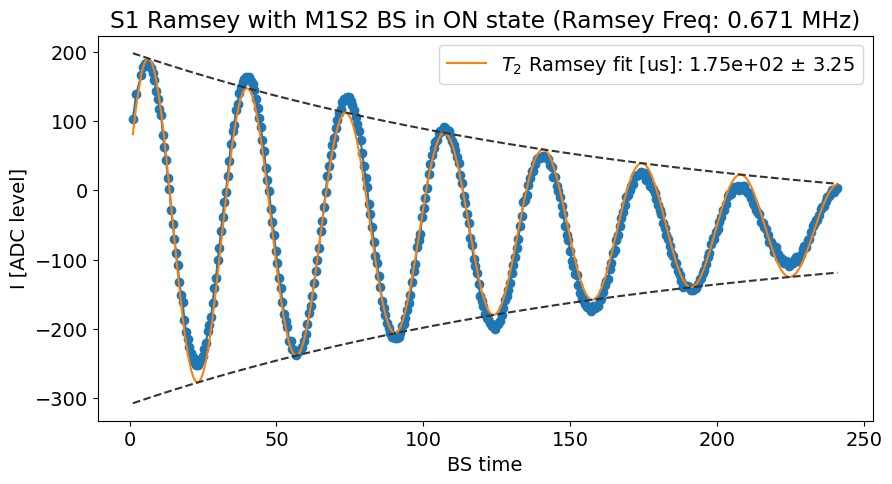

In [933]:
end_idx = -120
plot = analysis.Ramsey_display(rb_times_for_plot[:end_idx], fids_for_plot[:end_idx], fit=True, fitparams=[500, 0.03, None, None, None, None], 
                                ramsey_freq=wait_freq, title='S1 Ramsey with M1S2 BS in ON state')
plt.xlabel('BS time')
plt.show()

Text(0.5, 1.0, 'Ramsey Sequence Check Target with ramsey frequency 0.3 MHz')

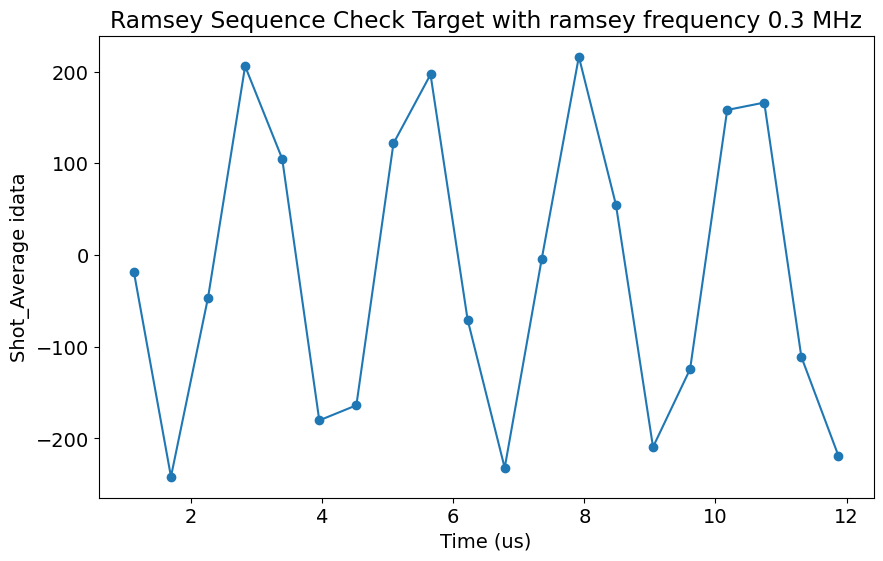

In [771]:
plt.plot(rb_times_for_plot, fids_for_plot, '-o')
plt.xlabel('Time (us)')
plt.ylabel('Shot_Average idata')
plt.title('Ramsey Sequence Check Target with ramsey frequency ' + str(wait_freq) + ' MHz')

Text(0, 0.5, 'Shot_Average idata')

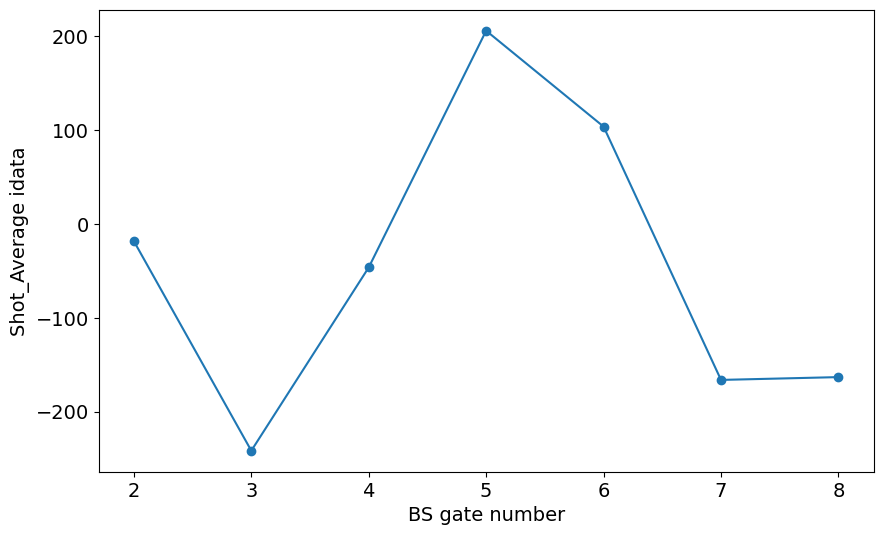

In [766]:
plt.plot(bs_nums_for_plot, fids_for_plot, '-o')
plt.xlabel('BS gate number')
plt.ylabel('Shot_Average idata')

In [754]:
df

bs_gate_nums   avg_idata  rb_times
0               4  135.042037  2.261808
1               4  108.256494  2.261808
2               2 -250.632756  1.130904
3               2 -245.120643  1.130904
4               4  183.637731  2.261808
..            ...         ...       ...
155            13   23.794796  7.350876
156            10   52.392024  5.654520
157            11 -228.692735  6.219972
158            12  169.069988  6.785424
159            12  171.969805  6.785424

[160 rows x 3 columns]

In [734]:
df

bs_gate_nums   avg_idata   rb_times
0               2 -217.157040   1.130904
1               2 -229.548360   1.130904
2               4 -244.298872   2.261808
3               2 -198.415755   1.130904
4               2 -156.032468   1.130904
..            ...         ...        ...
375            26  165.916975  14.701752
376            25  -93.997558  14.136300
377            24  -79.737259  13.570848
378            29  -42.167499  16.398108
379            25  -53.860572  14.136300

[380 rows x 3 columns]

temp_data, attrs = 